In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import os
import sys
from tqdm import tqdm

In [3]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

### 数据处理：Poly + PCA

In [4]:
training_data = pd.read_csv('./train.csv').drop('id', axis=1)
test_data = pd.read_csv('./test.csv').drop('id',axis=1)
training_data['n_jobs'].loc[training_data['n_jobs']==-1] = 16
test_data['n_jobs'].loc[test_data['n_jobs']==-1] = 16
training_label = training_data['time']
data_corr = training_data.corr()['time']

C:\Users\hanya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
col_drop = data_corr[abs(data_corr)<0.1]
all_data = pd.concat([training_data.drop('time',axis=1), test_data])#.drop('id',axis=1)])
all_data.drop(col_drop.index,axis=1, inplace=True)

In [6]:
# 特征构造
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_jobs'] = all_data['max_iter']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']
all_data['n_samples_n_features'] = all_data['n_samples']*all_data['n_features']
all_data['n_samples_n_features_max_iter'] = all_data['n_samples']*all_data['n_features']*all_data['max_iter']

In [15]:
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
#all_data['n_jobs-1'] = all_data['n_jobs']**(-1)
#all_data['n_jobs-2'] = all_data['n_jobs']**(-2)
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
all_data1 = all_data.iloc[:,1:]

In [ ]:
cols = all_data1.columns
for col1 in range(len(cols)):
    for col2 in range(col1, len(cols)):
        c1 = cols[col1]
        c2 = cols[col2]
        all_data1[str(c1)+'_'+str(c2)] = all_data1[c1] * all_data1[c2]

In [20]:
new_data = pd.get_dummies(all_data)
training_len = 440 #len(training_df_data)-test_training
test_training = len(training_data) - training_len
test_len = len(test_data)

X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train = training_label.iloc[:training_len] # training labels--cross validation
y_train_test = training_label.iloc[-test_training:] # training label--test
X_test = new_data.iloc[-test_len:, :] # test data

### Neural Network

In [21]:
def model_nn(X_train, y_train, X_train_test, y_train_test):
    x_train = X_train
    y_train = y_train
    x_test = X_train_test
    y_test = y_train_test

    model = Sequential()
    model.add(Dense(200, activation='relu', input_dim=16))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))

    adm = Adam(lr=0.01, decay=1e-6)
    model.compile(loss='mean_squared_error',
                  optimizer=adm)

    model.fit(x_train, y_train,
              epochs=1000,
              batch_size=380)
    #score = model.evaluate(x_test, y_test, batch_size=60)
    return model#, score

In [22]:
#pd.DataFrame(model.predict(x_test.loc[y_test[y_test>10].index,:]), index=y_test[y_test>10].index)[0] - y_test[y_test>10]

In [34]:
md = []
N = 30
for i in range(N):
    md.append(model_nn(X_train, y_train, X_train_test, y_train_test))

Epoch 1/1000
440/440 [==============================] - ETA: 0s - loss: 36.66 - 0s 721us/step - loss: 34.4142
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 23.40 - 0s 54us/step - loss: 22.2154
Epoch 3/1000
440/440 [==============================] - ETA: 0s - loss: 16.13 - 0s 45us/step - loss: 14.5836
Epoch 4/1000
440/440 [==============================] - ETA: 0s - loss: 11.23 - 0s 61us/step - loss: 10.2262
Epoch 5/1000
440/440 [==============================] - ETA: 0s - loss: 10.94 - 0s 48us/step - loss: 10.5481
Epoch 6/1000
440/440 [==============================] - ETA: 0s - loss: 10.24 - 0s 43us/step - loss: 9.6144
Epoch 7/1000
440/440 [==============================] - ETA: 0s - loss: 7.207 - 0s 43us/step - loss: 7.5102
Epoch 8/1000
440/440 [==============================] - ETA: 0s - loss: 6.090 - 0s 48us/step - loss: 7.3397
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 6.123 - 0s 41us/step - loss: 5.6722
Epoch 10/1000
440/440 

440/440 [==============================] - ETA: 0s - loss: 2.925 - 0s 45us/step - loss: 2.8239
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 3.706 - 0s 39us/step - loss: 3.3988
Epoch 78/1000
440/440 [==============================] - ETA: 0s - loss: 2.842 - 0s 41us/step - loss: 2.8365
Epoch 79/1000
440/440 [==============================] - ETA: 0s - loss: 3.665 - 0s 43us/step - loss: 3.2822
Epoch 80/1000
440/440 [==============================] - ETA: 0s - loss: 3.067 - 0s 48us/step - loss: 3.1931
Epoch 81/1000
440/440 [==============================] - ETA: 0s - loss: 2.371 - 0s 54us/step - loss: 2.2009
Epoch 82/1000
440/440 [==============================] - ETA: 0s - loss: 3.417 - 0s 50us/step - loss: 3.7409
Epoch 83/1000
440/440 [==============================] - ETA: 0s - loss: 5.098 - 0s 50us/step - loss: 4.5617
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 1.387 - 0s 52us/step - loss: 1.4881
Epoch 85/1000
440/440 [==========

Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 2.792 - 0s 48us/step - loss: 2.7687
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 1.840 - 0s 41us/step - loss: 1.8930
Epoch 153/1000
440/440 [==============================] - ETA: 0s - loss: 2.619 - 0s 36us/step - loss: 2.4889
Epoch 154/1000
440/440 [==============================] - ETA: 0s - loss: 3.818 - 0s 36us/step - loss: 3.4659
Epoch 155/1000
440/440 [==============================] - ETA: 0s - loss: 2.916 - 0s 57us/step - loss: 2.7201
Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 2.955 - 0s 63us/step - loss: 2.9617
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 2.337 - 0s 45us/step - loss: 2.4630
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 2.019 - 0s 52us/step - loss: 1.9725
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 1.537 - 0s 68us/step - loss: 1.4950
Epoch 160/

440/440 [==============================] - ETA: 0s - loss: 2.010 - 0s 48us/step - loss: 2.1040
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 3.296 - 0s 39us/step - loss: 3.9776
Epoch 227/1000
440/440 [==============================] - ETA: 0s - loss: 2.960 - 0s 48us/step - loss: 3.1361
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 1.708 - 0s 50us/step - loss: 2.2926
Epoch 229/1000
440/440 [==============================] - ETA: 0s - loss: 3.286 - 0s 50us/step - loss: 3.2745
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 1.752 - 0s 50us/step - loss: 1.8786
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 1.743 - 0s 54us/step - loss: 2.1303
Epoch 232/1000
440/440 [==============================] - ETA: 0s - loss: 1.767 - 0s 48us/step - loss: 1.9769
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 2.420 - 0s 61us/step - loss: 3.0502
Epoch 234/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.065 - 0s 48us/step - loss: 1.8930
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 1.886 - 0s 48us/step - loss: 1.8894
Epoch 301/1000
440/440 [==============================] - ETA: 0s - loss: 1.943 - 0s 48us/step - loss: 1.9368
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 1.399 - 0s 59us/step - loss: 1.8621
Epoch 303/1000
440/440 [==============================] - ETA: 0s - loss: 1.483 - 0s 52us/step - loss: 1.4501
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 1.909 - 0s 77us/step - loss: 1.7211
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 1.778 - 0s 63us/step - loss: 1.7895
Epoch 306/1000
440/440 [==============================] - ETA: 0s - loss: 1.479 - 0s 59us/step - loss: 1.4989
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 2.609 - 0s 57us/step - loss: 2.3717
Epoch 308/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.013 - 0s 39us/step - loss: 1.8755
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 2.583 - 0s 36us/step - loss: 2.6983
Epoch 375/1000
440/440 [==============================] - ETA: 0s - loss: 2.271 - 0s 36us/step - loss: 2.1045
Epoch 376/1000
440/440 [==============================] - ETA: 0s - loss: 3.979 - 0s 39us/step - loss: 3.6733
Epoch 377/1000
440/440 [==============================] - ETA: 0s - loss: 2.349 - 0s 39us/step - loss: 2.1759
Epoch 378/1000
440/440 [==============================] - ETA: 0s - loss: 2.704 - 0s 39us/step - loss: 2.5846
Epoch 379/1000
440/440 [==============================] - ETA: 0s - loss: 2.151 - 0s 39us/step - loss: 1.9738
Epoch 380/1000
440/440 [==============================] - ETA: 0s - loss: 1.932 - 0s 54us/step - loss: 1.8073
Epoch 381/1000
440/440 [==============================] - ETA: 0s - loss: 1.450 - 0s 39us/step - loss: 1.7388
Epoch 382/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.948 - 0s 50us/step - loss: 2.2754
Epoch 448/1000
440/440 [==============================] - ETA: 0s - loss: 2.387 - 0s 43us/step - loss: 2.2161
Epoch 449/1000
440/440 [==============================] - ETA: 0s - loss: 2.063 - 0s 57us/step - loss: 2.0143
Epoch 450/1000
440/440 [==============================] - ETA: 0s - loss: 1.704 - 0s 50us/step - loss: 1.7485
Epoch 451/1000
440/440 [==============================] - ETA: 0s - loss: 1.740 - 0s 54us/step - loss: 1.7989
Epoch 452/1000
440/440 [==============================] - ETA: 0s - loss: 2.992 - 0s 57us/step - loss: 2.7686
Epoch 453/1000
440/440 [==============================] - ETA: 0s - loss: 1.953 - 0s 63us/step - loss: 2.3599
Epoch 454/1000
440/440 [==============================] - ETA: 0s - loss: 2.090 - 0s 68us/step - loss: 2.1405
Epoch 455/1000
440/440 [==============================] - ETA: 0s - loss: 2.640 - 0s 57us/step - loss: 2.5013
Epoch 456/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.353 - 0s 61us/step - loss: 1.7869
Epoch 522/1000
440/440 [==============================] - ETA: 0s - loss: 2.269 - 0s 45us/step - loss: 2.8748
Epoch 523/1000
440/440 [==============================] - ETA: 0s - loss: 3.176 - 0s 36us/step - loss: 2.8870
Epoch 524/1000
440/440 [==============================] - ETA: 0s - loss: 4.761 - 0s 43us/step - loss: 4.3380
Epoch 525/1000
440/440 [==============================] - ETA: 0s - loss: 4.365 - 0s 70us/step - loss: 4.5364
Epoch 526/1000
440/440 [==============================] - ETA: 0s - loss: 2.773 - 0s 52us/step - loss: 3.3519
Epoch 527/1000
440/440 [==============================] - ETA: 0s - loss: 2.737 - 0s 45us/step - loss: 2.7216
Epoch 528/1000
440/440 [==============================] - ETA: 0s - loss: 2.823 - 0s 66us/step - loss: 3.0883
Epoch 529/1000
440/440 [==============================] - ETA: 0s - loss: 2.519 - 0s 63us/step - loss: 2.3843
Epoch 530/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.982 - 0s 43us/step - loss: 1.9331
Epoch 596/1000
440/440 [==============================] - ETA: 0s - loss: 2.108 - 0s 41us/step - loss: 2.2691
Epoch 597/1000
440/440 [==============================] - ETA: 0s - loss: 2.431 - 0s 43us/step - loss: 2.1728
Epoch 598/1000
440/440 [==============================] - ETA: 0s - loss: 2.358 - 0s 39us/step - loss: 2.1524
Epoch 599/1000
440/440 [==============================] - ETA: 0s - loss: 1.146 - 0s 41us/step - loss: 1.4306
Epoch 600/1000
440/440 [==============================] - ETA: 0s - loss: 1.585 - 0s 36us/step - loss: 1.4397
Epoch 601/1000
440/440 [==============================] - ETA: 0s - loss: 2.625 - 0s 45us/step - loss: 2.3346
Epoch 602/1000
440/440 [==============================] - ETA: 0s - loss: 3.557 - 0s 36us/step - loss: 3.2037
Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 1.457 - 0s 54us/step - loss: 1.3885
Epoch 604/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.911 - 0s 63us/step - loss: 1.8278
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 2.428 - 0s 50us/step - loss: 2.1908
Epoch 671/1000
440/440 [==============================] - ETA: 0s - loss: 1.887 - 0s 41us/step - loss: 1.8915
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 1.787 - 0s 41us/step - loss: 1.6471
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 0.922 - 0s 63us/step - loss: 0.9528
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 2.398 - 0s 52us/step - loss: 2.5815
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 1.957 - 0s 50us/step - loss: 1.7533
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 2.039 - 0s 50us/step - loss: 1.8748
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 2.376 - 0s 45us/step - loss: 2.4523
Epoch 678/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.869 - 0s 45us/step - loss: 1.9079
Epoch 744/1000
440/440 [==============================] - ETA: 0s - loss: 2.495 - 0s 50us/step - loss: 3.2995
Epoch 745/1000
440/440 [==============================] - ETA: 0s - loss: 2.018 - 0s 39us/step - loss: 1.8069
Epoch 746/1000
440/440 [==============================] - ETA: 0s - loss: 2.558 - 0s 45us/step - loss: 2.4209
Epoch 747/1000
440/440 [==============================] - ETA: 0s - loss: 2.050 - 0s 36us/step - loss: 1.8945
Epoch 748/1000
440/440 [==============================] - ETA: 0s - loss: 1.709 - 0s 52us/step - loss: 1.7267
Epoch 749/1000
440/440 [==============================] - ETA: 0s - loss: 2.583 - 0s 48us/step - loss: 2.6924
Epoch 750/1000
440/440 [==============================] - ETA: 0s - loss: 3.235 - 0s 36us/step - loss: 3.0282
Epoch 751/1000
440/440 [==============================] - ETA: 0s - loss: 2.725 - 0s 41us/step - loss: 2.4619
Epoch 752/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.501 - 0s 50us/step - loss: 1.5507
Epoch 818/1000
440/440 [==============================] - ETA: 0s - loss: 1.648 - 0s 54us/step - loss: 2.2066
Epoch 819/1000
440/440 [==============================] - ETA: 0s - loss: 2.371 - 0s 36us/step - loss: 2.1713
Epoch 820/1000
440/440 [==============================] - ETA: 0s - loss: 3.687 - 0s 52us/step - loss: 3.4085
Epoch 821/1000
440/440 [==============================] - ETA: 0s - loss: 3.856 - 0s 57us/step - loss: 3.4589
Epoch 822/1000
440/440 [==============================] - ETA: 0s - loss: 3.225 - 0s 50us/step - loss: 2.8762
Epoch 823/1000
440/440 [==============================] - ETA: 0s - loss: 1.611 - 0s 52us/step - loss: 1.5759
Epoch 824/1000
440/440 [==============================] - ETA: 0s - loss: 1.466 - 0s 45us/step - loss: 1.3922
Epoch 825/1000
440/440 [==============================] - ETA: 0s - loss: 1.737 - 0s 45us/step - loss: 1.6038
Epoch 826/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.701 - 0s 41us/step - loss: 1.5514
Epoch 892/1000
440/440 [==============================] - ETA: 0s - loss: 1.264 - 0s 43us/step - loss: 1.3205
Epoch 893/1000
440/440 [==============================] - ETA: 0s - loss: 1.361 - 0s 39us/step - loss: 1.3114
Epoch 894/1000
440/440 [==============================] - ETA: 0s - loss: 1.522 - 0s 39us/step - loss: 1.3704
Epoch 895/1000
440/440 [==============================] - ETA: 0s - loss: 1.572 - 0s 34us/step - loss: 1.5617
Epoch 896/1000
440/440 [==============================] - ETA: 0s - loss: 1.365 - 0s 52us/step - loss: 1.3569
Epoch 897/1000
440/440 [==============================] - ETA: 0s - loss: 1.584 - 0s 48us/step - loss: 1.5119
Epoch 898/1000
440/440 [==============================] - ETA: 0s - loss: 1.355 - 0s 45us/step - loss: 1.3548
Epoch 899/1000
440/440 [==============================] - ETA: 0s - loss: 1.381 - 0s 43us/step - loss: 1.3121
Epoch 900/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.706 - 0s 50us/step - loss: 4.3618
Epoch 966/1000
440/440 [==============================] - ETA: 0s - loss: 1.941 - 0s 54us/step - loss: 1.9369
Epoch 967/1000
440/440 [==============================] - ETA: 0s - loss: 2.269 - 0s 50us/step - loss: 2.0652
Epoch 968/1000
440/440 [==============================] - ETA: 0s - loss: 2.038 - 0s 57us/step - loss: 2.0815
Epoch 969/1000
440/440 [==============================] - ETA: 0s - loss: 2.001 - 0s 50us/step - loss: 2.4222
Epoch 970/1000
440/440 [==============================] - ETA: 0s - loss: 1.928 - 0s 43us/step - loss: 1.9684
Epoch 971/1000
440/440 [==============================] - ETA: 0s - loss: 2.159 - 0s 52us/step - loss: 1.9689
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 3.107 - 0s 50us/step - loss: 2.7556
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 2.042 - 0s 57us/step - loss: 2.1449
Epoch 974/1000
440/440 [=

Epoch 40/1000
440/440 [==============================] - ETA: 0s - loss: 3.271 - 0s 59us/step - loss: 2.9328
Epoch 41/1000
440/440 [==============================] - ETA: 0s - loss: 4.165 - 0s 59us/step - loss: 3.7615
Epoch 42/1000
440/440 [==============================] - ETA: 0s - loss: 4.570 - 0s 50us/step - loss: 4.8253
Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 3.480 - 0s 48us/step - loss: 3.2893
Epoch 44/1000
440/440 [==============================] - ETA: 0s - loss: 2.665 - 0s 57us/step - loss: 2.9438
Epoch 45/1000
440/440 [==============================] - ETA: 0s - loss: 2.302 - 0s 50us/step - loss: 2.2216
Epoch 46/1000
440/440 [==============================] - ETA: 0s - loss: 2.892 - 0s 57us/step - loss: 3.0578
Epoch 47/1000
440/440 [==============================] - ETA: 0s - loss: 3.169 - 0s 43us/step - loss: 3.5292
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 2.727 - 0s 52us/step - loss: 3.0725
Epoch 49/1000
440/4

Epoch 115/1000
440/440 [==============================] - ETA: 0s - loss: 1.801 - 0s 48us/step - loss: 1.7526
Epoch 116/1000
440/440 [==============================] - ETA: 0s - loss: 1.809 - 0s 36us/step - loss: 2.2728
Epoch 117/1000
440/440 [==============================] - ETA: 0s - loss: 3.293 - 0s 45us/step - loss: 3.1016
Epoch 118/1000
440/440 [==============================] - ETA: 0s - loss: 4.740 - 0s 52us/step - loss: 4.3435
Epoch 119/1000
440/440 [==============================] - ETA: 0s - loss: 4.356 - 0s 50us/step - loss: 4.7275
Epoch 120/1000
440/440 [==============================] - ETA: 0s - loss: 1.930 - 0s 43us/step - loss: 1.9087
Epoch 121/1000
440/440 [==============================] - ETA: 0s - loss: 2.585 - 0s 52us/step - loss: 2.7125
Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 3.824 - 0s 52us/step - loss: 3.6073
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 3.104 - 0s 43us/step - loss: 2.7482
Epoch 124/

440/440 [==============================] - ETA: 0s - loss: 2.947 - 0s 59us/step - loss: 2.7309
Epoch 190/1000
440/440 [==============================] - ETA: 0s - loss: 2.331 - 0s 48us/step - loss: 2.3259
Epoch 191/1000
440/440 [==============================] - ETA: 0s - loss: 3.450 - 0s 50us/step - loss: 3.1370
Epoch 192/1000
440/440 [==============================] - ETA: 0s - loss: 4.112 - 0s 63us/step - loss: 3.7173
Epoch 193/1000
440/440 [==============================] - ETA: 0s - loss: 3.927 - 0s 57us/step - loss: 3.7047
Epoch 194/1000
440/440 [==============================] - ETA: 0s - loss: 3.213 - 0s 50us/step - loss: 2.9123
Epoch 195/1000
440/440 [==============================] - ETA: 0s - loss: 2.992 - 0s 54us/step - loss: 3.3821
Epoch 196/1000
440/440 [==============================] - ETA: 0s - loss: 2.534 - 0s 48us/step - loss: 2.3155
Epoch 197/1000
440/440 [==============================] - ETA: 0s - loss: 1.729 - 0s 45us/step - loss: 1.8638
Epoch 198/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.108 - 0s 39us/step - loss: 3.0989
Epoch 264/1000
440/440 [==============================] - ETA: 0s - loss: 2.674 - 0s 41us/step - loss: 2.5696
Epoch 265/1000
440/440 [==============================] - ETA: 0s - loss: 2.233 - 0s 43us/step - loss: 2.3732
Epoch 266/1000
440/440 [==============================] - ETA: 0s - loss: 2.030 - 0s 45us/step - loss: 2.1494
Epoch 267/1000
440/440 [==============================] - ETA: 0s - loss: 2.742 - 0s 59us/step - loss: 2.4629
Epoch 268/1000
440/440 [==============================] - ETA: 0s - loss: 2.769 - 0s 36us/step - loss: 2.4766
Epoch 269/1000
440/440 [==============================] - ETA: 0s - loss: 1.258 - 0s 48us/step - loss: 1.2516
Epoch 270/1000
440/440 [==============================] - ETA: 0s - loss: 2.322 - 0s 41us/step - loss: 2.3589
Epoch 271/1000
440/440 [==============================] - ETA: 0s - loss: 2.351 - 0s 50us/step - loss: 2.4398
Epoch 272/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.996 - 0s 61us/step - loss: 1.8683
Epoch 338/1000
440/440 [==============================] - ETA: 0s - loss: 2.334 - 0s 75us/step - loss: 2.0963
Epoch 339/1000
440/440 [==============================] - ETA: 0s - loss: 2.140 - 0s 54us/step - loss: 1.9999
Epoch 340/1000
440/440 [==============================] - ETA: 0s - loss: 2.015 - 0s 50us/step - loss: 1.9375
Epoch 341/1000
440/440 [==============================] - ETA: 0s - loss: 2.018 - 0s 54us/step - loss: 1.8545
Epoch 342/1000
440/440 [==============================] - ETA: 0s - loss: 1.949 - 0s 68us/step - loss: 1.9435
Epoch 343/1000
440/440 [==============================] - ETA: 0s - loss: 2.182 - 0s 50us/step - loss: 1.9322
Epoch 344/1000
440/440 [==============================] - ETA: 0s - loss: 1.721 - 0s 57us/step - loss: 1.8054
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 2.902 - 0s 63us/step - loss: 2.9046
Epoch 346/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.290 - 0s 36us/step - loss: 1.2593
Epoch 412/1000
440/440 [==============================] - ETA: 0s - loss: 1.191 - 0s 48us/step - loss: 1.1275
Epoch 413/1000
440/440 [==============================] - ETA: 0s - loss: 1.238 - 0s 41us/step - loss: 1.1394
Epoch 414/1000
440/440 [==============================] - ETA: 0s - loss: 1.540 - 0s 39us/step - loss: 1.6447
Epoch 415/1000
440/440 [==============================] - ETA: 0s - loss: 1.340 - 0s 41us/step - loss: 1.5351
Epoch 416/1000
440/440 [==============================] - ETA: 0s - loss: 1.769 - 0s 45us/step - loss: 1.7661
Epoch 417/1000
440/440 [==============================] - ETA: 0s - loss: 2.600 - 0s 41us/step - loss: 2.3302
Epoch 418/1000
440/440 [==============================] - ETA: 0s - loss: 1.476 - 0s 41us/step - loss: 1.6261
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 2.299 - 0s 45us/step - loss: 2.3802
Epoch 420/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.927 - 0s 45us/step - loss: 3.5546
Epoch 486/1000
440/440 [==============================] - ETA: 0s - loss: 2.570 - 0s 63us/step - loss: 2.6172
Epoch 487/1000
440/440 [==============================] - ETA: 0s - loss: 3.964 - 0s 50us/step - loss: 3.6617
Epoch 488/1000
440/440 [==============================] - ETA: 0s - loss: 1.765 - 0s 61us/step - loss: 1.6671
Epoch 489/1000
440/440 [==============================] - ETA: 0s - loss: 2.266 - 0s 54us/step - loss: 2.2090
Epoch 490/1000
440/440 [==============================] - ETA: 0s - loss: 1.580 - 0s 54us/step - loss: 2.5081
Epoch 491/1000
440/440 [==============================] - ETA: 0s - loss: 2.346 - 0s 45us/step - loss: 2.0938
Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 2.426 - 0s 57us/step - loss: 2.6693
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 3.706 - 0s 50us/step - loss: 3.3197
Epoch 494/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.745 - 0s 39us/step - loss: 1.7349
Epoch 560/1000
440/440 [==============================] - ETA: 0s - loss: 1.529 - 0s 59us/step - loss: 1.4446
Epoch 561/1000
440/440 [==============================] - ETA: 0s - loss: 1.911 - 0s 57us/step - loss: 1.7759
Epoch 562/1000
440/440 [==============================] - ETA: 0s - loss: 2.777 - 0s 48us/step - loss: 2.5052
Epoch 563/1000
440/440 [==============================] - ETA: 0s - loss: 1.844 - 0s 52us/step - loss: 1.7319
Epoch 564/1000
440/440 [==============================] - ETA: 0s - loss: 1.563 - 0s 45us/step - loss: 1.4722
Epoch 565/1000
440/440 [==============================] - ETA: 0s - loss: 1.911 - 0s 111us/step - loss: 1.7698
Epoch 566/1000
440/440 [==============================] - ETA: 0s - loss: 1.535 - 0s 48us/step - loss: 1.7391
Epoch 567/1000
440/440 [==============================] - ETA: 0s - loss: 1.891 - 0s 48us/step - loss: 1.8308
Epoch 568/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 2.368 - 0s 66us/step - loss: 2.2509
Epoch 634/1000
440/440 [==============================] - ETA: 0s - loss: 2.454 - 0s 52us/step - loss: 2.5627
Epoch 635/1000
440/440 [==============================] - ETA: 0s - loss: 4.299 - 0s 52us/step - loss: 3.8793
Epoch 636/1000
440/440 [==============================] - ETA: 0s - loss: 2.215 - 0s 50us/step - loss: 2.0157
Epoch 637/1000
440/440 [==============================] - ETA: 0s - loss: 2.825 - 0s 52us/step - loss: 2.6601
Epoch 638/1000
440/440 [==============================] - ETA: 0s - loss: 2.274 - 0s 41us/step - loss: 2.0573
Epoch 639/1000
440/440 [==============================] - ETA: 0s - loss: 2.699 - 0s 61us/step - loss: 2.7416
Epoch 640/1000
440/440 [==============================] - ETA: 0s - loss: 1.483 - 0s 52us/step - loss: 1.5070
Epoch 641/1000
440/440 [==============================] - ETA: 0s - loss: 2.515 - 0s 93us/step - loss: 2.5386
Epoch 642/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.958 - 0s 43us/step - loss: 3.6248
Epoch 708/1000
440/440 [==============================] - ETA: 0s - loss: 2.915 - 0s 43us/step - loss: 2.7925
Epoch 709/1000
440/440 [==============================] - ETA: 0s - loss: 1.385 - 0s 41us/step - loss: 1.6318
Epoch 710/1000
440/440 [==============================] - ETA: 0s - loss: 3.232 - 0s 43us/step - loss: 3.1149
Epoch 711/1000
440/440 [==============================] - ETA: 0s - loss: 4.161 - 0s 52us/step - loss: 3.8607
Epoch 712/1000
440/440 [==============================] - ETA: 0s - loss: 2.407 - 0s 48us/step - loss: 2.7010
Epoch 713/1000
440/440 [==============================] - ETA: 0s - loss: 2.212 - 0s 43us/step - loss: 2.1585
Epoch 714/1000
440/440 [==============================] - ETA: 0s - loss: 1.498 - 0s 45us/step - loss: 1.4144
Epoch 715/1000
440/440 [==============================] - ETA: 0s - loss: 1.635 - 0s 48us/step - loss: 2.4389
Epoch 716/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.744 - 0s 54us/step - loss: 2.0197
Epoch 782/1000
440/440 [==============================] - ETA: 0s - loss: 1.587 - 0s 50us/step - loss: 2.0214
Epoch 783/1000
440/440 [==============================] - ETA: 0s - loss: 1.727 - 0s 45us/step - loss: 1.6367
Epoch 784/1000
440/440 [==============================] - ETA: 0s - loss: 1.806 - 0s 52us/step - loss: 1.6362
Epoch 785/1000
440/440 [==============================] - ETA: 0s - loss: 1.989 - 0s 52us/step - loss: 1.8166
Epoch 786/1000
440/440 [==============================] - ETA: 0s - loss: 4.038 - 0s 50us/step - loss: 3.5980
Epoch 787/1000
440/440 [==============================] - ETA: 0s - loss: 2.615 - 0s 57us/step - loss: 2.3224
Epoch 788/1000
440/440 [==============================] - ETA: 0s - loss: 2.152 - 0s 57us/step - loss: 1.9972
Epoch 789/1000
440/440 [==============================] - ETA: 0s - loss: 1.857 - 0s 70us/step - loss: 1.7196
Epoch 790/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.520 - 0s 54us/step - loss: 2.2905
Epoch 856/1000
440/440 [==============================] - ETA: 0s - loss: 2.143 - 0s 48us/step - loss: 2.0401
Epoch 857/1000
440/440 [==============================] - ETA: 0s - loss: 1.853 - 0s 48us/step - loss: 2.1120
Epoch 858/1000
440/440 [==============================] - ETA: 0s - loss: 1.067 - 0s 39us/step - loss: 1.2420
Epoch 859/1000
440/440 [==============================] - 0s 66us/step - loss: 1.3873
Epoch 880/1000
440/440 [==============================] - ETA: 0s - loss: 1.659 - 0s 52us/step - loss: 2.0897
Epoch 881/1000
440/440 [==============================] - ETA: 0s - loss: 0.886 - 0s 39us/step - loss: 0.9607
Epoch 882/1000
440/440 [==============================] - ETA: 0s - loss: 2.747 - 0s 43us/step - loss: 2.5958
Epoch 883/1000
440/440 [==============================] - ETA: 0s - loss: 2.041 - 0s 45us/step - loss: 1.8350
Epoch 884/1000
440/440 [=========================

Epoch 950/1000
440/440 [==============================] - ETA: 0s - loss: 3.234 - 0s 43us/step - loss: 2.9421
Epoch 951/1000
440/440 [==============================] - ETA: 0s - loss: 1.915 - 0s 43us/step - loss: 2.0548
Epoch 952/1000
440/440 [==============================] - ETA: 0s - loss: 2.018 - 0s 41us/step - loss: 1.8988
Epoch 953/1000
440/440 [==============================] - ETA: 0s - loss: 1.650 - 0s 48us/step - loss: 1.7483
Epoch 954/1000
440/440 [==============================] - ETA: 0s - loss: 1.575 - 0s 41us/step - loss: 1.6733
Epoch 955/1000
440/440 [==============================] - ETA: 0s - loss: 1.278 - 0s 48us/step - loss: 1.2302
Epoch 956/1000
440/440 [==============================] - ETA: 0s - loss: 1.167 - 0s 54us/step - loss: 1.1844
Epoch 957/1000
440/440 [==============================] - ETA: 0s - loss: 1.506 - 0s 57us/step - loss: 1.3893
Epoch 958/1000
440/440 [==============================] - ETA: 0s - loss: 2.612 - 0s 48us/step - loss: 2.9249
Epoch 959/

Epoch 35/1000
440/440 [==============================] - ETA: 0s - loss: 4.512 - 0s 48us/step - loss: 4.5611
Epoch 36/1000
440/440 [==============================] - ETA: 0s - loss: 3.991 - 0s 52us/step - loss: 4.1612
Epoch 37/1000
440/440 [==============================] - ETA: 0s - loss: 4.272 - 0s 43us/step - loss: 3.9516
Epoch 38/1000
440/440 [==============================] - ETA: 0s - loss: 3.949 - 0s 59us/step - loss: 3.7753
Epoch 39/1000
440/440 [==============================] - ETA: 0s - loss: 3.138 - 0s 59us/step - loss: 2.9962
Epoch 40/1000
440/440 [==============================] - ETA: 0s - loss: 3.301 - 0s 79us/step - loss: 3.1906
Epoch 41/1000
440/440 [==============================] - ETA: 0s - loss: 2.643 - 0s 48us/step - loss: 2.9897
Epoch 42/1000
440/440 [==============================] - ETA: 0s - loss: 4.113 - 0s 70us/step - loss: 3.7479
Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 2.504 - 0s 57us/step - loss: 2.5351
Epoch 44/1000
440/4

Epoch 110/1000
440/440 [==============================] - ETA: 0s - loss: 3.431 - 0s 41us/step - loss: 3.4130
Epoch 111/1000
440/440 [==============================] - ETA: 0s - loss: 2.540 - 0s 75us/step - loss: 2.9626
Epoch 154/1000
440/440 [==============================] - ETA: 0s - loss: 1.690 - 0s 41us/step - loss: 1.8130
Epoch 155/1000
440/440 [==============================] - ETA: 0s - loss: 1.826 - 0s 43us/step - loss: 1.8562
Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 3.023 - 0s 45us/step - loss: 3.0344
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 2.193 - 0s 45us/step - loss: 2.2123
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 2.309 - 0s 43us/step - loss: 2.4854
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 2.855 - 0s 45us/step - loss: 2.9950
Epoch 160/1000
440/440 [==============================] - ETA: 0s - loss: 3.164 - 0s 41us/step - loss: 2.9239
Epoch 161/

440/440 [==============================] - ETA: 0s - loss: 3.361 - 0s 66us/step - loss: 3.2808
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 2.362 - 0s 102us/step - loss: 2.3315
Epoch 227/1000
440/440 [==============================] - ETA: 0s - loss: 1.957 - 0s 39us/step - loss: 2.2293
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 1.692 - 0s 43us/step - loss: 1.6535
Epoch 229/1000
440/440 [==============================] - ETA: 0s - loss: 1.216 - 0s 41us/step - loss: 1.6101
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 2.692 - 0s 48us/step - loss: 2.5387
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 2.173 - 0s 45us/step - loss: 2.3475
Epoch 232/1000
440/440 [==============================] - ETA: 0s - loss: 2.748 - 0s 59us/step - loss: 2.5487
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 3.549 - 0s 45us/step - loss: 3.5808
Epoch 234/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 2.578 - 0s 43us/step - loss: 2.3009
Epoch 403/1000
440/440 [==============================] - ETA: 0s - loss: 2.013 - 0s 48us/step - loss: 1.9056
Epoch 404/1000
440/440 [==============================] - ETA: 0s - loss: 2.681 - 0s 52us/step - loss: 2.5521
Epoch 405/1000
440/440 [==============================] - ETA: 0s - loss: 2.220 - 0s 48us/step - loss: 2.2353
Epoch 406/1000
440/440 [==============================] - ETA: 0s - loss: 2.330 - 0s 68us/step - loss: 2.1125
Epoch 407/1000
440/440 [==============================] - ETA: 0s - loss: 1.578 - 0s 39us/step - loss: 1.9151
Epoch 408/1000
440/440 [==============================] - ETA: 0s - loss: 1.499 - 0s 39us/step - loss: 1.4359
Epoch 409/1000
440/440 [==============================] - ETA: 0s - loss: 2.160 - 0s 48us/step - loss: 1.9751
Epoch 410/1000
440/440 [==============================] - ETA: 0s - loss: 2.834 - 0s 52us/step - loss: 2.6288
Epoch 411/1000
440/440 [=

Epoch 640/1000
440/440 [==============================] - ETA: 0s - loss: 2.741 - 0s 43us/step - loss: 2.4760
Epoch 641/1000
440/440 [==============================] - ETA: 0s - loss: 1.713 - 0s 54us/step - loss: 1.8955
Epoch 642/1000
440/440 [==============================] - ETA: 0s - loss: 1.748 - 0s 54us/step - loss: 1.5810
Epoch 643/1000
440/440 [==============================] - ETA: 0s - loss: 1.738 - 0s 48us/step - loss: 1.6770
Epoch 644/1000
440/440 [==============================] - ETA: 0s - loss: 2.002 - 0s 48us/step - loss: 1.8225
Epoch 645/1000
440/440 [==============================] - ETA: 0s - loss: 2.136 - 0s 59us/step - loss: 1.9931
Epoch 646/1000
440/440 [==============================] - ETA: 0s - loss: 2.186 - 0s 77us/step - loss: 1.9864
Epoch 647/1000
440/440 [==============================] - ETA: 0s - loss: 2.344 - 0s 61us/step - loss: 2.8771
Epoch 648/1000
440/440 [==============================] - ETA: 0s - loss: 0.954 - 0s 63us/step - loss: 1.3702
Epoch 649/

440/440 [==============================] - ETA: 0s - loss: 1.525 - 0s 73us/step - loss: 1.5192
Epoch 820/1000
440/440 [==============================] - ETA: 0s - loss: 2.852 - 0s 43us/step - loss: 2.6734
Epoch 821/1000
440/440 [==============================] - ETA: 0s - loss: 1.833 - 0s 43us/step - loss: 1.6724
Epoch 822/1000
440/440 [==============================] - ETA: 0s - loss: 3.718 - 0s 48us/step - loss: 3.3538
Epoch 823/1000
440/440 [==============================] - ETA: 0s - loss: 1.401 - 0s 43us/step - loss: 1.3544
Epoch 824/1000
440/440 [==============================] - ETA: 0s - loss: 1.165 - 0s 52us/step - loss: 1.7450
Epoch 825/1000
440/440 [==============================] - ETA: 0s - loss: 1.894 - 0s 61us/step - loss: 1.7535
Epoch 826/1000
440/440 [==============================] - ETA: 0s - loss: 1.883 - 0s 54us/step - loss: 2.0304
Epoch 827/1000
440/440 [==============================] - ETA: 0s - loss: 1.531 - 0s 36us/step - loss: 1.4385
Epoch 828/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 0.914 - 0s 36us/step - loss: 0.9863
Epoch 894/1000
440/440 [==============================] - ETA: 0s - loss: 1.365 - 0s 45us/step - loss: 1.2330
Epoch 895/1000
440/440 [==============================] - ETA: 0s - loss: 1.569 - 0s 36us/step - loss: 1.5025
Epoch 896/1000
440/440 [==============================] - ETA: 0s - loss: 1.631 - 0s 45us/step - loss: 1.9917
Epoch 897/1000
440/440 [==============================] - ETA: 0s - loss: 1.640 - 0s 36us/step - loss: 1.5096
Epoch 898/1000
440/440 [==============================] - ETA: 0s - loss: 2.079 - 0s 48us/step - loss: 2.0163
Epoch 899/1000
440/440 [==============================] - ETA: 0s - loss: 1.420 - 0s 36us/step - loss: 2.5028
Epoch 900/1000
440/440 [==============================] - ETA: 0s - loss: 1.283 - 0s 39us/step - loss: 1.2409
Epoch 901/1000
440/440 [==============================] - ETA: 0s - loss: 1.457 - 0s 36us/step - loss: 1.3539
Epoch 902/1000
440/440 [=

Epoch 56/1000
440/440 [==============================] - ETA: 0s - loss: 3.674 - 0s 54us/step - loss: 4.6050
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 3.155 - 0s 59us/step - loss: 2.9378
Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 5.184 - 0s 68us/step - loss: 4.9362
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 4.453 - 0s 50us/step - loss: 4.5425
Epoch 60/1000
440/440 [==============================] - ETA: 0s - loss: 2.084 - 0s 43us/step - loss: 1.9114
Epoch 61/1000
440/440 [==============================] - ETA: 0s - loss: 2.794 - 0s 93us/step - loss: 2.7457
Epoch 62/1000
440/440 [==============================] - ETA: 0s - loss: 4.528 - 0s 45us/step - loss: 4.2880
Epoch 63/1000
440/440 [==============================] - ETA: 0s - loss: 3.642 - 0s 75us/step - loss: 3.4974
Epoch 64/1000
440/440 [==============================] - ETA: 0s - loss: 2.734 - 0s 63us/step - loss: 3.2100
Epoch 65/1000
440/4

Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 2.536 - 0s 52us/step - loss: 2.5896
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 2.594 - 0s 43us/step - loss: 2.4297
Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 2.377 - 0s 41us/step - loss: 2.2295
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 3.698 - 0s 52us/step - loss: 3.6610
Epoch 135/1000
440/440 [==============================] - ETA: 0s - loss: 2.211 - 0s 45us/step - loss: 2.0509
Epoch 136/1000
440/440 [==============================] - ETA: 0s - loss: 4.376 - 0s 48us/step - loss: 3.8825
Epoch 137/1000
440/440 [==============================] - ETA: 0s - loss: 2.976 - 0s 50us/step - loss: 2.6985
Epoch 138/1000
440/440 [==============================] - ETA: 0s - loss: 3.287 - 0s 45us/step - loss: 2.9977
Epoch 139/1000
440/440 [==============================] - ETA: 0s - loss: 1.853 - 0s 45us/step - loss: 2.2818
Epoch 140/

440/440 [==============================] - ETA: 0s - loss: 2.212 - 0s 57us/step - loss: 2.0631
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 1.658 - 0s 50us/step - loss: 1.6540
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 2.297 - 0s 48us/step - loss: 2.1843
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 1.419 - 0s 54us/step - loss: 1.6044
Epoch 209/1000
440/440 [==============================] - ETA: 0s - loss: 2.638 - 0s 52us/step - loss: 2.4543
Epoch 210/1000
440/440 [==============================] - ETA: 0s - loss: 1.780 - 0s 54us/step - loss: 1.6663
Epoch 211/1000
440/440 [==============================] - ETA: 0s - loss: 1.478 - 0s 63us/step - loss: 1.5326
Epoch 212/1000
440/440 [==============================] - ETA: 0s - loss: 1.113 - 0s 61us/step - loss: 1.1302
Epoch 213/1000
440/440 [==============================] - ETA: 0s - loss: 1.340 - 0s 50us/step - loss: 1.3348
Epoch 214/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.835 - 0s 52us/step - loss: 1.7364
Epoch 351/1000
440/440 [==============================] - ETA: 0s - loss: 2.400 - 0s 43us/step - loss: 2.4183
Epoch 352/1000
440/440 [==============================] - ETA: 0s - loss: 4.255 - 0s 45us/step - loss: 3.9000
Epoch 353/1000
440/440 [==============================] - ETA: 0s - loss: 2.426 - 0s 66us/step - loss: 2.6351
Epoch 354/1000
440/440 [==============================] - ETA: 0s - loss: 1.973 - 0s 50us/step - loss: 2.1776
Epoch 355/1000
440/440 [==============================] - ETA: 0s - loss: 3.013 - 0s 52us/step - loss: 3.2309
Epoch 356/1000
440/440 [==============================] - ETA: 0s - loss: 2.138 - 0s 59us/step - loss: 2.0910
Epoch 357/1000
440/440 [==============================] - ETA: 0s - loss: 2.091 - 0s 59us/step - loss: 2.5774
Epoch 358/1000
440/440 [==============================] - ETA: 0s - loss: 2.104 - 0s 48us/step - loss: 2.3136
Epoch 359/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.570 - 0s 59us/step - loss: 1.5977
Epoch 532/1000
440/440 [==============================] - ETA: 0s - loss: 3.329 - 0s 50us/step - loss: 3.2242
Epoch 533/1000
440/440 [==============================] - ETA: 0s - loss: 2.453 - 0s 41us/step - loss: 2.4005
Epoch 534/1000
440/440 [==============================] - ETA: 0s - loss: 3.008 - 0s 43us/step - loss: 2.8420
Epoch 535/1000
440/440 [==============================] - ETA: 0s - loss: 2.325 - 0s 45us/step - loss: 2.2107
Epoch 536/1000
440/440 [==============================] - ETA: 0s - loss: 3.048 - 0s 48us/step - loss: 4.7701
Epoch 537/1000
440/440 [==============================] - ETA: 0s - loss: 2.420 - 0s 57us/step - loss: 2.2251
Epoch 538/1000
440/440 [==============================] - ETA: 0s - loss: 2.512 - 0s 54us/step - loss: 2.7623
Epoch 539/1000
440/440 [==============================] - ETA: 0s - loss: 5.623 - 0s 50us/step - loss: 5.1592
Epoch 540/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.642 - 0s 41us/step - loss: 1.5842
Epoch 606/1000
440/440 [==============================] - ETA: 0s - loss: 2.129 - 0s 41us/step - loss: 2.2573
Epoch 607/1000
440/440 [==============================] - ETA: 0s - loss: 2.938 - 0s 43us/step - loss: 2.6758
Epoch 608/1000
440/440 [==============================] - ETA: 0s - loss: 1.185 - 0s 41us/step - loss: 1.6951
Epoch 609/1000
440/440 [==============================] - ETA: 0s - loss: 2.013 - 0s 54us/step - loss: 1.8605
Epoch 610/1000
440/440 [==============================] - ETA: 0s - loss: 2.686 - 0s 48us/step - loss: 2.8849
Epoch 611/1000
440/440 [==============================] - ETA: 0s - loss: 1.730 - 0s 50us/step - loss: 1.6254
Epoch 612/1000
440/440 [==============================] - ETA: 0s - loss: 1.540 - 0s 48us/step - loss: 1.7655
Epoch 613/1000
440/440 [==============================] - ETA: 0s - loss: 1.949 - 0s 43us/step - loss: 1.9319
Epoch 614/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.296 - 0s 84us/step - loss: 4.1734
Epoch 787/1000
440/440 [==============================] - ETA: 0s - loss: 2.216 - 0s 48us/step - loss: 2.0994
Epoch 788/1000
440/440 [==============================] - ETA: 0s - loss: 1.522 - 0s 45us/step - loss: 1.6899
Epoch 789/1000
440/440 [==============================] - ETA: 0s - loss: 2.756 - 0s 104us/step - loss: 3.2756
Epoch 790/1000
440/440 [==============================] - ETA: 0s - loss: 1.961 - 0s 45us/step - loss: 1.9247
Epoch 791/1000
440/440 [==============================] - ETA: 0s - loss: 2.697 - 0s 43us/step - loss: 2.4728
Epoch 792/1000
440/440 [==============================] - ETA: 0s - loss: 2.895 - 0s 48us/step - loss: 2.6367
Epoch 793/1000
440/440 [==============================] - ETA: 0s - loss: 2.035 - 0s 50us/step - loss: 2.1169
Epoch 794/1000
440/440 [==============================] - ETA: 0s - loss: 1.714 - 0s 73us/step - loss: 1.5762
Epoch 795/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 1.314 - 0s 39us/step - loss: 1.1952
Epoch 968/1000
440/440 [==============================] - ETA: 0s - loss: 2.660 - 0s 43us/step - loss: 2.3919
Epoch 969/1000
440/440 [==============================] - ETA: 0s - loss: 2.388 - 0s 36us/step - loss: 2.1567
Epoch 970/1000
440/440 [==============================] - ETA: 0s - loss: 1.770 - 0s 43us/step - loss: 1.6963
Epoch 971/1000
440/440 [==============================] - ETA: 0s - loss: 1.543 - 0s 39us/step - loss: 1.7231
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 2.986 - 0s 73us/step - loss: 2.6935
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 1.954 - 0s 41us/step - loss: 1.8034
Epoch 974/1000
440/440 [==============================] - ETA: 0s - loss: 1.245 - 0s 48us/step - loss: 1.4193
Epoch 975/1000
440/440 [==============================] - ETA: 0s - loss: 1.283 - 0s 43us/step - loss: 1.5686
Epoch 976/1000
440/440 [=

Epoch 42/1000
440/440 [==============================] - ETA: 0s - loss: 3.751 - 0s 59us/step - loss: 3.4612
Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 4.068 - 0s 77us/step - loss: 3.9586
Epoch 44/1000
440/440 [==============================] - ETA: 0s - loss: 2.932 - 0s 48us/step - loss: 2.6710
Epoch 45/1000
440/440 [==============================] - ETA: 0s - loss: 3.260 - 0s 59us/step - loss: 3.3770
Epoch 46/1000
440/440 [==============================] - ETA: 0s - loss: 3.838 - 0s 43us/step - loss: 3.5441
Epoch 47/1000
440/440 [==============================] - ETA: 0s - loss: 2.867 - 0s 50us/step - loss: 2.6698
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 3.464 - 0s 61us/step - loss: 3.5340
Epoch 49/1000
440/440 [==============================] - ETA: 0s - loss: 2.775 - 0s 57us/step - loss: 3.3446
Epoch 50/1000
440/440 [==============================] - ETA: 0s - loss: 2.914 - 0s 50us/step - loss: 2.7225
Epoch 51/1000
440/4

Epoch 117/1000
440/440 [==============================] - ETA: 0s - loss: 1.449 - 0s 39us/step - loss: 1.6637
Epoch 118/1000
440/440 [==============================] - ETA: 0s - loss: 4.202 - 0s 41us/step - loss: 4.0583
Epoch 119/1000
440/440 [==============================] - ETA: 0s - loss: 3.991 - 0s 50us/step - loss: 3.7784
Epoch 120/1000
440/440 [==============================] - ETA: 0s - loss: 1.878 - 0s 39us/step - loss: 2.6445
Epoch 121/1000
440/440 [==============================] - ETA: 0s - loss: 2.440 - 0s 43us/step - loss: 2.3040
Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 2.439 - 0s 41us/step - loss: 2.5044
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 4.740 - 0s 43us/step - loss: 4.3144
Epoch 124/1000
440/440 [==============================] - ETA: 0s - loss: 2.441 - 0s 52us/step - loss: 2.8798
Epoch 125/1000
440/440 [==============================] - ETA: 0s - loss: 2.554 - 0s 41us/step - loss: 2.4812
Epoch 126/

440/440 [==============================] - ETA: 0s - loss: 2.016 - 0s 54us/step - loss: 1.9306
Epoch 223/1000
440/440 [==============================] - ETA: 0s - loss: 3.996 - 0s 41us/step - loss: 3.5562
Epoch 224/1000
440/440 [==============================] - ETA: 0s - loss: 1.730 - 0s 43us/step - loss: 1.9094
Epoch 225/1000
440/440 [==============================] - ETA: 0s - loss: 1.926 - 0s 45us/step - loss: 1.9967
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 2.034 - 0s 54us/step - loss: 2.5080
Epoch 227/1000
440/440 [==============================] - ETA: 0s - loss: 2.063 - 0s 61us/step - loss: 2.2981
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 3.250 - 0s 73us/step - loss: 3.0106
Epoch 229/1000
440/440 [==============================] - ETA: 0s - loss: 3.903 - 0s 43us/step - loss: 3.5004
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 1.695 - 0s 45us/step - loss: 1.5647
Epoch 231/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.771 - 0s 45us/step - loss: 2.6814
Epoch 297/1000
440/440 [==============================] - ETA: 0s - loss: 2.259 - 0s 45us/step - loss: 2.2634
Epoch 298/1000
440/440 [==============================] - ETA: 0s - loss: 1.994 - 0s 52us/step - loss: 2.1518
Epoch 299/1000
440/440 [==============================] - ETA: 0s - loss: 1.340 - 0s 48us/step - loss: 2.1379
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 2.391 - 0s 45us/step - loss: 2.1999
Epoch 301/1000
440/440 [==============================] - ETA: 0s - loss: 1.400 - 0s 48us/step - loss: 1.7230
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 2.592 - 0s 36us/step - loss: 2.7144
Epoch 303/1000
440/440 [==============================] - ETA: 0s - loss: 1.596 - 0s 59us/step - loss: 1.8164
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 2.912 - 0s 45us/step - loss: 2.7587
Epoch 305/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.592 - 0s 45us/step - loss: 1.4913
Epoch 371/1000
440/440 [==============================] - ETA: 0s - loss: 2.461 - 0s 59us/step - loss: 2.3856
Epoch 372/1000
440/440 [==============================] - ETA: 0s - loss: 0.867 - 0s 50us/step - loss: 1.3820
Epoch 373/1000
440/440 [==============================] - ETA: 0s - loss: 1.436 - 0s 41us/step - loss: 1.5447
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 1.959 - 0s 36us/step - loss: 1.8186
Epoch 375/1000
440/440 [==============================] - ETA: 0s - loss: 2.227 - 0s 50us/step - loss: 2.5015
Epoch 376/1000
440/440 [==============================] - ETA: 0s - loss: 1.544 - 0s 52us/step - loss: 2.0853
Epoch 377/1000
440/440 [==============================] - ETA: 0s - loss: 1.935 - 0s 43us/step - loss: 1.8272
Epoch 378/1000
440/440 [==============================] - ETA: 0s - loss: 2.325 - 0s 66us/step - loss: 2.7048
Epoch 379/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.161 - 0s 57us/step - loss: 4.0421
Epoch 534/1000
440/440 [==============================] - ETA: 0s - loss: 5.075 - 0s 39us/step - loss: 4.6486
Epoch 535/1000
440/440 [==============================] - ETA: 0s - loss: 2.628 - 0s 45us/step - loss: 2.4325
Epoch 536/1000
440/440 [==============================] - ETA: 0s - loss: 2.072 - 0s 50us/step - loss: 2.2097
Epoch 537/1000
440/440 [==============================] - ETA: 0s - loss: 4.314 - 0s 48us/step - loss: 3.9999
Epoch 538/1000
440/440 [==============================] - ETA: 0s - loss: 2.044 - 0s 52us/step - loss: 2.3191
Epoch 539/1000
440/440 [==============================] - ETA: 0s - loss: 2.541 - 0s 43us/step - loss: 2.3037
Epoch 540/1000
440/440 [==============================] - ETA: 0s - loss: 2.491 - 0s 45us/step - loss: 2.2850
Epoch 541/1000
440/440 [==============================] - ETA: 0s - loss: 3.226 - 0s 39us/step - loss: 2.9924
Epoch 542/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.224 - 0s 50us/step - loss: 2.4151
Epoch 608/1000
440/440 [==============================] - ETA: 0s - loss: 3.499 - 0s 50us/step - loss: 3.3330
Epoch 609/1000
440/440 [==============================] - ETA: 0s - loss: 1.304 - 0s 61us/step - loss: 1.5434
Epoch 610/1000
440/440 [==============================] - ETA: 0s - loss: 2.528 - 0s 54us/step - loss: 2.3871
Epoch 611/1000
440/440 [==============================] - ETA: 0s - loss: 3.095 - 0s 54us/step - loss: 2.7802
Epoch 612/1000
440/440 [==============================] - ETA: 0s - loss: 3.507 - 0s 48us/step - loss: 3.2283
Epoch 613/1000
440/440 [==============================] - ETA: 0s - loss: 3.298 - 0s 57us/step - loss: 2.9588
Epoch 614/1000
440/440 [==============================] - ETA: 0s - loss: 3.145 - 0s 43us/step - loss: 2.9639
Epoch 615/1000
440/440 [==============================] - ETA: 0s - loss: 3.000 - 0s 48us/step - loss: 2.7328
Epoch 616/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.604 - 0s 70us/step - loss: 2.4777
Epoch 778/1000
440/440 [==============================] - ETA: 0s - loss: 2.898 - 0s 66us/step - loss: 3.5993
Epoch 779/1000
440/440 [==============================] - ETA: 0s - loss: 3.348 - 0s 57us/step - loss: 2.9824
Epoch 780/1000
440/440 [==============================] - ETA: 0s - loss: 2.184 - 0s 57us/step - loss: 1.9957
Epoch 781/1000
440/440 [==============================] - ETA: 0s - loss: 2.133 - 0s 52us/step - loss: 2.0782
Epoch 782/1000
440/440 [==============================] - ETA: 0s - loss: 1.330 - 0s 50us/step - loss: 1.9838
Epoch 783/1000
440/440 [==============================] - ETA: 0s - loss: 2.532 - 0s 52us/step - loss: 2.2783
Epoch 784/1000
440/440 [==============================] - ETA: 0s - loss: 2.566 - 0s 59us/step - loss: 2.3548
Epoch 785/1000
440/440 [==============================] - ETA: 0s - loss: 2.476 - 0s 70us/step - loss: 2.4797
Epoch 786/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.205 - 0s 43us/step - loss: 1.3172
Epoch 954/1000
440/440 [==============================] - ETA: 0s - loss: 1.765 - 0s 45us/step - loss: 1.6404
Epoch 955/1000
440/440 [==============================] - ETA: 0s - loss: 1.981 - 0s 73us/step - loss: 2.2716
Epoch 956/1000
440/440 [==============================] - ETA: 0s - loss: 2.348 - 0s 57us/step - loss: 2.3492
Epoch 957/1000
440/440 [==============================] - ETA: 0s - loss: 1.930 - 0s 50us/step - loss: 1.8383
Epoch 958/1000
440/440 [==============================] - ETA: 0s - loss: 1.247 - 0s 50us/step - loss: 1.3347
Epoch 959/1000
440/440 [==============================] - ETA: 0s - loss: 3.076 - 0s 39us/step - loss: 2.8757
Epoch 960/1000
440/440 [==============================] - ETA: 0s - loss: 2.596 - 0s 48us/step - loss: 2.3794
Epoch 961/1000
440/440 [==============================] - ETA: 0s - loss: 1.382 - 0s 57us/step - loss: 1.3072
Epoch 962/1000
440/440 [=

Epoch 28/1000
440/440 [==============================] - ETA: 0s - loss: 3.713 - 0s 52us/step - loss: 4.5359
Epoch 29/1000
440/440 [==============================] - ETA: 0s - loss: 4.673 - 0s 70us/step - loss: 4.3514
Epoch 30/1000
440/440 [==============================] - ETA: 0s - loss: 3.013 - 0s 66us/step - loss: 2.8274
Epoch 31/1000
440/440 [==============================] - ETA: 0s - loss: 2.939 - 0s 57us/step - loss: 3.0493
Epoch 32/1000
440/440 [==============================] - ETA: 0s - loss: 4.766 - 0s 57us/step - loss: 4.2568
Epoch 33/1000
440/440 [==============================] - ETA: 0s - loss: 3.888 - 0s 75us/step - loss: 3.6761
Epoch 34/1000
440/440 [==============================] - ETA: 0s - loss: 4.325 - 0s 54us/step - loss: 3.9807
Epoch 35/1000
440/440 [==============================] - ETA: 0s - loss: 4.377 - 0s 57us/step - loss: 4.1823
Epoch 36/1000
440/440 [==============================] - ETA: 0s - loss: 2.913 - 0s 57us/step - loss: 2.7663
Epoch 37/1000
440/4

Epoch 103/1000
440/440 [==============================] - ETA: 0s - loss: 2.891 - 0s 48us/step - loss: 2.6868
Epoch 104/1000
440/440 [==============================] - ETA: 0s - loss: 2.662 - 0s 50us/step - loss: 2.8442
Epoch 105/1000
440/440 [==============================] - ETA: 0s - loss: 2.269 - 0s 59us/step - loss: 2.7912
Epoch 106/1000
440/440 [==============================] - ETA: 0s - loss: 3.699 - 0s 54us/step - loss: 3.5393
Epoch 107/1000
440/440 [==============================] - ETA: 0s - loss: 2.495 - 0s 50us/step - loss: 2.4977
Epoch 108/1000
440/440 [==============================] - ETA: 0s - loss: 2.342 - 0s 45us/step - loss: 2.3458
Epoch 109/1000
440/440 [==============================] - ETA: 0s - loss: 4.218 - 0s 61us/step - loss: 3.7589
Epoch 110/1000
440/440 [==============================] - ETA: 0s - loss: 3.095 - 0s 54us/step - loss: 3.1311
Epoch 111/1000
440/440 [==============================] - ETA: 0s - loss: 2.322 - 0s 86us/step - loss: 2.1711
Epoch 112/

440/440 [==============================] - ETA: 0s - loss: 1.492 - 0s 52us/step - loss: 1.6293
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 2.041 - 0s 50us/step - loss: 2.3822
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 1.711 - 0s 61us/step - loss: 1.6611
Epoch 204/1000
440/440 [==============================] - ETA: 0s - loss: 2.726 - 0s 48us/step - loss: 2.5005
Epoch 205/1000
440/440 [==============================] - ETA: 0s - loss: 2.390 - 0s 52us/step - loss: 2.1789
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 2.626 - 0s 102us/step - loss: 2.3633
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 1.338 - 0s 59us/step - loss: 1.8131
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 1.809 - 0s 52us/step - loss: 1.9999
Epoch 209/1000
440/440 [==============================] - ETA: 0s - loss: 2.070 - 0s 43us/step - loss: 1.8973
Epoch 210/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 1.906 - 0s 50us/step - loss: 1.8291
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 1.136 - 0s 54us/step - loss: 1.0906
Epoch 277/1000
440/440 [==============================] - ETA: 0s - loss: 1.505 - 0s 59us/step - loss: 1.4035
Epoch 278/1000
440/440 [==============================] - ETA: 0s - loss: 1.797 - 0s 63us/step - loss: 1.9142
Epoch 279/1000
440/440 [==============================] - ETA: 0s - loss: 1.250 - 0s 57us/step - loss: 1.2846
Epoch 280/1000
440/440 [==============================] - ETA: 0s - loss: 1.845 - 0s 50us/step - loss: 1.9789
Epoch 281/1000
440/440 [==============================] - ETA: 0s - loss: 1.405 - 0s 57us/step - loss: 1.7312
Epoch 282/1000
440/440 [==============================] - ETA: 0s - loss: 1.429 - 0s 77us/step - loss: 1.6600
Epoch 283/1000
440/440 [==============================] - ETA: 0s - loss: 2.782 - 0s 59us/step - loss: 2.6369
Epoch 284/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.345 - 0s 48us/step - loss: 1.3354
Epoch 591/1000
440/440 [==============================] - ETA: 0s - loss: 1.537 - 0s 52us/step - loss: 1.4181
Epoch 592/1000
440/440 [==============================] - ETA: 0s - loss: 2.182 - 0s 59us/step - loss: 2.0606
Epoch 593/1000
440/440 [==============================] - ETA: 0s - loss: 1.535 - 0s 57us/step - loss: 1.5029
Epoch 594/1000
440/440 [==============================] - ETA: 0s - loss: 1.840 - 0s 45us/step - loss: 1.9462
Epoch 595/1000
440/440 [==============================] - ETA: 0s - loss: 1.539 - 0s 59us/step - loss: 1.4814
Epoch 596/1000
440/440 [==============================] - ETA: 0s - loss: 1.668 - 0s 66us/step - loss: 1.8079
Epoch 597/1000
440/440 [==============================] - ETA: 0s - loss: 1.643 - 0s 57us/step - loss: 1.4916
Epoch 598/1000
440/440 [==============================] - ETA: 0s - loss: 1.671 - 0s 52us/step - loss: 1.5580
Epoch 599/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.672 - 0s 82us/step - loss: 3.5162
Epoch 665/1000
440/440 [==============================] - ETA: 0s - loss: 2.102 - 0s 52us/step - loss: 2.3155
Epoch 666/1000
440/440 [==============================] - ETA: 0s - loss: 1.077 - 0s 57us/step - loss: 1.1116
Epoch 667/1000
440/440 [==============================] - ETA: 0s - loss: 2.937 - 0s 52us/step - loss: 2.6643
Epoch 668/1000
440/440 [==============================] - ETA: 0s - loss: 6.012 - 0s 63us/step - loss: 5.3163
Epoch 669/1000
440/440 [==============================] - ETA: 0s - loss: 1.929 - 0s 82us/step - loss: 1.8322
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 2.068 - 0s 57us/step - loss: 1.9924
Epoch 671/1000
440/440 [==============================] - ETA: 0s - loss: 1.276 - 0s 61us/step - loss: 1.9433
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 1.624 - 0s 57us/step - loss: 1.5196
Epoch 673/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.520 - 0s 66us/step - loss: 2.3487
Epoch 833/1000
440/440 [==============================] - ETA: 0s - loss: 1.889 - 0s 66us/step - loss: 1.8894
Epoch 834/1000
440/440 [==============================] - ETA: 0s - loss: 1.709 - 0s 57us/step - loss: 1.7197
Epoch 835/1000
440/440 [==============================] - ETA: 0s - loss: 1.319 - 0s 66us/step - loss: 1.2632
Epoch 836/1000
440/440 [==============================] - ETA: 0s - loss: 2.117 - 0s 54us/step - loss: 1.9710
Epoch 837/1000
440/440 [==============================] - ETA: 0s - loss: 1.539 - 0s 50us/step - loss: 1.5077
Epoch 838/1000
440/440 [==============================] - ETA: 0s - loss: 1.006 - 0s 45us/step - loss: 1.0835
Epoch 839/1000
440/440 [==============================] - ETA: 0s - loss: 2.106 - 0s 70us/step - loss: 1.9282
Epoch 840/1000
440/440 [==============================] - ETA: 0s - loss: 1.758 - 0s 70us/step - loss: 1.7859
Epoch 841/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 38.96 - 2s 4ms/step - loss: 35.3019
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 21.37 - 0s 54us/step - loss: 20.0301
Epoch 3/1000
440/440 [==============================] - ETA: 0s - loss: 15.20 - 0s 50us/step - loss: 13.4938
Epoch 4/1000
440/440 [==============================] - ETA: 0s - loss: 11.96 - 0s 57us/step - loss: 11.6937
Epoch 5/1000
440/440 [==============================] - ETA: 0s - loss: 10.34 - 0s 59us/step - loss: 9.7840
Epoch 6/1000
440/440 [==============================] - ETA: 0s - loss: 9.237 - 0s 45us/step - loss: 10.0460
Epoch 7/1000
440/440 [==============================] - ETA: 0s - loss: 7.877 - 0s 45us/step - loss: 7.8107
Epoch 8/1000
440/440 [==============================] - ETA: 0s - loss: 8.441 - 0s 48us/step - loss: 8.2268
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 6.707 - 0s 45us/step - loss: 6.0726
Epoch 10/1000
440/440 [==============

440/440 [==============================] - ETA: 0s - loss: 2.565 - 0s 59us/step - loss: 3.0707
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 2.490 - 0s 70us/step - loss: 2.7218
Epoch 78/1000
440/440 [==============================] - ETA: 0s - loss: 3.907 - 0s 91us/step - loss: 3.4962
Epoch 79/1000
440/440 [==============================] - ETA: 0s - loss: 2.881 - 0s 48us/step - loss: 3.0701
Epoch 80/1000
440/440 [==============================] - ETA: 0s - loss: 2.917 - 0s 45us/step - loss: 3.1617
Epoch 81/1000
440/440 [==============================] - ETA: 0s - loss: 3.051 - 0s 59us/step - loss: 2.9861
Epoch 82/1000
440/440 [==============================] - ETA: 0s - loss: 4.033 - 0s 41us/step - loss: 3.6815
Epoch 83/1000
440/440 [==============================] - ETA: 0s - loss: 1.951 - 0s 52us/step - loss: 2.2982
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 4.203 - 0s 50us/step - loss: 3.9414
Epoch 85/1000
440/440 [==========

Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 2.557 - 0s 45us/step - loss: 2.5271
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 2.543 - 0s 45us/step - loss: 2.5675
Epoch 153/1000
440/440 [==============================] - ETA: 0s - loss: 1.982 - 0s 77us/step - loss: 2.0112
Epoch 154/1000
440/440 [==============================] - ETA: 0s - loss: 3.203 - 0s 54us/step - loss: 3.1899
Epoch 155/1000
440/440 [==============================] - ETA: 0s - loss: 3.508 - 0s 52us/step - loss: 3.2918
Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 2.786 - 0s 43us/step - loss: 2.6669
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 3.679 - 0s 45us/step - loss: 4.1486
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 2.113 - 0s 48us/step - loss: 2.2784
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 2.808 - 0s 43us/step - loss: 3.9791
Epoch 160/

Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 3.032 - 0s 59us/step - loss: 2.9301
Epoch 241/1000
440/440 [==============================] - ETA: 0s - loss: 2.108 - 0s 43us/step - loss: 2.5575
Epoch 242/1000
440/440 [==============================] - ETA: 0s - loss: 1.864 - 0s 63us/step - loss: 1.9192
Epoch 243/1000
440/440 [==============================] - ETA: 0s - loss: 3.353 - 0s 45us/step - loss: 3.4426
Epoch 244/1000
440/440 [==============================] - ETA: 0s - loss: 2.082 - 0s 45us/step - loss: 2.0549
Epoch 245/1000
440/440 [==============================] - ETA: 0s - loss: 1.561 - 0s 50us/step - loss: 1.6300
Epoch 246/1000
440/440 [==============================] - ETA: 0s - loss: 1.929 - 0s 54us/step - loss: 1.8263
Epoch 247/1000
440/440 [==============================] - ETA: 0s - loss: 1.909 - 0s 68us/step - loss: 2.6335
Epoch 248/1000
440/440 [==============================] - ETA: 0s - loss: 2.494 - 0s 111us/step - loss: 2.2296
Epoch 249

440/440 [==============================] - ETA: 0s - loss: 3.789 - 0s 54us/step - loss: 3.3898
Epoch 315/1000
440/440 [==============================] - ETA: 0s - loss: 1.903 - 0s 50us/step - loss: 1.8784
Epoch 316/1000
440/440 [==============================] - ETA: 0s - loss: 2.182 - 0s 45us/step - loss: 1.9879
Epoch 317/1000
440/440 [==============================] - ETA: 0s - loss: 2.939 - 0s 57us/step - loss: 2.6996
Epoch 318/1000
440/440 [==============================] - ETA: 0s - loss: 3.631 - 0s 57us/step - loss: 3.6452
Epoch 319/1000
440/440 [==============================] - ETA: 0s - loss: 2.474 - 0s 63us/step - loss: 2.4402
Epoch 320/1000
440/440 [==============================] - ETA: 0s - loss: 3.444 - 0s 54us/step - loss: 3.1730
Epoch 321/1000
440/440 [==============================] - ETA: 0s - loss: 2.731 - 0s 52us/step - loss: 3.2911
Epoch 322/1000
440/440 [==============================] - ETA: 0s - loss: 1.719 - 0s 54us/step - loss: 2.1941
Epoch 323/1000
440/440 [=

Epoch 488/1000
440/440 [==============================] - ETA: 0s - loss: 1.450 - 0s 59us/step - loss: 1.6372
Epoch 489/1000
440/440 [==============================] - ETA: 0s - loss: 2.071 - 0s 52us/step - loss: 2.1070
Epoch 490/1000
440/440 [==============================] - ETA: 0s - loss: 2.312 - 0s 45us/step - loss: 2.1972
Epoch 491/1000
440/440 [==============================] - ETA: 0s - loss: 2.399 - 0s 57us/step - loss: 2.2057
Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 1.481 - 0s 118us/step - loss: 1.3605
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 1.864 - 0s 52us/step - loss: 1.7088
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 1.704 - 0s 54us/step - loss: 1.7604
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 1.894 - 0s 52us/step - loss: 1.7488
Epoch 496/1000
440/440 [==============================] - ETA: 0s - loss: 1.585 - 0s 45us/step - loss: 1.7114
Epoch 497

440/440 [==============================] - ETA: 0s - loss: 1.827 - 0s 45us/step - loss: 1.6616
Epoch 663/1000
440/440 [==============================] - ETA: 0s - loss: 2.535 - 0s 57us/step - loss: 2.4639
Epoch 664/1000
440/440 [==============================] - ETA: 0s - loss: 3.020 - 0s 52us/step - loss: 2.8609
Epoch 665/1000
440/440 [==============================] - ETA: 0s - loss: 1.252 - 0s 59us/step - loss: 1.6475
Epoch 666/1000
440/440 [==============================] - ETA: 0s - loss: 2.682 - 0s 54us/step - loss: 2.5006
Epoch 667/1000
440/440 [==============================] - ETA: 0s - loss: 2.388 - 0s 50us/step - loss: 2.2633
Epoch 668/1000
440/440 [==============================] - ETA: 0s - loss: 1.597 - 0s 75us/step - loss: 1.8185
Epoch 669/1000
440/440 [==============================] - ETA: 0s - loss: 1.668 - 0s 57us/step - loss: 1.6989
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 2.608 - 0s 48us/step - loss: 2.4270
Epoch 671/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.838 - 0s 54us/step - loss: 3.8163
Epoch 737/1000
440/440 [==============================] - ETA: 0s - loss: 2.028 - 0s 50us/step - loss: 1.9842
Epoch 738/1000
440/440 [==============================] - ETA: 0s - loss: 2.177 - 0s 61us/step - loss: 3.4494
Epoch 739/1000
440/440 [==============================] - ETA: 0s - loss: 4.624 - 0s 50us/step - loss: 4.4393
Epoch 740/1000
440/440 [==============================] - ETA: 0s - loss: 5.946 - 0s 59us/step - loss: 5.3002
Epoch 741/1000
440/440 [==============================] - ETA: 0s - loss: 1.463 - 0s 61us/step - loss: 1.7011
Epoch 742/1000
440/440 [==============================] - ETA: 0s - loss: 2.643 - 0s 66us/step - loss: 2.3639
Epoch 743/1000
440/440 [==============================] - ETA: 0s - loss: 3.643 - 0s 57us/step - loss: 3.2951
Epoch 744/1000
440/440 [==============================] - ETA: 0s - loss: 1.717 - 0s 70us/step - loss: 2.2696
Epoch 745/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.048 - 0s 63us/step - loss: 1.9144
Epoch 909/1000
440/440 [==============================] - ETA: 0s - loss: 1.929 - 0s 45us/step - loss: 1.9762
Epoch 910/1000
440/440 [==============================] - ETA: 0s - loss: 2.763 - 0s 43us/step - loss: 2.5379
Epoch 911/1000
440/440 [==============================] - ETA: 0s - loss: 1.506 - 0s 48us/step - loss: 1.4679
Epoch 912/1000
440/440 [==============================] - ETA: 0s - loss: 1.534 - 0s 52us/step - loss: 1.3710
Epoch 913/1000
440/440 [==============================] - ETA: 0s - loss: 1.172 - 0s 52us/step - loss: 1.3561
Epoch 914/1000
440/440 [==============================] - ETA: 0s - loss: 2.996 - 0s 48us/step - loss: 2.7201
Epoch 915/1000
440/440 [==============================] - ETA: 0s - loss: 1.729 - 0s 57us/step - loss: 1.5626
Epoch 916/1000
440/440 [==============================] - ETA: 0s - loss: 2.154 - 0s 54us/step - loss: 2.0219
Epoch 917/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 6.269 - 0s 50us/step - loss: 5.9139
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 7.439 - 0s 45us/step - loss: 6.8902
Epoch 10/1000
440/440 [==============================] - ETA: 0s - loss: 6.404 - 0s 88us/step - loss: 6.4553
Epoch 11/1000
440/440 [==============================] - ETA: 0s - loss: 4.814 - 0s 52us/step - loss: 4.6185
Epoch 12/1000
440/440 [==============================] - ETA: 0s - loss: 7.638 - 0s 66us/step - loss: 7.5440
Epoch 13/1000
440/440 [==============================] - ETA: 0s - loss: 4.092 - 0s 52us/step - loss: 4.2309
Epoch 14/1000
440/440 [==============================] - ETA: 0s - loss: 5.459 - 0s 68us/step - loss: 5.9176
Epoch 15/1000
440/440 [==============================] - ETA: 0s - loss: 4.810 - 0s 54us/step - loss: 4.7941
Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 5.849 - 0s 52us/step - loss: 5.6145
Epoch 17/1000
440/440 [===========

440/440 [==============================] - ETA: 0s - loss: 4.762 - 0s 59us/step - loss: 4.6789
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 4.271 - 0s 52us/step - loss: 4.1220
Epoch 85/1000
440/440 [==============================] - ETA: 0s - loss: 3.378 - 0s 45us/step - loss: 3.7691
Epoch 86/1000
440/440 [==============================] - ETA: 0s - loss: 5.070 - 0s 50us/step - loss: 5.2043
Epoch 87/1000
440/440 [==============================] - ETA: 0s - loss: 3.607 - 0s 66us/step - loss: 3.3240
Epoch 88/1000
440/440 [==============================] - ETA: 0s - loss: 2.847 - 0s 45us/step - loss: 3.2235
Epoch 89/1000
440/440 [==============================] - ETA: 0s - loss: 2.966 - 0s 63us/step - loss: 3.1920
Epoch 90/1000
440/440 [==============================] - ETA: 0s - loss: 1.715 - 0s 50us/step - loss: 2.6976
Epoch 91/1000
440/440 [==============================] - ETA: 0s - loss: 2.495 - 0s 45us/step - loss: 2.4558
Epoch 92/1000
440/440 [==========

Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 1.996 - 0s 50us/step - loss: 1.8532
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 1.572 - 0s 52us/step - loss: 2.2739
Epoch 160/1000
440/440 [==============================] - ETA: 0s - loss: 2.649 - 0s 52us/step - loss: 2.7378
Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 3.088 - 0s 57us/step - loss: 2.8424
Epoch 162/1000
440/440 [==============================] - ETA: 0s - loss: 2.206 - 0s 100us/step - loss: 2.1843
Epoch 163/1000
440/440 [==============================] - ETA: 0s - loss: 2.206 - 0s 43us/step - loss: 2.0425
Epoch 164/1000
440/440 [==============================] - ETA: 0s - loss: 2.299 - 0s 54us/step - loss: 2.5483
Epoch 165/1000
440/440 [==============================] - ETA: 0s - loss: 2.136 - 0s 57us/step - loss: 2.9570
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 1.972 - 0s 61us/step - loss: 1.8361
Epoch 167

440/440 [==============================] - ETA: 0s - loss: 2.020 - 0s 63us/step - loss: 1.9091
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 2.214 - 0s 45us/step - loss: 2.0723
Epoch 234/1000
440/440 [==============================] - ETA: 0s - loss: 3.289 - 0s 68us/step - loss: 3.0423
Epoch 235/1000
440/440 [==============================] - ETA: 0s - loss: 2.415 - 0s 68us/step - loss: 3.1442
Epoch 236/1000
440/440 [==============================] - ETA: 0s - loss: 2.460 - 0s 57us/step - loss: 2.3359
Epoch 237/1000
440/440 [==============================] - ETA: 0s - loss: 3.364 - 0s 59us/step - loss: 3.0851
Epoch 238/1000
440/440 [==============================] - ETA: 0s - loss: 3.427 - 0s 70us/step - loss: 3.0312
Epoch 239/1000
440/440 [==============================] - ETA: 0s - loss: 2.672 - 0s 70us/step - loss: 2.7124
Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 2.434 - 0s 57us/step - loss: 2.2632
Epoch 241/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.808 - 0s 52us/step - loss: 1.7461
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 2.933 - 0s 48us/step - loss: 3.1667
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 1.750 - 0s 59us/step - loss: 1.7907
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 2.130 - 0s 54us/step - loss: 2.5865
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 3.249 - 0s 52us/step - loss: 2.9426
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 2.960 - 0s 50us/step - loss: 2.8129
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 2.174 - 0s 43us/step - loss: 2.0066
Epoch 313/1000
440/440 [==============================] - ETA: 0s - loss: 2.569 - 0s 54us/step - loss: 2.3967
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 1.999 - 0s 75us/step - loss: 2.3814
Epoch 315/1000
440/440 [=

Epoch 435/1000
440/440 [==============================] - ETA: 0s - loss: 1.621 - 0s 52us/step - loss: 2.0071
Epoch 436/1000
440/440 [==============================] - ETA: 0s - loss: 1.915 - 0s 45us/step - loss: 1.8202
Epoch 437/1000
440/440 [==============================] - ETA: 0s - loss: 1.836 - 0s 70us/step - loss: 1.7278
Epoch 438/1000
440/440 [==============================] - ETA: 0s - loss: 1.910 - 0s 75us/step - loss: 1.9333
Epoch 439/1000
440/440 [==============================] - ETA: 0s - loss: 3.056 - 0s 48us/step - loss: 2.8947
Epoch 440/1000
440/440 [==============================] - ETA: 0s - loss: 1.822 - 0s 48us/step - loss: 1.6952
Epoch 441/1000
440/440 [==============================] - ETA: 0s - loss: 1.306 - 0s 61us/step - loss: 1.8944
Epoch 442/1000
440/440 [==============================] - ETA: 0s - loss: 2.649 - 0s 48us/step - loss: 2.4255
Epoch 443/1000
440/440 [==============================] - ETA: 0s - loss: 1.315 - 0s 63us/step - loss: 1.3820
Epoch 444/

Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 3.206 - 0s 45us/step - loss: 2.8925
Epoch 604/1000
440/440 [==============================] - ETA: 0s - loss: 3.290 - 0s 57us/step - loss: 2.9690
Epoch 605/1000
440/440 [==============================] - ETA: 0s - loss: 2.155 - 0s 54us/step - loss: 2.0626
Epoch 606/1000
440/440 [==============================] - ETA: 0s - loss: 1.237 - 0s 52us/step - loss: 1.1798
Epoch 607/1000
440/440 [==============================] - ETA: 0s - loss: 1.690 - 0s 54us/step - loss: 1.8433
Epoch 608/1000
440/440 [==============================] - ETA: 0s - loss: 1.897 - 0s 59us/step - loss: 1.7747
Epoch 609/1000
440/440 [==============================] - ETA: 0s - loss: 1.399 - 0s 57us/step - loss: 1.2807
Epoch 610/1000
440/440 [==============================] - ETA: 0s - loss: 1.848 - 0s 79us/step - loss: 1.7871
Epoch 611/1000
440/440 [==============================] - ETA: 0s - loss: 1.324 - 0s 43us/step - loss: 1.3261
Epoch 612/

440/440 [==============================] - ETA: 0s - loss: 1.530 - 0s 61us/step - loss: 1.6228
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 1.524 - 0s 50us/step - loss: 1.6747
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 3.565 - 0s 52us/step - loss: 3.2771
Epoch 680/1000
440/440 [==============================] - ETA: 0s - loss: 0.997 - 0s 48us/step - loss: 1.1971
Epoch 681/1000
440/440 [==============================] - ETA: 0s - loss: 1.534 - 0s 82us/step - loss: 1.4218
Epoch 682/1000
440/440 [==============================] - ETA: 0s - loss: 2.272 - 0s 52us/step - loss: 2.1858
Epoch 683/1000
440/440 [==============================] - ETA: 0s - loss: 2.061 - 0s 50us/step - loss: 1.9254
Epoch 684/1000
440/440 [==============================] - ETA: 0s - loss: 1.945 - 0s 54us/step - loss: 2.0824
Epoch 685/1000
440/440 [==============================] - ETA: 0s - loss: 1.785 - 0s 84us/step - loss: 1.7762
Epoch 686/1000
440/440 [=

Epoch 842/1000
440/440 [==============================] - ETA: 0s - loss: 2.565 - 0s 43us/step - loss: 2.5273
Epoch 843/1000
440/440 [==============================] - ETA: 0s - loss: 1.856 - 0s 107us/step - loss: 1.7662
Epoch 844/1000
440/440 [==============================] - ETA: 0s - loss: 2.750 - 0s 52us/step - loss: 2.5263
Epoch 845/1000
440/440 [==============================] - ETA: 0s - loss: 1.772 - 0s 48us/step - loss: 1.7973
Epoch 846/1000
440/440 [==============================] - ETA: 0s - loss: 2.535 - 0s 48us/step - loss: 2.4490
Epoch 847/1000
440/440 [==============================] - ETA: 0s - loss: 1.848 - 0s 45us/step - loss: 1.6974
Epoch 848/1000
440/440 [==============================] - ETA: 0s - loss: 2.155 - 0s 48us/step - loss: 2.0391
Epoch 849/1000
440/440 [==============================] - ETA: 0s - loss: 3.403 - 0s 50us/step - loss: 3.0125
Epoch 850/1000
440/440 [==============================] - ETA: 0s - loss: 1.888 - 0s 70us/step - loss: 1.9547
Epoch 851

440/440 [==============================] - ETA: 0s - loss: 6.323 - 0s 48us/step - loss: 5.7319
Epoch 12/1000
440/440 [==============================] - ETA: 0s - loss: 5.440 - 0s 45us/step - loss: 5.3320
Epoch 13/1000
440/440 [==============================] - ETA: 0s - loss: 5.212 - 0s 54us/step - loss: 4.8774
Epoch 14/1000
440/440 [==============================] - ETA: 0s - loss: 7.431 - 0s 100us/step - loss: 7.2005
Epoch 15/1000
440/440 [==============================] - ETA: 0s - loss: 5.435 - 0s 57us/step - loss: 5.1249
Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 6.401 - 0s 75us/step - loss: 6.1776
Epoch 17/1000
440/440 [==============================] - ETA: 0s - loss: 5.306 - 0s 75us/step - loss: 4.8401
Epoch 18/1000
440/440 [==============================] - ETA: 0s - loss: 4.147 - 0s 52us/step - loss: 4.2493
Epoch 19/1000
440/440 [==============================] - ETA: 0s - loss: 5.768 - 0s 48us/step - loss: 5.3092
Epoch 20/1000
440/440 [=========

440/440 [==============================] - ETA: 0s - loss: 2.104 - 0s 73us/step - loss: 2.1098
Epoch 87/1000
440/440 [==============================] - ETA: 0s - loss: 3.048 - 0s 68us/step - loss: 2.7058
Epoch 88/1000
440/440 [==============================] - ETA: 0s - loss: 2.421 - 0s 52us/step - loss: 2.4397
Epoch 89/1000
440/440 [==============================] - ETA: 0s - loss: 1.572 - 0s 61us/step - loss: 2.0409
Epoch 90/1000
440/440 [==============================] - ETA: 0s - loss: 1.714 - 0s 50us/step - loss: 1.5887
Epoch 91/1000
440/440 [==============================] - ETA: 0s - loss: 2.582 - 0s 54us/step - loss: 2.4491
Epoch 92/1000
440/440 [==============================] - ETA: 0s - loss: 2.432 - 0s 52us/step - loss: 3.3295
Epoch 93/1000
440/440 [==============================] - ETA: 0s - loss: 2.620 - 0s 73us/step - loss: 2.3560
Epoch 94/1000
440/440 [==============================] - ETA: 0s - loss: 2.610 - 0s 57us/step - loss: 2.3863
Epoch 95/1000
440/440 [==========

440/440 [==============================] - ETA: 0s - loss: 2.046 - 0s 61us/step - loss: 1.9308
Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 2.813 - 0s 50us/step - loss: 2.5713
Epoch 162/1000
440/440 [==============================] - ETA: 0s - loss: 2.164 - 0s 95us/step - loss: 2.3923
Epoch 163/1000
440/440 [==============================] - ETA: 0s - loss: 2.762 - 0s 48us/step - loss: 2.7279
Epoch 164/1000
440/440 [==============================] - ETA: 0s - loss: 1.724 - 0s 57us/step - loss: 1.8949
Epoch 165/1000
440/440 [==============================] - ETA: 0s - loss: 1.882 - 0s 50us/step - loss: 1.7265
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 2.154 - ETA: 0s - loss: 1.702 - 0s 63us/step - loss: 1.8433
Epoch 237/1000
440/440 [==============================] - ETA: 0s - loss: 3.137 - 0s 52us/step - loss: 2.8041
Epoch 238/1000
440/440 [==============================] - ETA: 0s - loss: 2.161 - 0s 54us/step - loss: 2.0364
E

440/440 [==============================] - ETA: 0s - loss: 2.660 - 0s 57us/step - loss: 2.4893
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 1.703 - 0s 50us/step - loss: 1.7094
Epoch 306/1000
440/440 [==============================] - ETA: 0s - loss: 3.462 - 0s 57us/step - loss: 3.7540
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 1.849 - 0s 50us/step - loss: 1.7985
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 1.833 - 0s 70us/step - loss: 1.6482
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 3.244 - 0s 79us/step - loss: 3.1732
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 2.262 - 0s 45us/step - loss: 2.1331
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 2.086 - 0s 50us/step - loss: 1.9293
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 2.842 - 0s 48us/step - loss: 2.6940
Epoch 313/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.942 - 0s 48us/step - loss: 1.8178
Epoch 459/1000
440/440 [==============================] - ETA: 0s - loss: 3.286 - 0s 50us/step - loss: 3.2002
Epoch 460/1000
440/440 [==============================] - ETA: 0s - loss: 1.314 - 0s 66us/step - loss: 1.3921
Epoch 461/1000
440/440 [==============================] - ETA: 0s - loss: 1.300 - 0s 54us/step - loss: 1.1961
Epoch 462/1000
440/440 [==============================] - ETA: 0s - loss: 2.488 - 0s 63us/step - loss: 2.5168
Epoch 463/1000
440/440 [==============================] - ETA: 0s - loss: 1.628 - 0s 64us/step - loss: 1.7105
Epoch 464/1000
440/440 [==============================] - ETA: 0s - loss: 2.648 - 0s 91us/step - loss: 2.5229
Epoch 465/1000
440/440 [==============================] - ETA: 0s - loss: 1.492 - 0s 73us/step - loss: 1.5999
Epoch 466/1000
440/440 [==============================] - ETA: 0s - loss: 2.005 - 0s 59us/step - loss: 1.8933
Epoch 467/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.433 - 0s 57us/step - loss: 1.4279
Epoch 533/1000
440/440 [==============================] - ETA: 0s - loss: 1.591 - 0s 59us/step - loss: 1.6070
Epoch 534/1000
440/440 [==============================] - ETA: 0s - loss: 1.445 - 0s 45us/step - loss: 1.4214
Epoch 535/1000
440/440 [==============================] - ETA: 0s - loss: 2.151 - 0s 43us/step - loss: 2.1711
Epoch 536/1000
440/440 [==============================] - ETA: 0s - loss: 1.969 - 0s 57us/step - loss: 1.9790
Epoch 537/1000
440/440 [==============================] - ETA: 0s - loss: 1.596 - 0s 77us/step - loss: 1.6406
Epoch 538/1000
440/440 [==============================] - ETA: 0s - loss: 1.892 - 0s 50us/step - loss: 1.7644
Epoch 631/1000
440/440 [==============================] - ETA: 0s - loss: 1.618 - 0s 68us/step - loss: 1.5480
Epoch 632/1000
440/440 [==============================] - ETA: 0s - loss: 1.401 - 0s 48us/step - loss: 1.4804
Epoch 633/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.903 - 0s 57us/step - loss: 1.9080
Epoch 699/1000
440/440 [==============================] - ETA: 0s - loss: 2.353 - 0s 59us/step - loss: 2.3756
Epoch 700/1000
440/440 [==============================] - ETA: 0s - loss: 4.393 - 0s 48us/step - loss: 4.3085
Epoch 701/1000
440/440 [==============================] - ETA: 0s - loss: 1.933 - 0s 50us/step - loss: 2.0812
Epoch 702/1000
440/440 [==============================] - ETA: 0s - loss: 2.259 - 0s 57us/step - loss: 2.1731
Epoch 703/1000
440/440 [==============================] - ETA: 0s - loss: 3.100 - 0s 61us/step - loss: 4.1634
Epoch 704/1000
440/440 [==============================] - ETA: 0s - loss: 2.096 - 0s 52us/step - loss: 2.1741
Epoch 705/1000
440/440 [==============================] - ETA: 0s - loss: 3.104 - 0s 54us/step - loss: 2.8180
Epoch 706/1000
440/440 [==============================] - ETA: 0s - loss: 4.021 - 0s 52us/step - loss: 3.8502
Epoch 707/1000
440/440 [=

Epoch 860/1000
440/440 [==============================] - ETA: 0s - loss: 2.897 - 0s 70us/step - loss: 2.5762
Epoch 861/1000
440/440 [==============================] - ETA: 0s - loss: 1.297 - 0s 54us/step - loss: 1.2365
Epoch 862/1000
440/440 [==============================] - ETA: 0s - loss: 1.368 - 0s 45us/step - loss: 1.2435
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 2.029 - 0s 57us/step - loss: 1.8374
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 1.776 - 0s 50us/step - loss: 1.7054
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 1.610 - 0s 57us/step - loss: 1.7191
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 1.488 - 0s 52us/step - loss: 1.4900
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 1.285 - 0s 54us/step - loss: 1.1803
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 2.374 - 0s 54us/step - loss: 2.1847
Epoch 869/

440/440 [==============================] - ETA: 0s - loss: 3.677 - 0s 45us/step - loss: 3.6103
Epoch 935/1000
440/440 [==============================] - ETA: 0s - loss: 1.929 - 0s 48us/step - loss: 1.7845
Epoch 936/1000
440/440 [==============================] - ETA: 0s - loss: 1.706 - 0s 143us/step - loss: 2.3248
Epoch 937/1000
440/440 [==============================] - ETA: 0s - loss: 2.267 - 0s 61us/step - loss: 2.0445
Epoch 938/1000
440/440 [==============================] - ETA: 0s - loss: 1.985 - 0s 50us/step - loss: 4.7599
Epoch 939/1000
440/440 [==============================] - ETA: 0s - loss: 37.06 - 2s 4ms/step - loss: 34.1729
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 21.06 - 0s 48us/step - loss: 19.7522
Epoch 3/1000
440/440 [==============================] - ETA: 0s - loss: 12.44 - 0s 43us/step - loss: 13.1413
Epoch 4/1000
440/440 [==============================] - ETA: 0s - loss: 10.07 - 0s 88us/step - loss: 9.3677
Epoch 5/1000
440/440 [======

440/440 [==============================] - ETA: 0s - loss: 2.215 - 0s 77us/step - loss: 2.1135
Epoch 71/1000
440/440 [==============================] - ETA: 0s - loss: 3.288 - 0s 54us/step - loss: 3.6599
Epoch 72/1000
440/440 [==============================] - ETA: 0s - loss: 2.936 - 0s 54us/step - loss: 2.9420
Epoch 73/1000
440/440 [==============================] - ETA: 0s - loss: 4.050 - 0s 48us/step - loss: 3.7067
Epoch 74/1000
440/440 [==============================] - ETA: 0s - loss: 3.639 - 0s 59us/step - loss: 3.3919
Epoch 75/1000
440/440 [==============================] - ETA: 0s - loss: 3.003 - 0s 73us/step - loss: 2.9820
Epoch 76/1000
440/440 [==============================] - ETA: 0s - loss: 2.513 - 0s 45us/step - loss: 2.3986
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 2.771 - 0s 57us/step - loss: 2.5117
Epoch 78/1000
440/440 [==============================] - ETA: 0s - loss: 2.468 - 0s 68us/step - loss: 2.3912
Epoch 79/1000
440/440 [==========

Epoch 145/1000
440/440 [==============================] - ETA: 0s - loss: 2.692 - 0s 52us/step - loss: 2.5578
Epoch 146/1000
440/440 [==============================] - ETA: 0s - loss: 2.913 - 0s 68us/step - loss: 2.6500
Epoch 147/1000
440/440 [==============================] - ETA: 0s - loss: 1.517 - 0s 50us/step - loss: 1.9035
Epoch 148/1000
440/440 [==============================] - ETA: 0s - loss: 1.266 - 0s 59us/step - loss: 1.3764
Epoch 149/1000
440/440 [==============================] - ETA: 0s - loss: 2.161 - 0s 52us/step - loss: 2.0743
Epoch 150/1000
440/440 [==============================] - ETA: 0s - loss: 2.116 - 0s 54us/step - loss: 1.9244
Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 2.042 - 0s 52us/step - loss: 2.2845
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 4.013 - 0s 63us/step - loss: 3.5345
Epoch 153/1000
440/440 [==============================] - ETA: 0s - loss: 2.437 - 0s 45us/step - loss: 2.1973
Epoch 154/

440/440 [==============================] - ETA: 0s - loss: 2.064 - 0s 84us/step - loss: 2.0004
Epoch 220/1000
440/440 [==============================] - ETA: 0s - loss: 3.611 - 0s 61us/step - loss: 3.2725
Epoch 221/1000
440/440 [==============================] - ETA: 0s - loss: 2.450 - 0s 52us/step - loss: 2.6297
Epoch 222/1000
440/440 [==============================] - ETA: 0s - loss: 3.868 - 0s 50us/step - loss: 3.5957
Epoch 223/1000
440/440 [==============================] - ETA: 0s - loss: 1.715 - 0s 57us/step - loss: 2.0227
Epoch 254/1000
440/440 [==============================] - ETA: 0s - loss: 2.475 - 0s 54us/step - loss: 2.2418
Epoch 255/1000
440/440 [==============================] - ETA: 0s - loss: 1.805 - 0s 66us/step - loss: 1.6668
Epoch 256/1000
440/440 [==============================] - ETA: 0s - loss: 1.690 - 0s 75us/step - loss: 1.6715
Epoch 257/1000
440/440 [==============================] - ETA: 0s - loss: 2.126 - 0s 57us/step - loss: 2.3220
Epoch 258/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.379 - 0s 61us/step - loss: 2.1993
Epoch 324/1000
440/440 [==============================] - ETA: 0s - loss: 2.532 - 0s 118us/step - loss: 2.4168
Epoch 325/1000
440/440 [==============================] - ETA: 0s - loss: 2.736 - 0s 50us/step - loss: 2.8386
Epoch 326/1000
440/440 [==============================] - ETA: 0s - loss: 2.783 - 0s 66us/step - loss: 2.7504
Epoch 327/1000
440/440 [==============================] - ETA: 0s - loss: 2.306 - 0s 48us/step - loss: 2.3398
Epoch 328/1000
440/440 [==============================] - ETA: 0s - loss: 3.789 - 0s 48us/step - loss: 4.1521
Epoch 329/1000
440/440 [==============================] - ETA: 0s - loss: 1.874 - 0s 61us/step - loss: 1.8353
Epoch 330/1000
440/440 [==============================] - ETA: 0s - loss: 2.883 - 0s 57us/step - loss: 2.6724
Epoch 331/1000
440/440 [==============================] - ETA: 0s - loss: 2.886 - 0s 61us/step - loss: 3.9381
Epoch 332/1000
440/440 [

Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 1.971 - 0s 57us/step - loss: 1.9480
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 1.460 - 0s 45us/step - loss: 1.3455
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 2.573 - 0s 52us/step - loss: 2.3754
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 2.574 - 0s 59us/step - loss: 2.5692
Epoch 496/1000
440/440 [==============================] - ETA: 0s - loss: 1.527 - 0s 91us/step - loss: 1.5708
Epoch 497/1000
440/440 [==============================] - ETA: 0s - loss: 3.163 - 0s 52us/step - loss: 3.1884
Epoch 498/1000
440/440 [==============================] - ETA: 0s - loss: 1.593 - 0s 52us/step - loss: 1.8763
Epoch 499/1000
440/440 [==============================] - ETA: 0s - loss: 1.391 - 0s 48us/step - loss: 1.3126
Epoch 500/1000
440/440 [==============================] - ETA: 0s - loss: 1.931 - 0s 50us/step - loss: 1.7768
Epoch 501/

440/440 [==============================] - ETA: 0s - loss: 2.681 - 0s 52us/step - loss: 2.4151
Epoch 567/1000
440/440 [==============================] - ETA: 0s - loss: 2.703 - 0s 61us/step - loss: 2.5294
Epoch 568/1000
440/440 [==============================] - ETA: 0s - loss: 2.745 - 0s 43us/step - loss: 2.4986
Epoch 569/1000
440/440 [==============================] - ETA: 0s - loss: 1.26 - 0s 52us/step - loss: 2.0946
Epoch 666/1000
440/440 [==============================] - ETA: 0s - loss: 2.897 - 0s 59us/step - loss: 2.8306
Epoch 667/1000
440/440 [==============================] - ETA: 0s - loss: 2.051 - 0s 45us/step - loss: 2.3281
Epoch 668/1000
440/440 [==============================] - ETA: 0s - loss: 1.690 - 0s 45us/step - loss: 1.8939
Epoch 669/1000
440/440 [==============================] - ETA: 0s - loss: 2.896 - 0s 66us/step - loss: 3.2441
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 3.627 - 0s 54us/step - loss: 3.2294
Epoch 671/1000
440/440 [==

440/440 [==============================] - ETA: 0s - loss: 1.969 - 0s 75us/step - loss: 1.8271
Epoch 737/1000
440/440 [==============================] - ETA: 0s - loss: 1.965 - 0s 50us/step - loss: 2.0498
Epoch 738/1000
440/440 [==============================] - ETA: 0s - loss: 1.947 - 0s 52us/step - loss: 1.9438
Epoch 739/1000
440/440 [==============================] - ETA: 0s - loss: 1.890 - 0s 48us/step - loss: 1.9645
Epoch 740/1000
440/440 [==============================] - ETA: 0s - loss: 1.755 - 0s 70us/step - loss: 1.6712
Epoch 741/1000
440/440 [==============================] - ETA: 0s - loss: 2.654 - 0s 48us/step - loss: 2.7762
Epoch 742/1000
440/440 [==============================] - ETA: 0s - loss: 1.392 - 0s 57us/step - loss: 1.3371
Epoch 743/1000
440/440 [==============================] - ETA: 0s - loss: 2.411 - 0s 88us/step - loss: 2.4273
Epoch 744/1000
440/440 [==============================] - ETA: 0s - loss: 1.008 - 0s 52us/step - loss: 1.0136
Epoch 745/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.673 - 0s 52us/step - loss: 4.2434
Epoch 903/1000
440/440 [==============================] - ETA: 0s - loss: 1.557 - 0s 73us/step - loss: 1.4850
Epoch 904/1000
440/440 [==============================] - ETA: 0s - loss: 3.105 - 0s 45us/step - loss: 3.0358
Epoch 905/1000
440/440 [==============================] - ETA: 0s - loss: 2.534 - 0s 54us/step - loss: 2.3860
Epoch 906/1000
440/440 [==============================] - ETA: 0s - loss: 1.775 - 0s 61us/step - loss: 1.7637
Epoch 907/1000
440/440 [==============================] - ETA: 0s - loss: 3.898 - 0s 68us/step - loss: 3.5686
Epoch 908/1000
440/440 [==============================] - ETA: 0s - loss: 1.850 - 0s 57us/step - loss: 1.6860
Epoch 909/1000
440/440 [==============================] - ETA: 0s - loss: 2.047 - 0s 54us/step - loss: 1.9029
Epoch 910/1000
440/440 [==============================] - ETA: 0s - loss: 1.938 - 0s 54us/step - loss: 1.9958
Epoch 911/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.786 - 0s 73us/step - loss: 1.6277
Epoch 977/1000
440/440 [==============================] - ETA: 0s - loss: 1.751 - 0s 70us/step - loss: 1.5700
Epoch 978/1000
440/440 [==============================] - ETA: 0s - loss: 1.568 - 0s 48us/step - loss: 1.5024
Epoch 979/1000
440/440 [==============================] - ETA: 0s - loss: 1.557 - 0s 52us/step - loss: 1.4077
Epoch 980/1000
440/440 [==============================] - ETA: 0s - loss: 1.317 - 0s 54us/step - loss: 1.2988
Epoch 981/1000
440/440 [==============================] - ETA: 0s - loss: 2.308 - 0s 63us/step - loss: 2.0859
Epoch 982/1000
440/440 [==============================] - ETA: 0s - loss: 2.190 - 0s 52us/step - loss: 1.9606
Epoch 983/1000
440/440 [==============================] - ETA: 0s - loss: 1.685 - 0s 52us/step - loss: 1.9012
Epoch 984/1000
440/440 [==============================] - ETA: 0s - loss: 1.429 - 0s 52us/step - loss: 2.3609
Epoch 985/1000
440/440 [=

Epoch 51/1000
440/440 [==============================] - ETA: 0s - loss: 3.828 - 0s 52us/step - loss: 4.1476
Epoch 52/1000
440/440 [==============================] - ETA: 0s - loss: 2.613 - 0s 52us/step - loss: 3.1959
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 4.409 - 0s 66us/step - loss: 4.0803
Epoch 54/1000
440/440 [==============================] - ETA: 0s - loss: 3.294 - 0s 82us/step - loss: 3.4684
Epoch 55/1000
440/440 [==============================] - ETA: 0s - loss: 2.768 - 0s 70us/step - loss: 3.2186
Epoch 56/1000
440/440 [==============================] - ETA: 0s - loss: 3.956 - 0s 48us/step - loss: 3.7498
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 3.673 - 0s 52us/step - loss: 3.5492
Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 4.592 - 0s 45us/step - loss: 4.1393
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 3.908 - 0s 63us/step - loss: 3.6164
Epoch 60/1000
440/4

Epoch 126/1000
440/440 [==============================] - ETA: 0s - loss: 3.730 - 0s 48us/step - loss: 3.3946
Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 3.887 - 0s 52us/step - loss: 3.5301
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 2.733 - 0s 50us/step - loss: 2.6541
Epoch 129/1000
440/440 [==============================] - ETA: 0s - loss: 1.854 - 0s 93us/step - loss: 1.9479
Epoch 130/1000
440/440 [==============================] - ETA: 0s - loss: 2.109 - 0s 48us/step - loss: 2.1034
Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 2.491 - 0s 102us/step - loss: 2.2893
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 2.012 - 0s 77us/step - loss: 2.1206
Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 2.908 - 0s 54us/step - loss: 2.6337
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 2.457 - 0s 45us/step - loss: 2.5537
Epoch 135

440/440 [==============================] - ETA: 0s - loss: 2.510 - 0s 50us/step - loss: 2.4585
Epoch 201/1000
440/440 [==============================] - ETA: 0s - loss: 2.481 - 0s 50us/step - loss: 2.6707
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 3.209 - 0s 54us/step - loss: 3.0968
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 3.584 - 0s 86us/step - loss: 3.3809
Epoch 204/1000
440/440 [==============================] - ETA: 0s - loss: 2.284 - 0s 82us/step - loss: 2.1621
Epoch 205/1000
440/440 [==============================] - ETA: 0s - loss: 3.039 - 0s 48us/step - loss: 2.7011
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 2.694 - 0s 113us/step - loss: 2.3654
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 1.405 - 0s 68us/step - loss: 1.4076
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 1.964 - 0s 57us/step - loss: 2.0432
Epoch 209/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 2.084 - 0s 61us/step - loss: 2.0306
Epoch 275/1000
440/440 [==============================] - ETA: 0s - loss: 2.575 - 0s 66us/step - loss: 2.3692
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 1.533 - 0s 75us/step - loss: 1.6178
Epoch 277/1000
440/440 [==============================] - ETA: 0s - loss: 1.959 - 0s 61us/step - loss: 1.9364
Epoch 278/1000
440/440 [==============================] - ETA: 0s - loss: 2.020 - 0s 73us/step - loss: 2.1712
Epoch 279/1000
440/440 [==============================] - ETA: 0s - loss: 2.971 - 0s 57us/step - loss: 2.7082
Epoch 280/1000
440/440 [==============================] - ETA: 0s - loss: 2.838 - 0s 52us/step - loss: 2.8282
Epoch 281/1000
440/440 [==============================] - ETA: 0s - loss: 1.702 - 0s 54us/step - loss: 2.3644
Epoch 282/1000
440/440 [==============================] - ETA: 0s - loss: 2.130 - 0s 45us/step - loss: 2.0405
Epoch 283/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.717 - 0s 52us/step - loss: 3.4912
Epoch 428/1000
440/440 [==============================] - ETA: 0s - loss: 3.021 - 0s 59us/step - loss: 2.8564
Epoch 429/1000
440/440 [==============================] - ETA: 0s - loss: 2.673 - 0s 54us/step - loss: 2.4658
Epoch 430/1000
440/440 [==============================] - ETA: 0s - loss: 3.016 - 0s 52us/step - loss: 3.3442
Epoch 431/1000
440/440 [==============================] - ETA: 0s - loss: 3.058 - 0s 54us/step - loss: 2.7295
Epoch 432/1000
440/440 [==============================] - ETA: 0s - loss: 1.850 - 0s 52us/step - loss: 1.7285
Epoch 433/1000
440/440 [==============================] - ETA: 0s - loss: 1.848 - 0s 52us/step - loss: 1.9522
Epoch 434/1000
440/440 [==============================] - ETA: 0s - loss: 3.134 - 0s 54us/step - loss: 2.7683
Epoch 435/1000
440/440 [==============================] - ETA: 0s - loss: 1.313 - 0s 59us/step - loss: 2.0206
Epoch 436/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.557 - 0s 61us/step - loss: 1.4349
Epoch 502/1000
440/440 [==============================] - ETA: 0s - loss: 2.685 - ETA: 0s - loss: 2.130 - 0s 77us/step - loss: 2.0403
Epoch 597/1000
440/440 [==============================] - ETA: 0s - loss: 1.745 - 0s 54us/step - loss: 1.8916
Epoch 598/1000
440/440 [==============================] - ETA: 0s - loss: 2.502 - 0s 50us/step - loss: 2.3845
Epoch 599/1000
440/440 [==============================] - ETA: 0s - loss: 1.858 - 0s 54us/step - loss: 1.7705
Epoch 600/1000
440/440 [==============================] - ETA: 0s - loss: 2.244 - 0s 52us/step - loss: 2.0198
Epoch 601/1000
440/440 [==============================] - ETA: 0s - loss: 2.415 - 0s 50us/step - loss: 2.4644
Epoch 602/1000
440/440 [==============================] - ETA: 0s - loss: 2.019 - 0s 88us/step - loss: 2.1185
Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 1.244 - 0s 54us/step - loss: 1.4315
E

440/440 [==============================] - ETA: 0s - loss: 1.318 - 0s 54us/step - loss: 1.3074
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 2.422 - 0s 68us/step - loss: 2.2748
Epoch 671/1000
440/440 [==============================] - ETA: 0s - loss: 1.574 - 0s 91us/step - loss: 1.6238
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 1.398 - 0s 52us/step - loss: 1.3450
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 2.713 - 0s 54us/step - loss: 2.5582
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 1.636 - 0s 48us/step - loss: 1.5665
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 1.308 - 0s 48us/step - loss: 1.3990
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 2.121 - 0s 52us/step - loss: 1.9589
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 2.779 - 0s 50us/step - loss: 2.9042
Epoch 678/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.591 - 0s 50us/step - loss: 1.4660
Epoch 860/1000
440/440 [==============================] - ETA: 0s - loss: 1.810 - 0s 61us/step - loss: 2.3381
Epoch 861/1000
440/440 [==============================] - ETA: 0s - loss: 1.581 - 0s 61us/step - loss: 1.6286
Epoch 862/1000
440/440 [==============================] - ETA: 0s - loss: 2.040 - 0s 75us/step - loss: 2.2514
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 1.322 - 0s 88us/step - loss: 1.5417
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 1.480 - 0s 52us/step - loss: 1.9579
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 1.886 - 0s 48us/step - loss: 1.9586
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 2.369 - 0s 68us/step - loss: 2.1656
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 1.993 - 0s 48us/step - loss: 2.3137
Epoch 868/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 5.647 - 0s 68us/step - loss: 5.6546
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 3.986 - 0s 61us/step - loss: 3.8034
Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 4.151 - 0s 66us/step - loss: 4.2332
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 3.619 - 0s 48us/step - loss: 3.5714
Epoch 60/1000
440/440 [==============================] - ETA: 0s - loss: 2.613 - 0s 48us/step - loss: 3.5434
Epoch 61/1000
440/440 [==============================] - ETA: 0s - loss: 3.723 - 0s 63us/step - loss: 3.4253
Epoch 62/1000
440/440 [==============================] - ETA: 0s - loss: 2.909 - 0s 63us/step - loss: 2.9833
Epoch 63/1000
440/440 [==============================] - ETA: 0s - loss: 3.832 - 0s 61us/step - loss: 3.4795
Epoch 64/1000
440/440 [==============================] - ETA: 0s - loss: 5.104 - 0s 70us/step - loss: 5.5560
Epoch 65/1000
440/440 [==========

Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 2.663 - 0s 61us/step - loss: 2.6993
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 2.760 - 0s 61us/step - loss: 2.5335
Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 3.206 - 0s 68us/step - loss: 3.1038
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 1.912 - 0s 59us/step - loss: 1.9746
Epoch 135/1000
440/440 [==============================] - ETA: 0s - loss: 1.866 - 0s 63us/step - loss: 1.8986
Epoch 136/1000
440/440 [==============================] - ETA: 0s - loss: 2.953 - 0s 52us/step - loss: 2.8529
Epoch 137/1000
440/440 [==============================] - ETA: 0s - loss: 1.967 - 0s 57us/step - loss: 2.6241
Epoch 138/1000
440/440 [==============================] - ETA: 0s - loss: 1.779 - 0s 59us/step - loss: 2.1023
Epoch 139/1000
440/440 [==============================] - ETA: 0s - loss: 3.615 - 0s 63us/step - loss: 3.2334
Epoch 140/

440/440 [==============================] - ETA: 0s - loss: 1.924 - 0s 63us/step - loss: 2.2454
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 1.900 - 0s 59us/step - loss: 2.0166
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 2.676 - 0s 57us/step - loss: 2.5907
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 2.265 - 0s 66us/step - loss: 2.3067
Epoch 209/1000
440/440 [==============================] - ETA: 0s - loss: 2.943 - 0s 48us/step - loss: 2.8371
Epoch 210/1000
440/440 [==============================] - ETA: 0s - loss: 2.040 - 0s 59us/step - loss: 2.0216
Epoch 211/1000
440/440 [==============================] - ETA: 0s - loss: 1.766 - 0s 57us/step - loss: 1.8335
Epoch 212/1000
440/440 [==============================] - ETA: 0s - loss: 1.795 - 0s 48us/step - loss: 1.9881
Epoch 213/1000
440/440 [==============================] - ETA: 0s - loss: 2.702 - 0s 54us/step - loss: 2.5812
Epoch 214/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.205 - 0s 52us/step - loss: 2.1911
Epoch 280/1000
440/440 [==============================] - ETA: 0s - loss: 2.053 - 0s 57us/step - loss: 1.8320
Epoch 281/1000
440/440 [==============================] - ETA: 0s - loss: 1.682 - 0s 57us/step - loss: 1.6595
Epoch 282/1000
440/440 [==============================] - ETA: 0s - loss: 1.964 - 0s 50us/step - loss: 2.0661
Epoch 283/1000
440/440 [==============================] - ETA: 0s - loss: 1.843 - 0s 66us/step - loss: 1.6952
Epoch 284/1000
440/440 [==============================] - ETA: 0s - loss: 2.789 - 0s 66us/step - loss: 3.6778
Epoch 285/1000
440/440 [==============================] - ETA: 0s - loss: 2.789 - 0s 50us/step - loss: 2.5428
Epoch 286/1000
440/440 [==============================] - ETA: 0s - loss: 4.814 - 0s 73us/step - loss: 4.5771
Epoch 287/1000
440/440 [==============================] - ETA: 0s - loss: 5.325 - 0s 68us/step - loss: 4.8721
Epoch 288/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.443 - 0s 70us/step - loss: 1.6634
Epoch 452/1000
440/440 [==============================] - ETA: 0s - loss: 1.754 - 0s 68us/step - loss: 1.8940
Epoch 453/1000
440/440 [==============================] - ETA: 0s - loss: 1.418 - 0s 61us/step - loss: 1.3332
Epoch 454/1000
440/440 [==============================] - ETA: 0s - loss: 2.728 - 0s 61us/step - loss: 2.5006
Epoch 455/1000
440/440 [==============================] - ETA: 0s - loss: 1.892 - 0s 48us/step - loss: 1.7591
Epoch 456/1000
440/440 [==============================] - ETA: 0s - loss: 1.810 - 0s 50us/step - loss: 1.6765
Epoch 457/1000
440/440 [==============================] - ETA: 0s - loss: 2.324 - 0s 57us/step - loss: 2.0987
Epoch 458/1000
440/440 [==============================] - ETA: 0s - loss: 1.239 - 0s 63us/step - loss: 1.1598
Epoch 459/1000
440/440 [==============================] - ETA: 0s - loss: 1.606 - 0s 63us/step - loss: 1.5072
Epoch 460/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.718 - 0s 61us/step - loss: 1.5332
Epoch 526/1000
440/440 [==============================] - ETA: 0s - loss: 1.254 - 0s 48us/step - loss: 1.4007
Epoch 527/1000
440/440 [==============================] - ETA: 0s - loss: 1.997 - 0s 54us/step - loss: 2.5118
Epoch 528/1000
440/440 [==============================] - ETA: 0s - loss: 1.373 - 0s 48us/step - loss: 1.3521
Epoch 529/1000
440/440 [==============================] - ETA: 0s - loss: 1.448 - 0s 48us/step - loss: 1.5783
Epoch 530/1000
440/440 [==============================] - ETA: 0s - loss: 2.179 - 0s 66us/step - loss: 2.0318
Epoch 531/1000
440/440 [==============================] - ETA: 0s - loss: 1.903 - 0s 84us/step - loss: 1.7229
Epoch 532/1000
440/440 [==============================] - ETA: 0s - loss: 1.949 - 0s 61us/step - loss: 1.7539
Epoch 533/1000
440/440 [==============================] - ETA: 0s - loss: 2.031 - 0s 63us/step - loss: 2.2543
Epoch 534/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.635 - 0s 57us/step - loss: 1.5316
Epoch 687/1000
440/440 [==============================] - ETA: 0s - loss: 2.102 - 0s 66us/step - loss: 2.1694
Epoch 688/1000
440/440 [==============================] - ETA: 0s - loss: 2.241 - 0s 63us/step - loss: 2.4817
Epoch 689/1000
440/440 [==============================] - ETA: 0s - loss: 1.846 - 0s 61us/step - loss: 1.9215
Epoch 690/1000
440/440 [==============================] - ETA: 0s - loss: 2.664 - 0s 68us/step - loss: 2.4890
Epoch 691/1000
440/440 [==============================] - ETA: 0s - loss: 1.880 - 0s 84us/step - loss: 2.7538
Epoch 692/1000
440/440 [==============================] - ETA: 0s - loss: 1.960 - 0s 61us/step - loss: 1.9439
Epoch 693/1000
440/440 [==============================] - ETA: 0s - loss: 2.475 - 0s 57us/step - loss: 3.4573
Epoch 694/1000
440/440 [==============================] - ETA: 0s - loss: 4.649 - 0s 66us/step - loss: 4.2483
Epoch 695/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.807 - 0s 70us/step - loss: 2.0208
Epoch 851/1000
440/440 [==============================] - ETA: 0s - loss: 2.232 - 0s 63us/step - loss: 2.7871
Epoch 852/1000
440/440 [==============================] - ETA: 0s - loss: 2.211 - 0s 63us/step - loss: 2.1217
Epoch 853/1000
440/440 [==============================] - ETA: 0s - loss: 1.152 - 0s 61us/step - loss: 2.1142
Epoch 854/1000
440/440 [==============================] - ETA: 0s - loss: 2.196 - 0s 63us/step - loss: 2.1053
Epoch 855/1000
440/440 [==============================] - ETA: 0s - loss: 3.660 - 0s 66us/step - loss: 3.3222
Epoch 856/1000
440/440 [==============================] - ETA: 0s - loss: 2.050 - 0s 52us/step - loss: 2.5592
Epoch 857/1000
440/440 [==============================] - ETA: 0s - loss: 1.120 - 0s 52us/step - loss: 1.4138
Epoch 858/1000
440/440 [==============================] - ETA: 0s - loss: 1.548 - 0s 59us/step - loss: 1.4731
Epoch 859/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.082 - 0s 59us/step - loss: 1.2458
Epoch 925/1000
440/440 [==============================] - ETA: 0s - loss: 2.257 - 0s 50us/step - loss: 2.0470
Epoch 926/1000
440/440 [==============================] - ETA: 0s - loss: 0.975 - 0s 45us/step - loss: 1.2189
Epoch 927/1000
440/440 [==============================] - ETA: 0s - loss: 1.461 - 0s 63us/step - loss: 1.3530
Epoch 928/1000
440/440 [==============================] - ETA: 0s - loss: 1.563 - 0s 57us/step - loss: 1.7273
Epoch 929/1000
440/440 [==============================] - ETA: 0s - loss: 1.420 - 0s 70us/step - loss: 1.3116
Epoch 930/1000
440/440 [==============================] - ETA: 0s - loss: 1.455 - 0s 61us/step - loss: 1.3326
Epoch 931/1000
440/440 [==============================] - ETA: 0s - loss: 2.024 - 0s 61us/step - loss: 2.0053
Epoch 932/1000
440/440 [==============================] - ETA: 0s - loss: 1.122 - 0s 77us/step - loss: 1.0704
Epoch 933/1000
440/440 [=

Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 3.521 - 0s 57us/step - loss: 3.3643
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 3.386 - 0s 61us/step - loss: 3.1280
Epoch 60/1000
440/440 [==============================] - ETA: 0s - loss: 2.591 - 0s 48us/step - loss: 2.6373
Epoch 61/1000
440/440 [==============================] - ETA: 0s - loss: 3.130 - 0s 48us/step - loss: 2.9006
Epoch 62/1000
440/440 [==============================] - ETA: 0s - loss: 3.074 - 0s 70us/step - loss: 2.9515
Epoch 63/1000
440/440 [==============================] - ETA: 0s - loss: 3.698 - 0s 52us/step - loss: 3.8735
Epoch 64/1000
440/440 [==============================] - ETA: 0s - loss: 2.568 - 0s 57us/step - loss: 2.4629
Epoch 65/1000
440/440 [==============================] - ETA: 0s - loss: 3.252 - 0s 54us/step - loss: 3.4181
Epoch 66/1000
440/440 [==============================] - ETA: 0s - loss: 3.821 - 0s 57us/step - loss: 3.5154
Epoch 67/1000
440/4

Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 3.562 - 0s 59us/step - loss: 3.4905
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 2.537 - 0s 52us/step - loss: 2.3746
Epoch 135/1000
440/440 [==============================] - ETA: 0s - loss: 1.848 - 0s 50us/step - loss: 1.8131
Epoch 136/1000
440/440 [==============================] - ETA: 0s - loss: 1.698 - 0s 50us/step - loss: 1.6760
Epoch 137/1000
440/440 [==============================] - ETA: 0s - loss: 2.839 - 0s 43us/step - loss: 2.7830
Epoch 138/1000
440/440 [==============================] - ETA: 0s - loss: 2.873 - 0s 66us/step - loss: 3.1542
Epoch 139/1000
440/440 [==============================] - ETA: 0s - loss: 2.096 - 0s 66us/step - loss: 1.9708
Epoch 140/1000
440/440 [==============================] - ETA: 0s - loss: 1.928 - 0s 59us/step - loss: 1.9002
Epoch 141/1000
440/440 [==============================] - ETA: 0s - loss: 2.385 - 0s 75us/step - loss: 2.4003
Epoch 142/

440/440 [==============================] - ETA: 0s - loss: 3.632 - 0s 54us/step - loss: 3.8123
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 4.160 - 0s 61us/step - loss: 3.7674
Epoch 209/1000
440/440 [==============================] - ETA: 0s - loss: 2.250 - 0s 61us/step - loss: 2.1476
Epoch 210/1000
440/440 [==============================] - ETA: 0s - loss: 2.167 - 0s 70us/step - loss: 2.0515
Epoch 211/1000
440/440 [==============================] - ETA: 0s - loss: 4.879 - 0s 57us/step - loss: 4.2864
Epoch 212/1000
440/440 [==============================] - ETA: 0s - loss: 2.542 - 0s 48us/step - loss: 2.5773
Epoch 213/1000
440/440 [==============================] - ETA: 0s - loss: 1.866 - 0s 59us/step - loss: 2.0180
Epoch 214/1000
440/440 [==============================] - ETA: 0s - loss: 2.679 - 0s 59us/step - loss: 2.5914
Epoch 215/1000
440/440 [==============================] - ETA: 0s - loss: 4.562 - 0s 66us/step - loss: 4.3058
Epoch 216/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.957 - 0s 59us/step - loss: 1.7988
Epoch 298/1000
440/440 [==============================] - ETA: 0s - loss: 2.420 - 0s 54us/step - loss: 2.3217
Epoch 299/1000
440/440 [==============================] - ETA: 0s - loss: 1.917 - 0s 52us/step - loss: 1.7184
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 1.693 - 0s 73us/step - loss: 1.6959
Epoch 301/1000
440/440 [==============================] - ETA: 0s - loss: 2.512 - 0s 73us/step - loss: 2.3957
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 2.847 - 0s 59us/step - loss: 2.5077
Epoch 303/1000
440/440 [==============================] - ETA: 0s - loss: 2.601 - 0s 57us/step - loss: 2.4794
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 1.414 - 0s 66us/step - loss: 1.4258
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 2.445 - 0s 68us/step - loss: 2.7141
Epoch 306/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.216 - 0s 97us/step - loss: 1.9878
Epoch 458/1000
440/440 [==============================] - ETA: 0s - loss: 1.960 - 0s 59us/step - loss: 1.7926
Epoch 459/1000
440/440 [==============================] - ETA: 0s - loss: 2.892 - 0s 82us/step - loss: 2.7622
Epoch 460/1000
440/440 [==============================] - ETA: 0s - loss: 2.299 - 0s 61us/step - loss: 2.2888
Epoch 461/1000
440/440 [==============================] - ETA: 0s - loss: 1.398 - 0s 77us/step - loss: 1.3285
Epoch 462/1000
440/440 [==============================] - ETA: 0s - loss: 2.010 - 0s 52us/step - loss: 1.9568
Epoch 463/1000
440/440 [==============================] - ETA: 0s - loss: 1.214 - 0s 52us/step - loss: 1.6517
Epoch 464/1000
440/440 [==============================] - ETA: 0s - loss: 2.223 - 0s 50us/step - loss: 2.1084
Epoch 465/1000
440/440 [==============================] - ETA: 0s - loss: 1.561 - 0s 61us/step - loss: 1.8461
Epoch 466/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.747 - 0s 52us/step - loss: 1.6393
Epoch 532/1000
440/440 [==============================] - ETA: 0s - loss: 1.490 - 0s 54us/step - loss: 1.4602
Epoch 533/1000
440/440 [==============================] - ETA: 0s - loss: 2.184 - 0s 48us/step - loss: 2.1367
Epoch 534/1000
440/440 [==============================] - ETA: 0s - loss: 1.037 - 0s 52us/step - loss: 1.2619
Epoch 535/1000
440/440 [==============================] - ETA: 0s - loss: 2.067 - 0s 52us/step - loss: 2.3421
Epoch 536/1000
440/440 [==============================] - ETA: 0s - loss: 1.231 - 0s 61us/step - loss: 1.2565
Epoch 537/1000
440/440 [==============================] - ETA: 0s - loss: 1.981 - 0s 79us/step - loss: 1.8632
Epoch 538/1000
440/440 [==============================] - ETA: 0s - loss: 1.927 - 0s 68us/step - loss: 1.7811
Epoch 539/1000
440/440 [==============================] - ETA: 0s - loss: 1.802 - 0s 73us/step - loss: 1.7068
Epoch 540/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.699 - 0s 50us/step - loss: 1.7136
Epoch 606/1000
440/440 [==============================] - ETA: 0s - loss: 1.638 - 0s 61us/step - loss: 1.8835
Epoch 607/1000
440/440 [==============================] - ETA: 0s - loss: 1.203 - 0s 63us/step - loss: 1.1668
Epoch 608/1000
440/440 [==============================] - ETA: 0s - loss: 2.147 - 0s 63us/step - loss: 2.2319
Epoch 609/1000
440/440 [==============================] - ETA: 0s - loss: 1.506 - 0s 57us/step - loss: 1.4331
Epoch 610/1000
440/440 [==============================] - ETA: 0s - loss: 2.444 - 0s 57us/step - loss: 2.1672
Epoch 611/1000
440/440 [==============================] - ETA: 0s - loss: 1.722 - 0s 57us/step - loss: 1.7578
Epoch 612/1000
440/440 [==============================] - ETA: 0s - loss: 2.023 - 0s 52us/step - loss: 2.9036
Epoch 613/1000
440/440 [==============================] - ETA: 0s - loss: 2.980 - 0s 52us/step - loss: 3.1969
Epoch 614/1000
440/440 [=

Epoch 757/1000
440/440 [==============================] - ETA: 0s - loss: 2.332 - 0s 52us/step - loss: 2.4520
Epoch 758/1000
440/440 [==============================] - ETA: 0s - loss: 1.394 - 0s 54us/step - loss: 1.3566
Epoch 759/1000
440/440 [==============================] - ETA: 0s - loss: 2.792 - 0s 52us/step - loss: 2.6240
Epoch 760/1000
440/440 [==============================] - ETA: 0s - loss: 1.939 - 0s 61us/step - loss: 1.7519
Epoch 761/1000
440/440 [==============================] - ETA: 0s - loss: 1.637 - 0s 63us/step - loss: 1.6931
Epoch 762/1000
440/440 [==============================] - ETA: 0s - loss: 1.368 - 0s 48us/step - loss: 1.3495
Epoch 763/1000
440/440 [==============================] - ETA: 0s - loss: 1.618 - 0s 54us/step - loss: 1.4830
Epoch 764/1000
440/440 [==============================] - ETA: 0s - loss: 1.206 - 0s 54us/step - loss: 1.1655
Epoch 765/1000
440/440 [==============================] - ETA: 0s - loss: 1.289 - 0s 48us/step - loss: 1.3185
Epoch 766/

440/440 [==============================] - ETA: 0s - loss: 1.712 - 0s 61us/step - loss: 1.6509
Epoch 832/1000
440/440 [==============================] - ETA: 0s - loss: 2.345 - 0s 57us/step - loss: 2.1056
Epoch 833/1000
440/440 [==============================] - ETA: 0s - loss: 1.741 - 0s 61us/step - loss: 1.5735
Epoch 834/1000
440/440 [==============================] - ETA: 0s - loss: 1.333 - 0s 48us/step - loss: 1.4968
Epoch 835/1000
440/440 [==============================] - ETA: 0s - loss: 1.223 - 0s 45us/step - loss: 1.2442
Epoch 836/1000
440/440 [==============================] - ETA: 0s - loss: 1.770 - 0s 68us/step - loss: 1.6025
Epoch 837/1000
440/440 [==============================] - ETA: 0s - loss: 2.426 - 0s 61us/step - loss: 2.2184
Epoch 838/1000
440/440 [==============================] - ETA: 0s - loss: 0.765 - 0s 68us/step - loss: 1.3763
Epoch 839/1000
440/440 [==============================] - ETA: 0s - loss: 1.732 - 0s 52us/step - loss: 1.6037
Epoch 840/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.430 - 0s 59us/step - loss: 1.8636
Epoch 990/1000
440/440 [==============================] - ETA: 0s - loss: 2.343 - 0s 57us/step - loss: 3.2399
Epoch 991/1000
440/440 [==============================] - ETA: 0s - loss: 2.018 - 0s 68us/step - loss: 2.4628
Epoch 992/1000
440/440 [==============================] - ETA: 0s - loss: 2.420 - 0s 54us/step - loss: 2.1802
Epoch 993/1000
440/440 [==============================] - ETA: 0s - loss: 1.882 - 0s 59us/step - loss: 2.0780
Epoch 994/1000
440/440 [==============================] - ETA: 0s - loss: 1.665 - 0s 61us/step - loss: 1.6547
Epoch 995/1000
440/440 [==============================] - ETA: 0s - loss: 1.668 - 0s 61us/step - loss: 1.5010
Epoch 996/1000
440/440 [==============================] - ETA: 0s - loss: 3.630 - 0s 52us/step - loss: 4.0925
Epoch 997/1000
440/440 [==============================] - ETA: 0s - loss: 1.723 - 0s 68us/step - loss: 1.6469
Epoch 998/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.229 - 0s 54us/step - loss: 2.7665
Epoch 65/1000
440/440 [==============================] - ETA: 0s - loss: 2.021 - 0s 59us/step - loss: 1.9558
Epoch 66/1000
440/440 [==============================] - ETA: 0s - loss: 2.096 - 0s 57us/step - loss: 2.0465
Epoch 67/1000
440/440 [==============================] - ETA: 0s - loss: 2.738 - 0s 57us/step - loss: 2.8274
Epoch 68/1000
440/440 [==============================] - ETA: 0s - loss: 2.273 - 0s 54us/step - loss: 2.6526
Epoch 69/1000
440/440 [==============================] - ETA: 0s - loss: 3.517 - 0s 57us/step - loss: 3.2956
Epoch 70/1000
440/440 [==============================] - ETA: 0s - loss: 3.024 - 0s 48us/step - loss: 2.9601
Epoch 71/1000
440/440 [==============================] - ETA: 0s - loss: 2.517 - 0s 50us/step - loss: 2.8646
Epoch 72/1000
440/440 [==============================] - ETA: 0s - loss: 2.895 - 0s 52us/step - loss: 2.7744
Epoch 73/1000
440/440 [==========

Epoch 139/1000
440/440 [==============================] - ETA: 0s - loss: 2.616 - 0s 45us/step - loss: 2.8210
Epoch 140/1000
440/440 [==============================] - ETA: 0s - loss: 2.545 - 0s 57us/step - loss: 2.4168
Epoch 141/1000
440/440 [==============================] - ETA: 0s - loss: 3.819 - 0s 45us/step - loss: 4.0917
Epoch 142/1000
440/440 [==============================] - ETA: 0s - loss: 2.183 - 0s 43us/step - loss: 2.3270
Epoch 143/1000
440/440 [==============================] - ETA: 0s - loss: 1.986 - 0s 48us/step - loss: 2.1206
Epoch 144/1000
440/440 [==============================] - ETA: 0s - loss: 2.920 - 0s 45us/step - loss: 3.2065
Epoch 145/1000
440/440 [==============================] - ETA: 0s - loss: 3.554 - 0s 45us/step - loss: 3.3077
Epoch 146/1000
440/440 [==============================] - ETA: 0s - loss: 4.548 - 0s 43us/step - loss: 4.1082
Epoch 147/1000
440/440 [==============================] - ETA: 0s - loss: 2.610 - 0s 39us/step - loss: 2.4925
Epoch 148/

440/440 [==============================] - ETA: 0s - loss: 2.752 - 0s 45us/step - loss: 2.6027
Epoch 214/1000
440/440 [==============================] - ETA: 0s - loss: 2.491 - 0s 45us/step - loss: 2.3362
Epoch 215/1000
440/440 [==============================] - ETA: 0s - loss: 1.616 - 0s 23us/step - loss: 1.8382
Epoch 216/1000
440/440 [==============================] - ETA: 0s - loss: 2.626 - 0s 45us/step - loss: 2.4039
Epoch 217/1000
440/440 [==============================] - ETA: 0s - loss: 1.543 - 0s 45us/step - loss: 1.6306
Epoch 218/1000
440/440 [==============================] - ETA: 0s - loss: 1.951 - 0s 45us/step - loss: 1.8944
Epoch 219/1000
440/440 [==============================] - ETA: 0s - loss: 1.835 - 0s 45us/step - loss: 1.6801
Epoch 220/1000
440/440 [==============================] - ETA: 0s - loss: 2.457 - 0s 65us/step - loss: 2.3838
Epoch 221/1000
440/440 [==============================] - ETA: 0s - loss: 2.125 - 0s 50us/step - loss: 2.0682
Epoch 222/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.249 - 0s 45us/step - loss: 3.8342
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 2.304 - 0s 45us/step - loss: 2.2115
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 2.501 - 0s 45us/step - loss: 2.3238
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 2.322 - 0s 23us/step - loss: 2.4548
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 1.973 - 0s 45us/step - loss: 1.8680
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 2.040 - 0s 45us/step - loss: 2.2348
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 3.884 - 0s 45us/step - loss: 3.5144
Epoch 313/1000
440/440 [==============================] - ETA: 0s - loss: 2.219 - 0s 45us/step - loss: 2.1225
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 1.809 - 0s 45us/step - loss: 1.7784
Epoch 315/1000
440/440 [=

Epoch 476/1000
440/440 [==============================] - ETA: 0s - loss: 1.230 - 0s 50us/step - loss: 1.3741
Epoch 477/1000
440/440 [==============================] - ETA: 0s - loss: 1.497 - 0s 61us/step - loss: 1.5135
Epoch 478/1000
440/440 [==============================] - ETA: 0s - loss: 1.135 - 0s 61us/step - loss: 1.6402
Epoch 479/1000
440/440 [==============================] - ETA: 0s - loss: 2.916 - 0s 54us/step - loss: 2.6782
Epoch 480/1000
440/440 [==============================] - ETA: 0s - loss: 2.359 - 0s 50us/step - loss: 2.0987
Epoch 481/1000
440/440 [==============================] - ETA: 0s - loss: 1.992 - 0s 50us/step - loss: 1.8801
Epoch 482/1000
440/440 [==============================] - ETA: 0s - loss: 1.578 - 0s 61us/step - loss: 1.6751
Epoch 483/1000
440/440 [==============================] - ETA: 0s - loss: 1.864 - 0s 57us/step - loss: 1.6651
Epoch 484/1000
440/440 [==============================] - ETA: 0s - loss: 1.695 - 0s 50us/step - loss: 1.6604
Epoch 485/

440/440 [==============================] - ETA: 0s - loss: 2.161 - 0s 45us/step - loss: 2.0325
Epoch 599/1000
440/440 [==============================] - ETA: 0s - loss: 1.868 - 0s 48us/step - loss: 1.7034
Epoch 600/1000
440/440 [==============================] - ETA: 0s - loss: 1.504 - 0s 66us/step - loss: 1.3527
Epoch 601/1000
440/440 [==============================] - ETA: 0s - loss: 1.518 - 0s 49us/step - loss: 1.5535
Epoch 602/1000
440/440 [==============================] - ETA: 0s - loss: 1.540 - 0s 64us/step - loss: 1.4376
Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 2.906 - 0s 50us/step - loss: 2.7197
Epoch 604/1000
440/440 [==============================] - ETA: 0s - loss: 2.007 - 0s 45us/step - loss: 1.8629
Epoch 605/1000
440/440 [==============================] - ETA: 0s - loss: 1.269 - 0s 45us/step - loss: 1.3046
Epoch 606/1000
440/440 [==============================] - ETA: 0s - loss: 2.484 - 0s 45us/step - loss: 2.2009
Epoch 607/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.212 - 0s 45us/step - loss: 2.0483
Epoch 673/1000
440/440 [==============================] - ETA: 0s - loss: 1.401 - 0s 45us/step - loss: 1.7595
Epoch 674/1000
440/440 [==============================] - ETA: 0s - loss: 1.563 - 0s 45us/step - loss: 1.4250
Epoch 675/1000
440/440 [==============================] - ETA: 0s - loss: 1.646 - 0s 45us/step - loss: 2.2726
Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 1.312 - 0s 23us/step - loss: 1.6443
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 2.268 - 0s 45us/step - loss: 2.1164
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 1.635 - 0s 45us/step - loss: 1.5502
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 2.580 - 0s 45us/step - loss: 2.3202
Epoch 680/1000
440/440 [==============================] - ETA: 0s - loss: 1.629 - 0s 45us/step - loss: 1.8248
Epoch 681/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.784 - 0s 52us/step - loss: 2.5605
Epoch 801/1000
440/440 [==============================] - ETA: 0s - loss: 1.977 - 0s 54us/step - loss: 2.5731
Epoch 802/1000
440/440 [==============================] - ETA: 0s - loss: 1.782 - 0s 54us/step - loss: 2.6190
Epoch 803/1000
440/440 [==============================] - ETA: 0s - loss: 2.560 - 0s 63us/step - loss: 2.7369
Epoch 804/1000
440/440 [==============================] - ETA: 0s - loss: 2.323 - 0s 54us/step - loss: 2.1713
Epoch 805/1000
440/440 [==============================] - ETA: 0s - loss: 3.144 - 0s 52us/step - loss: 2.8416
Epoch 806/1000
440/440 [==============================] - ETA: 0s - loss: 2.047 - 0s 57us/step - loss: 2.2841
Epoch 807/1000
440/440 [==============================] - ETA: 0s - loss: 4.550 - 0s 50us/step - loss: 4.3209
Epoch 808/1000
440/440 [==============================] - ETA: 0s - loss: 2.687 - 0s 50us/step - loss: 2.8148
Epoch 809/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.921 - 0s 45us/step - loss: 2.7128
Epoch 940/1000
440/440 [==============================] - ETA: 0s - loss: 1.499 - 0s 45us/step - loss: 1.6249
Epoch 941/1000
440/440 [==============================] - ETA: 0s - loss: 1.644 - 0s 45us/step - loss: 1.7302
Epoch 942/1000
440/440 [==============================] - ETA: 0s - loss: 2.684 - 0s 45us/step - loss: 2.3678
Epoch 943/1000
440/440 [==============================] - ETA: 0s - loss: 1.532 - 0s 23us/step - loss: 1.5094
Epoch 944/1000
440/440 [==============================] - ETA: 0s - loss: 2.708 - 0s 45us/step - loss: 2.4571
Epoch 945/1000
440/440 [==============================] - ETA: 0s - loss: 2.467 - 0s 45us/step - loss: 2.4317
Epoch 946/1000
440/440 [==============================] - ETA: 0s - loss: 1.187 - 0s 45us/step - loss: 1.1302
Epoch 947/1000
440/440 [==============================] - ETA: 0s - loss: 2.734 - 0s 45us/step - loss: 2.5148
Epoch 948/1000
440/440 [=

Epoch 14/1000
440/440 [==============================] - ETA: 0s - loss: 5.100 - 0s 68us/step - loss: 5.0557
Epoch 15/1000
440/440 [==============================] - ETA: 0s - loss: 3.825 - 0s 45us/step - loss: 3.5246
Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 4.264 - 0s 45us/step - loss: 4.9381
Epoch 17/1000
440/440 [==============================] - ETA: 0s - loss: 4.779 - 0s 45us/step - loss: 5.2889
Epoch 18/1000
440/440 [==============================] - ETA: 0s - loss: 5.099 - 0s 45us/step - loss: 4.6159
Epoch 19/1000
440/440 [==============================] - ETA: 0s - loss: 4.452 - 0s 45us/step - loss: 4.4539
Epoch 20/1000
440/440 [==============================] - ETA: 0s - loss: 4.404 - 0s 68us/step - loss: 4.1318
Epoch 21/1000
440/440 [==============================] - ETA: 0s - loss: 4.967 - 0s 45us/step - loss: 4.8299
Epoch 22/1000
440/440 [==============================] - ETA: 0s - loss: 4.075 - 0s 68us/step - loss: 3.7045
Epoch 23/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 3.400 - 0s 45us/step - loss: 3.3961
Epoch 90/1000
440/440 [==============================] - ETA: 0s - loss: 4.914 - 0s 45us/step - loss: 4.6159
Epoch 91/1000
440/440 [==============================] - ETA: 0s - loss: 3.077 - 0s 45us/step - loss: 3.3050
Epoch 92/1000
440/440 [==============================] - ETA: 0s - loss: 4.161 - 0s 45us/step - loss: 3.6724
Epoch 93/1000
440/440 [==============================] - ETA: 0s - loss: 2.909 - 0s 45us/step - loss: 2.9000
Epoch 94/1000
440/440 [==============================] - ETA: 0s - loss: 2.478 - 0s 45us/step - loss: 2.4705
Epoch 95/1000
440/440 [==============================] - ETA: 0s - loss: 3.745 - 0s 45us/step - loss: 3.3500
Epoch 96/1000
440/440 [==============================] - ETA: 0s - loss: 3.429 - 0s 45us/step - loss: 3.4329
Epoch 97/1000
440/440 [==============================] - ETA: 0s - loss: 5.272 - 0s 45us/step - loss: 4.7192
Epoch 98/1000
440/440 [==========

440/440 [==============================] - ETA: 0s - loss: 2.865 - 0s 45us/step - loss: 2.8626
Epoch 164/1000
440/440 [==============================] - ETA: 0s - loss: 2.235 - 0s 45us/step - loss: 2.1241
Epoch 165/1000
440/440 [==============================] - ETA: 0s - loss: 1.902 - 0s 45us/step - loss: 1.7965
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 3.300 - 0s 23us/step - loss: 3.0236
Epoch 167/1000
440/440 [==============================] - ETA: 0s - loss: 2.120 - 0s 45us/step - loss: 2.1335
Epoch 168/1000
440/440 [==============================] - ETA: 0s - loss: 2.696 - 0s 45us/step - loss: 2.4463
Epoch 169/1000
440/440 [==============================] - ETA: 0s - loss: 1.997 - 0s 45us/step - loss: 1.9191
Epoch 170/1000
440/440 [==============================] - ETA: 0s - loss: 2.240 - 0s 45us/step - loss: 2.2402
Epoch 171/1000
440/440 [==============================] - ETA: 0s - loss: 1.545 - 0s 23us/step - loss: 1.5157
Epoch 172/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.935 - 0s 45us/step - loss: 3.0233
Epoch 238/1000
440/440 [==============================] - ETA: 0s - loss: 2.857 - 0s 45us/step - loss: 2.6997
Epoch 239/1000
440/440 [==============================] - ETA: 0s - loss: 3.064 - 0s 45us/step - loss: 4.1409
Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 2.598 - 0s 23us/step - loss: 2.3990
Epoch 241/1000
440/440 [==============================] - ETA: 0s - loss: 5.193 - 0s 45us/step - loss: 4.9536
Epoch 242/1000
440/440 [==============================] - ETA: 0s - loss: 5.653 - 0s 45us/step - loss: 5.3232
Epoch 243/1000
440/440 [==============================] - ETA: 0s - loss: 2.506 - 0s 45us/step - loss: 2.6259
Epoch 244/1000
440/440 [==============================] - ETA: 0s - loss: 3.757 - 0s 45us/step - loss: 3.9505
Epoch 245/1000
440/440 [==============================] - ETA: 0s - loss: 4.976 - 0s 68us/step - loss: 4.5126
Epoch 246/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.062 - 0s 45us/step - loss: 3.7536
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 1.976 - 0s 68us/step - loss: 2.1063
Epoch 313/1000
440/440 [==============================] - ETA: 0s - loss: 2.420 - 0s 68us/step - loss: 2.2794
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 2.047 - 0s 45us/step - loss: 1.9512
Epoch 315/1000
440/440 [==============================] - ETA: 0s - loss: 3.094 - 0s 68us/step - loss: 2.8280
Epoch 316/1000
440/440 [==============================] - ETA: 0s - loss: 1.860 - 0s 68us/step - loss: 2.3397
Epoch 317/1000
440/440 [==============================] - ETA: 0s - loss: 1.833 - 0s 45us/step - loss: 1.7406
Epoch 318/1000
440/440 [==============================] - ETA: 0s - loss: 2.508 - 0s 91us/step - loss: 3.1307
Epoch 319/1000
440/440 [==============================] - ETA: 0s - loss: 2.070 - 0s 68us/step - loss: 1.9587
Epoch 320/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.095 - 0s 45us/step - loss: 2.9037
Epoch 400/1000
440/440 [==============================] - ETA: 0s - loss: 1.953 - 0s 45us/step - loss: 2.0592
Epoch 401/1000
440/440 [==============================] - ETA: 0s - loss: 2.346 - 0s 45us/step - loss: 2.2494
Epoch 402/1000
440/440 [==============================] - ETA: 0s - loss: 2.412 - 0s 45us/step - loss: 2.2328
Epoch 403/1000
440/440 [==============================] - ETA: 0s - loss: 2.551 - 0s 45us/step - loss: 2.5345
Epoch 404/1000
440/440 [==============================] - ETA: 0s - loss: 2.424 - 0s 45us/step - loss: 2.2317
Epoch 405/1000
440/440 [==============================] - ETA: 0s - loss: 2.068 - 0s 23us/step - loss: 2.1950
Epoch 406/1000
440/440 [==============================] - ETA: 0s - loss: 1.678 - 0s 45us/step - loss: 1.5982
Epoch 407/1000
440/440 [==============================] - ETA: 0s - loss: 3.428 - 0s 45us/step - loss: 3.0292
Epoch 408/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.623 - 0s 45us/step - loss: 1.6037
Epoch 474/1000
440/440 [==============================] - ETA: 0s - loss: 1.589 - 0s 45us/step - loss: 1.4590
Epoch 475/1000
440/440 [==============================] - ETA: 0s - loss: 1.994 - 0s 45us/step - loss: 1.9109
Epoch 476/1000
440/440 [==============================] - ETA: 0s - loss: 1.735 - 0s 45us/step - loss: 1.6078
Epoch 477/1000
440/440 [==============================] - ETA: 0s - loss: 1.302 - 0s 45us/step - loss: 1.2428
Epoch 478/1000
440/440 [==============================] - ETA: 0s - loss: 2.478 - 0s 45us/step - loss: 2.6244
Epoch 479/1000
440/440 [==============================] - ETA: 0s - loss: 1.472 - 0s 68us/step - loss: 1.5653
Epoch 480/1000
440/440 [==============================] - ETA: 0s - loss: 2.263 - 0s 45us/step - loss: 2.0033
Epoch 481/1000
440/440 [==============================] - ETA: 0s - loss: 1.994 - 0s 45us/step - loss: 2.1311
Epoch 482/1000
440/440 [=

Epoch 613/1000
440/440 [==============================] - ETA: 0s - loss: 3.240 - 0s 45us/step - loss: 3.0774
Epoch 614/1000
440/440 [==============================] - ETA: 0s - loss: 4.759 - 0s 45us/step - loss: 4.4982
Epoch 615/1000
440/440 [==============================] - ETA: 0s - loss: 2.796 - 0s 45us/step - loss: 2.4882
Epoch 616/1000
440/440 [==============================] - ETA: 0s - loss: 2.630 - 0s 45us/step - loss: 2.3485
Epoch 617/1000
440/440 [==============================] - ETA: 0s - loss: 3.605 - 0s 68us/step - loss: 3.2465
Epoch 618/1000
440/440 [==============================] - ETA: 0s - loss: 2.222 - 0s 45us/step - loss: 2.1266
Epoch 619/1000
440/440 [==============================] - ETA: 0s - loss: 2.376 - 0s 45us/step - loss: 2.2397
Epoch 620/1000
440/440 [==============================] - ETA: 0s - loss: 2.569 - 0s 68us/step - loss: 2.3030
Epoch 621/1000
440/440 [==============================] - ETA: 0s - loss: 1.845 - 0s 45us/step - loss: 2.1550
Epoch 622/

440/440 [==============================] - ETA: 0s - loss: 1.712 - 0s 45us/step - loss: 1.5641
Epoch 727/1000
440/440 [==============================] - ETA: 0s - loss: 2.780 - 0s 45us/step - loss: 2.6637
Epoch 728/1000
440/440 [==============================] - ETA: 0s - loss: 1.923 - 0s 45us/step - loss: 1.7940
Epoch 729/1000
440/440 [==============================] - ETA: 0s - loss: 3.460 - 0s 23us/step - loss: 3.1079
Epoch 730/1000
440/440 [==============================] - ETA: 0s - loss: 3.057 - 0s 23us/step - loss: 2.8137
Epoch 731/1000
440/440 [==============================] - ETA: 0s - loss: 2.678 - 0s 45us/step - loss: 2.5271
Epoch 732/1000
440/440 [==============================] - ETA: 0s - loss: 1.675 - 0s 45us/step - loss: 1.7976
Epoch 733/1000
440/440 [==============================] - ETA: 0s - loss: 1.367 - 0s 45us/step - loss: 1.5239
Epoch 734/1000
440/440 [==============================] - ETA: 0s - loss: 2.056 - 0s 26us/step - loss: 1.8645
Epoch 735/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.178 - 0s 45us/step - loss: 1.6785
Epoch 801/1000
440/440 [==============================] - ETA: 0s - loss: 0.954 - 0s 45us/step - loss: 1.5115
Epoch 802/1000
440/440 [==============================] - ETA: 0s - loss: 1.253 - 0s 45us/step - loss: 1.4803
Epoch 803/1000
440/440 [==============================] - ETA: 0s - loss: 1.433 - 0s 45us/step - loss: 2.3138
Epoch 804/1000
440/440 [==============================] - ETA: 0s - loss: 2.061 - 0s 45us/step - loss: 2.2647
Epoch 805/1000
440/440 [==============================] - ETA: 0s - loss: 1.209 - 0s 45us/step - loss: 1.2689
Epoch 806/1000
440/440 [==============================] - ETA: 0s - loss: 1.201 - 0s 45us/step - loss: 1.7934
Epoch 807/1000
440/440 [==============================] - ETA: 0s - loss: 1.636 - 0s 45us/step - loss: 1.5002
Epoch 808/1000
440/440 [==============================] - ETA: 0s - loss: 3.191 - 0s 45us/step - loss: 3.3288
Epoch 809/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.079 - 0s 45us/step - loss: 2.0341
Epoch 875/1000
440/440 [==============================] - ETA: 0s - loss: 3.775 - 0s 45us/step - loss: 3.3866
Epoch 876/1000
440/440 [==============================] - ETA: 0s - loss: 1.551 - 0s 45us/step - loss: 1.6207
Epoch 877/1000
440/440 [==============================] - ETA: 0s - loss: 2.566 - 0s 45us/step - loss: 2.3898
Epoch 878/1000
440/440 [==============================] - ETA: 0s - loss: 1.971 - 0s 45us/step - loss: 1.7913
Epoch 879/1000
440/440 [==============================] - ETA: 0s - loss: 2.044 - 0s 45us/step - loss: 1.8362
Epoch 880/1000
440/440 [==============================] - ETA: 0s - loss: 1.827 - 0s 23us/step - loss: 2.2612
Epoch 881/1000
440/440 [==============================] - ETA: 0s - loss: 2.407 - 0s 45us/step - loss: 3.2093
Epoch 882/1000
440/440 [==============================] - ETA: 0s - loss: 2.356 - 0s 23us/step - loss: 2.1078
Epoch 883/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.871 - 0s 45us/step - loss: 1.6953
Epoch 949/1000
440/440 [==============================] - ETA: 0s - loss: 1.745 - 0s 58us/step - loss: 1.7539
Epoch 950/1000
440/440 [==============================] - ETA: 0s - loss: 1.518 - 0s 24us/step - loss: 1.8577
Epoch 951/1000
440/440 [==============================] - ETA: 0s - loss: 1.886 - 0s 45us/step - loss: 1.8500
Epoch 952/1000
440/440 [==============================] - ETA: 0s - loss: 2.352 - 0s 45us/step - loss: 2.1050
Epoch 953/1000
440/440 [==============================] - ETA: 0s - loss: 2.581 - 0s 45us/step - loss: 2.3542
Epoch 954/1000
440/440 [==============================] - ETA: 0s - loss: 2.127 - 0s 23us/step - loss: 1.9529
Epoch 955/1000
440/440 [==============================] - ETA: 0s - loss: 1.906 - 0s 45us/step - loss: 1.8960
Epoch 956/1000
440/440 [==============================] - ETA: 0s - loss: 2.842 - 0s 45us/step - loss: 2.5991
Epoch 957/1000
440/440 [=

Epoch 23/1000
440/440 [==============================] - ETA: 0s - loss: 3.824 - 0s 48us/step - loss: 4.1248
Epoch 24/1000
440/440 [==============================] - ETA: 0s - loss: 2.987 - 0s 52us/step - loss: 2.8197
Epoch 25/1000
440/440 [==============================] - ETA: 0s - loss: 3.891 - 0s 57us/step - loss: 3.8085
Epoch 26/1000
440/440 [==============================] - ETA: 0s - loss: 3.657 - 0s 48us/step - loss: 4.0505
Epoch 27/1000
440/440 [==============================] - ETA: 0s - loss: 3.505 - 0s 48us/step - loss: 3.2623
Epoch 28/1000
440/440 [==============================] - ETA: 0s - loss: 4.638 - 0s 48us/step - loss: 4.9796
Epoch 29/1000
440/440 [==============================] - ETA: 0s - loss: 3.290 - 0s 48us/step - loss: 3.1233
Epoch 30/1000
440/440 [==============================] - ETA: 0s - loss: 3.814 - 0s 54us/step - loss: 3.9322
Epoch 31/1000
440/440 [==============================] - ETA: 0s - loss: 4.120 - 0s 50us/step - loss: 3.8684
Epoch 32/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 3.214 - 0s 68us/step - loss: 3.1491
Epoch 99/1000
440/440 [==============================] - ETA: 0s - loss: 2.359 - 0s 45us/step - loss: 2.3426
Epoch 100/1000
440/440 [==============================] - ETA: 0s - loss: 1.774 - 0s 45us/step - loss: 2.1919
Epoch 101/1000
440/440 [==============================] - ETA: 0s - loss: 2.677 - 0s 45us/step - loss: 2.4686
Epoch 102/1000
440/440 [==============================] - ETA: 0s - loss: 3.144 - 0s 45us/step - loss: 3.6481
Epoch 103/1000
440/440 [==============================] - ETA: 0s - loss: 2.781 - 0s 45us/step - loss: 2.5559
Epoch 104/1000
440/440 [==============================] - ETA: 0s - loss: 2.436 - 0s 45us/step - loss: 3.4801
Epoch 105/1000
440/440 [==============================] - ETA: 0s - loss: 2.854 - 0s 45us/step - loss: 2.9800
Epoch 106/1000
440/440 [==============================] - ETA: 0s - loss: 2.916 - 0s 68us/step - loss: 3.0753
Epoch 107/1000
440/440 [==

440/440 [==============================] - ETA: 0s - loss: 3.085 - 0s 68us/step - loss: 2.9358
Epoch 173/1000
440/440 [==============================] - ETA: 0s - loss: 1.852 - 0s 68us/step - loss: 1.7318
Epoch 174/1000
440/440 [==============================] - ETA: 0s - loss: 1.522 - 0s 68us/step - loss: 1.6423
Epoch 175/1000
440/440 [==============================] - ETA: 0s - loss: 2.190 - 0s 68us/step - loss: 2.3087
Epoch 176/1000
440/440 [==============================] - ETA: 0s - loss: 3.218 - 0s 68us/step - loss: 3.0654
Epoch 177/1000
440/440 [==============================] - ETA: 0s - loss: 1.552 - 0s 68us/step - loss: 1.7653
Epoch 178/1000
440/440 [==============================] - ETA: 0s - loss: 1.296 - 0s 91us/step - loss: 1.3609
Epoch 179/1000
440/440 [==============================] - ETA: 0s - loss: 2.867 - 0s 68us/step - loss: 2.8155
Epoch 180/1000
440/440 [==============================] - ETA: 0s - loss: 2.271 - 0s 114us/step - loss: 2.2087
Epoch 181/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 1.539 - 0s 45us/step - loss: 1.6088
Epoch 247/1000
440/440 [==============================] - ETA: 0s - loss: 1.037 - 0s 45us/step - loss: 1.2803
Epoch 248/1000
440/440 [==============================] - ETA: 0s - loss: 2.416 - 0s 45us/step - loss: 2.8080
Epoch 249/1000
440/440 [==============================] - ETA: 0s - loss: 2.386 - 0s 45us/step - loss: 2.5221
Epoch 250/1000
440/440 [==============================] - ETA: 0s - loss: 2.259 - 0s 45us/step - loss: 2.0714
Epoch 251/1000
440/440 [==============================] - ETA: 0s - loss: 3.878 - 0s 45us/step - loss: 3.6374
Epoch 252/1000
440/440 [==============================] - ETA: 0s - loss: 2.023 - 0s 45us/step - loss: 2.1156
Epoch 253/1000
440/440 [==============================] - ETA: 0s - loss: 2.273 - 0s 45us/step - loss: 2.3780
Epoch 254/1000
440/440 [==============================] - ETA: 0s - loss: 1.643 - 0s 45us/step - loss: 1.6194
Epoch 255/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.204 - 0s 45us/step - loss: 2.6225
Epoch 330/1000
440/440 [==============================] - ETA: 0s - loss: 1.630 - 0s 45us/step - loss: 1.5199
Epoch 331/1000
440/440 [==============================] - ETA: 0s - loss: 1.966 - 0s 45us/step - loss: 1.7797
Epoch 332/1000
440/440 [==============================] - ETA: 0s - loss: 3.275 - 0s 45us/step - loss: 2.9363
Epoch 333/1000
440/440 [==============================] - ETA: 0s - loss: 1.824 - 0s 45us/step - loss: 1.8089
Epoch 334/1000
440/440 [==============================] - ETA: 0s - loss: 1.761 - 0s 45us/step - loss: 1.7837
Epoch 335/1000
440/440 [==============================] - ETA: 0s - loss: 1.757 - 0s 45us/step - loss: 1.7049
Epoch 336/1000
440/440 [==============================] - ETA: 0s - loss: 2.695 - 0s 45us/step - loss: 2.4648
Epoch 337/1000
440/440 [==============================] - ETA: 0s - loss: 1.749 - 0s 45us/step - loss: 1.6966
Epoch 338/1000
440/440 [=

Epoch 478/1000
440/440 [==============================] - ETA: 0s - loss: 1.893 - 0s 91us/step - loss: 1.9657
Epoch 479/1000
440/440 [==============================] - ETA: 0s - loss: 2.233 - 0s 68us/step - loss: 2.0583
Epoch 480/1000
440/440 [==============================] - ETA: 0s - loss: 1.263 - 0s 45us/step - loss: 1.3036
Epoch 481/1000
440/440 [==============================] - ETA: 0s - loss: 2.225 - 0s 45us/step - loss: 2.3269
Epoch 482/1000
440/440 [==============================] - ETA: 0s - loss: 1.990 - 0s 45us/step - loss: 1.9288
Epoch 483/1000
440/440 [==============================] - ETA: 0s - loss: 3.754 - 0s 45us/step - loss: 3.4228
Epoch 484/1000
440/440 [==============================] - ETA: 0s - loss: 1.947 - 0s 45us/step - loss: 1.8142
Epoch 485/1000
440/440 [==============================] - ETA: 0s - loss: 2.668 - 0s 68us/step - loss: 2.4758
Epoch 486/1000
440/440 [==============================] - ETA: 0s - loss: 2.236 - 0s 45us/step - loss: 2.0275
Epoch 487/

Epoch 676/1000
440/440 [==============================] - ETA: 0s - loss: 2.730 - 0s 45us/step - loss: 2.4527
Epoch 677/1000
440/440 [==============================] - ETA: 0s - loss: 1.180 - 0s 45us/step - loss: 1.3373
Epoch 678/1000
440/440 [==============================] - ETA: 0s - loss: 1.830 - 0s 45us/step - loss: 1.7099
Epoch 679/1000
440/440 [==============================] - ETA: 0s - loss: 1.611 - 0s 45us/step - loss: 1.5749
Epoch 680/1000
440/440 [==============================] - ETA: 0s - loss: 1.879 - 0s 68us/step - loss: 1.7589
Epoch 681/1000
440/440 [==============================] - ETA: 0s - loss: 1.507 - 0s 45us/step - loss: 1.5685
Epoch 682/1000
440/440 [==============================] - ETA: 0s - loss: 1.253 - 0s 45us/step - loss: 1.3258
Epoch 683/1000
440/440 [==============================] - ETA: 0s - loss: 1.794 - 0s 45us/step - loss: 1.6845
Epoch 684/1000
440/440 [==============================] - ETA: 0s - loss: 1.458 - 0s 68us/step - loss: 1.3987
Epoch 685/

440/440 [==============================] - ETA: 0s - loss: 2.807 - 0s 45us/step - loss: 2.5064
Epoch 751/1000
440/440 [==============================] - ETA: 0s - loss: 1.973 - 0s 45us/step - loss: 1.8109
Epoch 752/1000
440/440 [==============================] - ETA: 0s - loss: 1.218 - 0s 45us/step - loss: 1.2817
Epoch 753/1000
440/440 [==============================] - ETA: 0s - loss: 2.073 - 0s 45us/step - loss: 1.8609
Epoch 754/1000
440/440 [==============================] - ETA: 0s - loss: 1.427 - 0s 45us/step - loss: 1.5061
Epoch 755/1000
440/440 [==============================] - ETA: 0s - loss: 1.231 - 0s 45us/step - loss: 1.7929
Epoch 756/1000
440/440 [==============================] - ETA: 0s - loss: 2.384 - 0s 45us/step - loss: 2.4688
Epoch 757/1000
440/440 [==============================] - ETA: 0s - loss: 3.431 - 0s 45us/step - loss: 3.7787
Epoch 797/1000
440/440 [==============================] - ETA: 0s - loss: 2.280 - 0s 68us/step - loss: 2.1057
Epoch 798/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.236 - 0s 45us/step - loss: 1.4720
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 1.497 - 0s 68us/step - loss: 1.4504
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 1.873 - 0s 45us/step - loss: 1.7049
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 1.623 - 0s 45us/step - loss: 1.5581
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 1.329 - 0s 45us/step - loss: 1.5473
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 0.874 - 0s 68us/step - loss: 0.9481
Epoch 869/1000
440/440 [==============================] - ETA: 0s - loss: 1.241 - 0s 45us/step - loss: 1.1625
Epoch 870/1000
440/440 [==============================] - ETA: 0s - loss: 1.701 - 0s 45us/step - loss: 1.5804
Epoch 871/1000
440/440 [==============================] - ETA: 0s - loss: 0.971 - 0s 68us/step - loss: 1.4020
Epoch 872/1000
440/440 [=

Epoch 970/1000
440/440 [==============================] - ETA: 0s - loss: 1.132 - 0s 45us/step - loss: 1.4736
Epoch 971/1000
440/440 [==============================] - ETA: 0s - loss: 1.618 - 0s 45us/step - loss: 1.6291
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 1.647 - 0s 45us/step - loss: 1.5633
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 2.042 - 0s 45us/step - loss: 2.0020
Epoch 974/1000
440/440 [==============================] - ETA: 0s - loss: 1.719 - 0s 45us/step - loss: 1.9292
Epoch 975/1000
440/440 [==============================] - ETA: 0s - loss: 1.700 - 0s 45us/step - loss: 1.5224
Epoch 976/1000
440/440 [==============================] - ETA: 0s - loss: 1.791 - 0s 45us/step - loss: 1.6271
Epoch 977/1000
440/440 [==============================] - ETA: 0s - loss: 1.694 - 0s 45us/step - loss: 1.6217
Epoch 978/1000
440/440 [==============================] - ETA: 0s - loss: 1.657 - 0s 45us/step - loss: 1.6741
Epoch 979/

Epoch 45/1000
440/440 [==============================] - ETA: 0s - loss: 2.699 - 0s 45us/step - loss: 2.5378
Epoch 46/1000
440/440 [==============================] - ETA: 0s - loss: 2.856 - 0s 45us/step - loss: 4.3088
Epoch 47/1000
440/440 [==============================] - ETA: 0s - loss: 3.632 - 0s 23us/step - loss: 3.3764
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 4.282 - 0s 45us/step - loss: 5.0846
Epoch 49/1000
440/440 [==============================] - ETA: 0s - loss: 3.043 - 0s 45us/step - loss: 3.0373
Epoch 50/1000
440/440 [==============================] - ETA: 0s - loss: 3.568 - 0s 45us/step - loss: 3.5621
Epoch 51/1000
440/440 [==============================] - ETA: 0s - loss: 4.623 - 0s 45us/step - loss: 4.9404
Epoch 52/1000
440/440 [==============================] - ETA: 0s - loss: 3.513 - 0s 45us/step - loss: 3.8595
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 3.136 - 0s 68us/step - loss: 3.0550
Epoch 54/1000
440/4

Epoch 120/1000
440/440 [==============================] - ETA: 0s - loss: 3.121 - 0s 45us/step - loss: 3.2896
Epoch 121/1000
440/440 [==============================] - ETA: 0s - loss: 2.829 - 0s 45us/step - loss: 2.9208
Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 2.638 - 0s 68us/step - loss: 2.7382
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 3.287 - 0s 68us/step - loss: 3.5230
Epoch 124/1000
440/440 [==============================] - ETA: 0s - loss: 4.404 - 0s 68us/step - loss: 5.5601
Epoch 125/1000
440/440 [==============================] - ETA: 0s - loss: 3.067 - 0s 68us/step - loss: 2.8674
Epoch 126/1000
440/440 [==============================] - ETA: 0s - loss: 3.474 - 0s 68us/step - loss: 3.7971
Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 6.069 - 0s 68us/step - loss: 5.8532
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 5.291 - 0s 68us/step - loss: 5.0845
Epoch 129/

440/440 [==============================] - ETA: 0s - loss: 2.136 - 0s 45us/step - loss: 2.2035
Epoch 195/1000
440/440 [==============================] - ETA: 0s - loss: 2.931 - 0s 45us/step - loss: 3.0143
Epoch 196/1000
440/440 [==============================] - ETA: 0s - loss: 3.086 - 0s 45us/step - loss: 2.8325
Epoch 197/1000
440/440 [==============================] - ETA: 0s - loss: 3.211 - 0s 45us/step - loss: 3.0067
Epoch 198/1000
440/440 [==============================] - ETA: 0s - loss: 4.576 - 0s 45us/step - loss: 5.0845
Epoch 199/1000
440/440 [==============================] - ETA: 0s - loss: 2.753 - 0s 45us/step - loss: 2.4744
Epoch 200/1000
440/440 [==============================] - ETA: 0s - loss: 1.814 - 0s 45us/step - loss: 1.7592
Epoch 201/1000
440/440 [==============================] - ETA: 0s - loss: 1.799 - 0s 45us/step - loss: 2.1411
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 2.465 - 0s 45us/step - loss: 2.2523
Epoch 203/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.890 - 0s 86us/step - loss: 2.2080
Epoch 269/1000
440/440 [==============================] - ETA: 0s - loss: 1.246 - 0s 138us/step - loss: 1.2409
Epoch 270/1000
440/440 [==============================] - ETA: 0s - loss: 1.155 - 0s 159us/step - loss: 1.3343
Epoch 271/1000
440/440 [==============================] - ETA: 0s - loss: 1.273 - 0s 91us/step - loss: 1.2875
Epoch 272/1000
440/440 [==============================] - ETA: 0s - loss: 1.844 - 0s 100us/step - loss: 2.0962
Epoch 273/1000
440/440 [==============================] - ETA: 0s - loss: 1.449 - 0s 93us/step - loss: 1.6676
Epoch 274/1000
440/440 [==============================] - ETA: 0s - loss: 2.168 - 0s 79us/step - loss: 2.0149
Epoch 275/1000
440/440 [==============================] - ETA: 0s - loss: 3.419 - 0s 73us/step - loss: 2.9878
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 2.771 - 0s 86us/step - loss: 2.7713
Epoch 277/1000
440/440

440/440 [==============================] - ETA: 0s - loss: 1.315 - 0s 52us/step - loss: 1.5582
Epoch 343/1000
440/440 [==============================] - ETA: 0s - loss: 1.450 - 0s 70us/step - loss: 1.6202
Epoch 344/1000
440/440 [==============================] - ETA: 0s - loss: 1.683 - 0s 73us/step - loss: 1.6393
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 2.452 - 0s 61us/step - loss: 2.1650
Epoch 346/1000
440/440 [==============================] - ETA: 0s - loss: 2.350 - 0s 54us/step - loss: 2.5109
Epoch 347/1000
440/440 [==============================] - ETA: 0s - loss: 3.310 - 0s 54us/step - loss: 3.0461
Epoch 348/1000
440/440 [==============================] - ETA: 0s - loss: 1.581 - 0s 57us/step - loss: 1.6801
Epoch 349/1000
440/440 [==============================] - ETA: 0s - loss: 2.857 - 0s 52us/step - loss: 3.2754
Epoch 350/1000
440/440 [==============================] - ETA: 0s - loss: 1.858 - 0s 48us/step - loss: 1.9198
Epoch 351/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.421 - 0s 68us/step - loss: 1.8238
Epoch 417/1000
440/440 [==============================] - ETA: 0s - loss: 1.826 - 0s 45us/step - loss: 2.1246
Epoch 418/1000
440/440 [==============================] - ETA: 0s - loss: 1.068 - 0s 68us/step - loss: 1.4635
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 2.102 - 0s 68us/step - loss: 1.8854
Epoch 420/1000
440/440 [==============================] - ETA: 0s - loss: 1.324 - 0s 68us/step - loss: 1.4673
Epoch 421/1000
440/440 [==============================] - ETA: 0s - loss: 1.611 - 0s 68us/step - loss: 1.5421
Epoch 422/1000
440/440 [==============================] - ETA: 0s - loss: 2.418 - 0s 68us/step - loss: 2.4892
Epoch 423/1000
440/440 [==============================] - ETA: 0s - loss: 3.402 - 0s 45us/step - loss: 3.2268
Epoch 424/1000
440/440 [==============================] - ETA: 0s - loss: 1.763 - 0s 45us/step - loss: 1.5971
Epoch 425/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.217 - 0s 45us/step - loss: 2.0725
Epoch 491/1000
440/440 [==============================] - ETA: 0s - loss: 1.595 - 0s 45us/step - loss: 1.5967
Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 2.215 - 0s 45us/step - loss: 2.1619
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 2.985 - 0s 45us/step - loss: 2.6252
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 1.456 - 0s 45us/step - loss: 1.3357
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 3.248380/440 [========================>.....] - ETA: 0s - loss: 1.396 - 0s 45us/step - loss: 1.3635
Epoch 534/1000
440/440 [==============================] - ETA: 0s - loss: 3.154 - 0s 45us/step - loss: 2.9390
Epoch 535/1000
440/440 [==============================] - ETA: 0s - loss: 2.149 - 0s 45us/step - loss: 1.9845
Epoch 536/1000
440/440 [==============================] - ETA: 0s - los

Epoch 602/1000
440/440 [==============================] - ETA: 0s - loss: 1.720 - 0s 53us/step - loss: 2.7232
Epoch 603/1000
440/440 [==============================] - ETA: 0s - loss: 1.663 - 0s 48us/step - loss: 1.9579
Epoch 604/1000
440/440 [==============================] - ETA: 0s - loss: 4.195 - 0s 45us/step - loss: 4.0046
Epoch 605/1000
440/440 [==============================] - ETA: 0s - loss: 2.575 - 0s 43us/step - loss: 2.9439
Epoch 606/1000
440/440 [==============================] - ETA: 0s - loss: 1.715 - 0s 45us/step - loss: 1.5887
Epoch 607/1000
440/440 [==============================] - ETA: 0s - loss: 1.080 - 0s 48us/step - loss: 1.1808
Epoch 608/1000
440/440 [==============================] - ETA: 0s - loss: 2.687 - 0s 43us/step - loss: 3.0372
Epoch 609/1000
440/440 [==============================] - ETA: 0s - loss: 2.347 - 0s 43us/step - loss: 2.3343
Epoch 610/1000
440/440 [==============================] - ETA: 0s - loss: 1.549 - 0s 45us/step - loss: 1.5327
Epoch 611/

440/440 [==============================] - ETA: 0s - loss: 1.093 - 0s 45us/step - loss: 1.3760
Epoch 720/1000
440/440 [==============================] - ETA: 0s - loss: 1.316 - 0s 45us/step - loss: 1.4806
Epoch 721/1000
440/440 [==============================] - ETA: 0s - loss: 2.133 - 0s 45us/step - loss: 2.0134
Epoch 722/1000
440/440 [==============================] - ETA: 0s - loss: 2.440 - 0s 61us/step - loss: 2.2242
Epoch 723/1000
440/440 [==============================] - ETA: 0s - loss: 1.724 - 0s 38us/step - loss: 1.6933
Epoch 724/1000
440/440 [==============================] - ETA: 0s - loss: 1.561 - 0s 45us/step - loss: 1.5142
Epoch 725/1000
440/440 [==============================] - ETA: 0s - loss: 1.493 - 0s 45us/step - loss: 1.5694
Epoch 726/1000
440/440 [==============================] - ETA: 0s - loss: 1.590 - 0s 23us/step - loss: 1.5728
Epoch 727/1000
440/440 [==============================] - ETA: 0s - loss: 0.889 - 0s 45us/step - loss: 1.0502
Epoch 728/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.936 - 0s 45us/step - loss: 2.0008
Epoch 794/1000
440/440 [==============================] - ETA: 0s - loss: 1.480 - 0s 45us/step - loss: 1.4381
Epoch 795/1000
440/440 [==============================] - ETA: 0s - loss: 1.667 - 0s 45us/step - loss: 1.6907
Epoch 796/1000
440/440 [==============================] - ETA: 0s - loss: 2.294 - 0s 45us/step - loss: 2.6740
Epoch 797/1000
440/440 [==============================] - ETA: 0s - loss: 1.748 - 0s 45us/step - loss: 1.6509
Epoch 798/1000
440/440 [==============================] - ETA: 0s - loss: 2.018 - 0s 45us/step - loss: 2.1793
Epoch 799/1000
440/440 [==============================] - ETA: 0s - loss: 2.440 - 0s 45us/step - loss: 2.7413
Epoch 800/1000
440/440 [==============================] - ETA: 0s - loss: 1.959 - 0s 45us/step - loss: 1.9592
Epoch 801/1000
440/440 [==============================] - ETA: 0s - loss: 2.046 - 0s 49us/step - loss: 1.8876
Epoch 802/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.252 - 0s 45us/step - loss: 1.3458
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 1.365 - 0s 45us/step - loss: 1.2929
Epoch 869/1000
440/440 [==============================] - ETA: 0s - loss: 2.452 - 0s 45us/step - loss: 2.3561
Epoch 870/1000
440/440 [==============================] - ETA: 0s - loss: 2.333 - 0s 45us/step - loss: 2.2733
Epoch 871/1000
440/440 [==============================] - ETA: 0s - loss: 1.972 - 0s 45us/step - loss: 2.3058
Epoch 872/1000
440/440 [==============================] - ETA: 0s - loss: 1.600 - 0s 45us/step - loss: 1.7341
Epoch 873/1000
440/440 [==============================] - ETA: 0s - loss: 2.590 - 0s 45us/step - loss: 2.4633
Epoch 874/1000
440/440 [==============================] - ETA: 0s - loss: 2.843 - 0s 45us/step - loss: 2.5192
Epoch 875/1000
440/440 [==============================] - ETA: 0s - loss: 1.504 - 0s 45us/step - loss: 1.4602
Epoch 876/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.677 - 0s 48us/step - loss: 1.6166
Epoch 942/1000
440/440 [==============================] - ETA: 0s - loss: 1.862 - 0s 48us/step - loss: 1.7185
Epoch 943/1000
440/440 [==============================] - ETA: 0s - loss: 1.286 - 0s 52us/step - loss: 1.2724
Epoch 944/1000
440/440 [==============================] - ETA: 0s - loss: 0.960 - 0s 57us/step - loss: 1.0528
Epoch 945/1000
440/440 [==============================] - ETA: 0s - loss: 2.108 - 0s 32us/step - loss: 2.0059
Epoch 946/1000
440/440 [==============================] - ETA: 0s - loss: 1.484 - 0s 23us/step - loss: 1.8701
Epoch 947/1000
440/440 [==============================] - ETA: 0s - loss: 1.578 - 0s 45us/step - loss: 2.1659
Epoch 948/1000
440/440 [==============================] - ETA: 0s - loss: 1.452 - 0s 45us/step - loss: 1.6905
Epoch 949/1000
440/440 [==============================] - ETA: 0s - loss: 2.497 - 0s 45us/step - loss: 2.3928
Epoch 950/1000
440/440 [=

Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 5.432 - 0s 45us/step - loss: 5.4124
Epoch 17/1000
440/440 [==============================] - ETA: 0s - loss: 3.981 - 0s 45us/step - loss: 3.7425
Epoch 18/1000
440/440 [==============================] - ETA: 0s - loss: 6.943 - 0s 45us/step - loss: 6.3938
Epoch 19/1000
440/440 [==============================] - ETA: 0s - loss: 5.502 - 0s 68us/step - loss: 4.9247
Epoch 20/1000
440/440 [==============================] - ETA: 0s - loss: 4.811 - 0s 68us/step - loss: 4.6080
Epoch 21/1000
440/440 [==============================] - ETA: 0s - loss: 4.330 - 0s 68us/step - loss: 4.4953
Epoch 22/1000
440/440 [==============================] - ETA: 0s - loss: 4.597 - 0s 45us/step - loss: 5.8599
Epoch 23/1000
440/440 [==============================] - ETA: 0s - loss: 4.212 - 0s 45us/step - loss: 4.4327
Epoch 24/1000
440/440 [==============================] - ETA: 0s - loss: 4.938 - 0s 45us/step - loss: 4.6472
Epoch 25/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 2.216 - 0s 45us/step - loss: 2.4778
Epoch 92/1000
440/440 [==============================] - ETA: 0s - loss: 2.568 - 0s 63us/step - loss: 2.3665
Epoch 93/1000
440/440 [==============================] - ETA: 0s - loss: 2.099 - 0s 57us/step - loss: 2.1819
Epoch 94/1000
440/440 [==============================] - ETA: 0s - loss: 2.901 - 0s 48us/step - loss: 3.1433
Epoch 95/1000
440/440 [==============================] - ETA: 0s - loss: 2.382 - 0s 37us/step - loss: 2.3706
Epoch 96/1000
440/440 [==============================] - ETA: 0s - loss: 2.462 - 0s 47us/step - loss: 2.2970
Epoch 97/1000
440/440 [==============================] - ETA: 0s - loss: 2.366 - 0s 45us/step - loss: 2.4296
Epoch 98/1000
440/440 [==============================] - ETA: 0s - loss: 2.028 - 0s 45us/step - loss: 2.3843
Epoch 99/1000
440/440 [==============================] - ETA: 0s - loss: 2.834 - 0s 45us/step - loss: 3.3119
Epoch 100/1000
440/440 [=========

440/440 [==============================] - ETA: 0s - loss: 3.016 - 0s 45us/step - loss: 2.7515
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 2.210 - 0s 45us/step - loss: 2.4834
Epoch 167/1000
440/440 [==============================] - ETA: 0s - loss: 3.255 - 0s 45us/step - loss: 3.1461
Epoch 168/1000
440/440 [==============================] - ETA: 0s - loss: 2.567 - 0s 45us/step - loss: 2.3193
Epoch 169/1000
440/440 [==============================] - ETA: 0s - loss: 1.768 - 0s 45us/step - loss: 1.6221
Epoch 170/1000
440/440 [==============================] - ETA: 0s - loss: 2.084 - 0s 45us/step - loss: 1.9393
Epoch 171/1000
440/440 [==============================] - ETA: 0s - loss: 2.217 - 0s 45us/step - loss: 2.0757
Epoch 172/1000
440/440 [==============================] - ETA: 0s - loss: 1.532 - 0s 50us/step - loss: 1.5136
Epoch 173/1000
440/440 [==============================] - ETA: 0s - loss: 1.926 - 0s 48us/step - loss: 2.6062
Epoch 174/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.967 - 0s 50us/step - loss: 2.1124
Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 2.240 - 0s 37us/step - loss: 2.2364
Epoch 241/1000
440/440 [==============================] - ETA: 0s - loss: 2.797 - 0s 45us/step - loss: 2.9213
Epoch 242/1000
440/440 [==============================] - ETA: 0s - loss: 2.560 - 0s 51us/step - loss: 2.3725
Epoch 243/1000
440/440 [==============================] - ETA: 0s - loss: 1.810 - 0s 52us/step - loss: 1.6110
Epoch 244/1000
440/440 [==============================] - ETA: 0s - loss: 1.852 - 0s 54us/step - loss: 1.6941
Epoch 245/1000
440/440 [==============================] - ETA: 0s - loss: 2.090 - 0s 52us/step - loss: 2.1434
Epoch 246/1000
440/440 [==============================] - ETA: 0s - loss: 1.353 - 0s 52us/step - loss: 1.3386
Epoch 247/1000
440/440 [==============================] - ETA: 0s - loss: 2.238 - 0s 48us/step - loss: 2.4665
Epoch 248/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.521 - 0s 45us/step - loss: 1.5113
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 2.484 - 0s 45us/step - loss: 2.5009
Epoch 315/1000
440/440 [==============================] - ETA: 0s - loss: 1.938 - 0s 45us/step - loss: 2.1483
Epoch 316/1000
440/440 [==============================] - ETA: 0s - loss: 1.269 - 0s 47us/step - loss: 1.1862
Epoch 317/1000
440/440 [==============================] - ETA: 0s - loss: 2.004 - 0s 45us/step - loss: 2.0080
Epoch 318/1000
440/440 [==============================] - ETA: 0s - loss: 1.699 - 0s 50us/step - loss: 2.2922
Epoch 319/1000
440/440 [==============================] - ETA: 0s - loss: 1.574 - 0s 52us/step - loss: 1.4889
Epoch 320/1000
440/440 [==============================] - ETA: 0s - loss: 2.004 - 0s 45us/step - loss: 1.9481
Epoch 321/1000
440/440 [==============================] - ETA: 0s - loss: 2.915 - 0s 45us/step - loss: 2.9480
Epoch 322/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.847 - 0s 45us/step - loss: 1.7879
Epoch 388/1000
440/440 [==============================] - ETA: 0s - loss: 2.362 - 0s 45us/step - loss: 2.1517
Epoch 389/1000
440/440 [==============================] - ETA: 0s - loss: 1.481 - 0s 45us/step - loss: 1.4748
Epoch 390/1000
440/440 [==============================] - ETA: 0s - loss: 1.311 - 0s 45us/step - loss: 1.2098
Epoch 391/1000
440/440 [==============================] - ETA: 0s - loss: 2.426 - 0s 45us/step - loss: 2.2512
Epoch 392/1000
440/440 [==============================] - ETA: 0s - loss: 2.477 - 0s 45us/step - loss: 2.3779
Epoch 393/1000
440/440 [==============================] - ETA: 0s - loss: 1.656 - 0s 45us/step - loss: 2.0496
Epoch 394/1000
440/440 [==============================] - ETA: 0s - loss: 3.855 - 0s 45us/step - loss: 3.7807
Epoch 395/1000
440/440 [==============================] - ETA: 0s - loss: 3.104 - 0s 45us/step - loss: 2.9522
Epoch 396/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.638 - 0s 59us/step - loss: 3.4104
Epoch 462/1000
440/440 [==============================] - ETA: 0s - loss: 1.698 - 0s 59us/step - loss: 1.5373
Epoch 463/1000
440/440 [==============================] - ETA: 0s - loss: 2.045 - 0s 52us/step - loss: 1.8791
Epoch 464/1000
440/440 [==============================] - ETA: 0s - loss: 1.152 - 0s 59us/step - loss: 1.1608
Epoch 474/1000
440/440 [==============================] - ETA: 0s - loss: 1.568 - 0s 50us/step - loss: 1.5683
Epoch 475/1000
440/440 [==============================] - ETA: 0s - loss: 2.052 - 0s 51us/step - loss: 1.9352
Epoch 476/1000
440/440 [==============================] - ETA: 0s - loss: 2.039 - 0s 45us/step - loss: 1.9880
Epoch 477/1000
440/440 [==============================] - ETA: 0s - loss: 1.530 - 0s 45us/step - loss: 1.6006
Epoch 478/1000
440/440 [==============================] - ETA: 0s - loss: 1.828 - 0s 45us/step - loss: 1.7033
Epoch 479/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.959 - 0s 50us/step - loss: 1.7973
Epoch 655/1000
440/440 [==============================] - ETA: 0s - loss: 1.763 - 0s 45us/step - loss: 1.8632
Epoch 656/1000
440/440 [==============================] - ETA: 0s - loss: 2.576 - 0s 45us/step - loss: 2.5775
Epoch 657/1000
440/440 [==============================] - ETA: 0s - loss: 1.676 - 0s 45us/step - loss: 2.0652
Epoch 658/1000
440/440 [==============================] - ETA: 0s - loss: 1.620 - 0s 45us/step - loss: 1.7772
Epoch 659/1000
440/440 [==============================] - ETA: 0s - loss: 1.794 - 0s 45us/step - loss: 2.3907
Epoch 660/1000
440/440 [==============================] - ETA: 0s - loss: 1.675 - 0s 45us/step - loss: 2.0749
Epoch 661/1000
440/440 [==============================] - ETA: 0s - loss: 2.615 - 0s 45us/step - loss: 2.7758
Epoch 662/1000
440/440 [==============================] - ETA: 0s - loss: 2.598 - 0s 45us/step - loss: 2.7941
Epoch 663/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.061 - 0s 45us/step - loss: 2.7655
Epoch 729/1000
440/440 [==============================] - ETA: 0s - loss: 2.525 - 0s 45us/step - loss: 2.8607
Epoch 730/1000
440/440 [==============================] - ETA: 0s - loss: 3.123 - 0s 45us/step - loss: 3.0425
Epoch 731/1000
440/440 [==============================] - ETA: 0s - loss: 2.139 - 0s 23us/step - loss: 2.1231
Epoch 732/1000
440/440 [==============================] - ETA: 0s - loss: 1.853 - 0s 45us/step - loss: 1.9739
Epoch 733/1000
440/440 [==============================] - ETA: 0s - loss: 2.605 - 0s 45us/step - loss: 2.6425
Epoch 734/1000
440/440 [==============================] - ETA: 0s - loss: 1.453 - 0s 45us/step - loss: 1.3828
Epoch 735/1000
440/440 [==============================] - ETA: 0s - loss: 2.124 - 0s 45us/step - loss: 2.0261
Epoch 736/1000
440/440 [==============================] - ETA: 0s - loss: 2.278 - 0s 45us/step - loss: 2.0725
Epoch 737/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.925 - 0s 46us/step - loss: 1.7928
Epoch 861/1000
440/440 [==============================] - ETA: 0s - loss: 1.274 - 0s 45us/step - loss: 1.5292
Epoch 862/1000
440/440 [==============================] - ETA: 0s - loss: 2.878 - 0s 45us/step - loss: 2.5757
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 3.271 - 0s 45us/step - loss: 2.9117
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 2.269 - 0s 45us/step - loss: 2.0393
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 1.872 - 0s 45us/step - loss: 1.7934
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 2.184 - 0s 23us/step - loss: 1.9755
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 3.554 - 0s 54us/step - loss: 3.4167
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 2.440 - 0s 43us/step - loss: 2.3167
Epoch 869/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.283 - 0s 23us/step - loss: 3.9725
Epoch 969/1000
440/440 [==============================] - ETA: 0s - loss: 1.964 - 0s 45us/step - loss: 1.7909
Epoch 970/1000
440/440 [==============================] - ETA: 0s - loss: 1.761 - 0s 45us/step - loss: 1.7566
Epoch 971/1000
440/440 [==============================] - ETA: 0s - loss: 2.549 - 0s 45us/step - loss: 2.2531
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 2.444 - 0s 45us/step - loss: 2.4094
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 1.707 - 0s 45us/step - loss: 1.5918
Epoch 974/1000
440/440 [==============================] - ETA: 0s - loss: 2.561 - 0s 45us/step - loss: 2.6668
Epoch 975/1000
440/440 [==============================] - ETA: 0s - loss: 1.165 - 0s 45us/step - loss: 1.2559
Epoch 976/1000
440/440 [==============================] - ETA: 0s - loss: 1.515 - 0s 45us/step - loss: 1.3762
Epoch 977/1000
440/440 [=

Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 6.010 - 0s 68us/step - loss: 5.6552
Epoch 44/1000
440/440 [==============================] - ETA: 0s - loss: 3.881 - 0s 45us/step - loss: 3.7266
Epoch 45/1000
440/440 [==============================] - ETA: 0s - loss: 3.084 - 0s 45us/step - loss: 2.9694
Epoch 46/1000
440/440 [==============================] - ETA: 0s - loss: 3.713 - 0s 45us/step - loss: 3.7376
Epoch 47/1000
440/440 [==============================] - ETA: 0s - loss: 2.392 - 0s 45us/step - loss: 2.2261
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 4.031 - 0s 45us/step - loss: 3.7697
Epoch 49/1000
440/440 [==============================] - ETA: 0s - loss: 3.221 - 0s 45us/step - loss: 2.9931
Epoch 50/1000
440/440 [==============================] - ETA: 0s - loss: 2.711 - 0s 45us/step - loss: 2.6929
Epoch 51/1000
440/440 [==============================] - ETA: 0s - loss: 4.256 - 0s 45us/step - loss: 3.9078
Epoch 52/1000
440/4

Epoch 118/1000
440/440 [==============================] - ETA: 0s - loss: 1.697 - 0s 23us/step - loss: 2.7432
Epoch 119/1000
440/440 [==============================] - ETA: 0s - loss: 3.016 - 0s 45us/step - loss: 3.4499
Epoch 120/1000
440/440 [==============================] - ETA: 0s - loss: 1.659 - 0s 45us/step - loss: 1.7521
Epoch 121/1000
440/440 [==============================] - ETA: 0s - loss: 2.370 - 0s 45us/step - loss: 2.9979
Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 2.460 - 0s 45us/step - loss: 2.5745
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 3.225 - 0s 23us/step - loss: 2.9993
Epoch 124/1000
440/440 [==============================] - ETA: 0s - loss: 4.758 - 0s 45us/step - loss: 4.7296
Epoch 125/1000
440/440 [==============================] - ETA: 0s - loss: 4.641 - 0s 45us/step - loss: 4.3242
Epoch 126/1000
440/440 [==============================] - ETA: 0s - loss: 2.809 - 0s 45us/step - loss: 4.1881
Epoch 127/

440/440 [==============================] - ETA: 0s - loss: 2.201 - 0s 45us/step - loss: 2.1321
Epoch 193/1000
440/440 [==============================] - ETA: 0s - loss: 2.503 - 0s 45us/step - loss: 2.4197
Epoch 194/1000
440/440 [==============================] - ETA: 0s - loss: 2.063 - 0s 45us/step - loss: 1.9790
Epoch 195/1000
440/440 [==============================] - ETA: 0s - loss: 2.305 - 0s 23us/step - loss: 2.0947
Epoch 196/1000
440/440 [==============================] - ETA: 0s - loss: 1.544 - 0s 45us/step - loss: 1.5642
Epoch 197/1000
440/440 [==============================] - ETA: 0s - loss: 2.359 - 0s 45us/step - loss: 2.0807
Epoch 198/1000
440/440 [==============================] - ETA: 0s - loss: 1.794 - 0s 45us/step - loss: 1.7129
Epoch 199/1000
440/440 [==============================] - ETA: 0s - loss: 2.078 - 0s 45us/step - loss: 2.0939
Epoch 200/1000
440/440 [==============================] - ETA: 0s - loss: 1.470 - 0s 45us/step - loss: 1.7202
Epoch 201/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.017 - 0s 45us/step - loss: 1.9295
Epoch 267/1000
440/440 [==============================] - ETA: 0s - loss: 2.939 - 0s 45us/step - loss: 3.1302
Epoch 268/1000
440/440 [==============================] - ETA: 0s - loss: 2.096 - 0s 45us/step - loss: 2.0485
Epoch 269/1000
440/440 [==============================] - ETA: 0s - loss: 2.260 - 0s 45us/step - loss: 2.2421
Epoch 270/1000
440/440 [==============================] - ETA: 0s - loss: 3.303 - 0s 45us/step - loss: 3.4879
Epoch 271/1000
440/440 [==============================] - ETA: 0s - loss: 1.869 - 0s 45us/step - loss: 1.8098
Epoch 272/1000
440/440 [==============================] - ETA: 0s - loss: 3.181 - 0s 45us/step - loss: 3.4617
Epoch 273/1000
440/440 [==============================] - ETA: 0s - loss: 1.626 - 0s 45us/step - loss: 1.6250
Epoch 274/1000
440/440 [==============================] - ETA: 0s - loss: 2.231 - 0s 45us/step - loss: 2.4960
Epoch 275/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.671 - 0s 45us/step - loss: 1.6918
Epoch 341/1000
440/440 [==============================] - ETA: 0s - loss: 1.688 - 0s 58us/step - loss: 1.5415
Epoch 342/1000
440/440 [==============================] - ETA: 0s - loss: 4.157 - 0s 57us/step - loss: 3.7458
Epoch 343/1000
440/440 [==============================] - ETA: 0s - loss: 3.632 - 0s 27us/step - loss: 3.5873
Epoch 344/1000
440/440 [==============================] - ETA: 0s - loss: 2.524 - 0s 45us/step - loss: 2.6328
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 2.867 - 0s 45us/step - loss: 3.0535
Epoch 346/1000
440/440 [==============================] - ETA: 0s - loss: 4.208 - 0s 45us/step - loss: 4.1832
Epoch 347/1000
440/440 [==============================] - ETA: 0s - loss: 2.820 - 0s 45us/step - loss: 3.0092
Epoch 348/1000
440/440 [==============================] - ETA: 0s - loss: 3.373 - 0s 45us/step - loss: 3.5520
Epoch 349/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.290 - 0s 45us/step - loss: 2.2542
Epoch 415/1000
440/440 [==============================] - ETA: 0s - loss: 1.981 - 0s 45us/step - loss: 1.8619
Epoch 416/1000
440/440 [==============================] - ETA: 0s - loss: 1.888 - 0s 23us/step - loss: 1.8312
Epoch 417/1000
440/440 [==============================] - ETA: 0s - loss: 2.273 - 0s 45us/step - loss: 2.1805
Epoch 418/1000
440/440 [==============================] - ETA: 0s - loss: 1.833 - 0s 45us/step - loss: 1.7323
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 2.126 - 0s 45us/step - loss: 2.0006
Epoch 420/1000
440/440 [==============================] - ETA: 0s - loss: 2.342 - 0s 45us/step - loss: 2.9348
Epoch 421/1000
440/440 [==============================] - ETA: 0s - loss: 1.232 - 0s 45us/step - loss: 1.1922
Epoch 422/1000
440/440 [==============================] - ETA: 0s - loss: 1.869 - 0s 45us/step - loss: 1.6979
Epoch 423/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.154 - 0s 45us/step - loss: 2.0053
Epoch 489/1000
440/440 [==============================] - ETA: 0s - loss: 1.730 - 0s 45us/step - loss: 1.7931
Epoch 490/1000
440/440 [==============================] - ETA: 0s - loss: 1.603 - 0s 45us/step - loss: 1.7360
Epoch 491/1000
440/440 [==============================] - ETA: 0s - loss: 1.678 - 0s 45us/step - loss: 1.5787
Epoch 492/1000
440/440 [==============================] - ETA: 0s - loss: 2.008 - 0s 45us/step - loss: 2.0504
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 2.557 - 0s 23us/step - loss: 2.5648
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 2.905 - 0s 45us/step - loss: 2.5416
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 2.312 - 0s 45us/step - loss: 2.0998
Epoch 496/1000
440/440 [==============================] - ETA: 0s - loss: 2.039 - 0s 45us/step - loss: 1.9478
Epoch 497/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.043 - 0s 25us/step - loss: 1.8635
Epoch 563/1000
440/440 [==============================] - ETA: 0s - loss: 2.172 - 0s 45us/step - loss: 2.5546
Epoch 564/1000
440/440 [==============================] - ETA: 0s - loss: 1.192 - 0s 61us/step - loss: 1.1024
Epoch 565/1000
440/440 [==============================] - ETA: 0s - loss: 2.045 - 0s 50us/step - loss: 1.8761
Epoch 566/1000
440/440 [==============================] - ETA: 0s - loss: 2.649 - 0s 31us/step - loss: 2.4883
Epoch 567/1000
440/440 [==============================] - ETA: 0s - loss: 1.624 - 0s 45us/step - loss: 1.9888
Epoch 568/1000
440/440 [==============================] - ETA: 0s - loss: 1.642 - 0s 45us/step - loss: 1.6747
Epoch 569/1000
440/440 [==============================] - ETA: 0s - loss: 1.799 - 0s 45us/step - loss: 2.2080
Epoch 570/1000
440/440 [==============================] - ETA: 0s - loss: 3.095 - 0s 45us/step - loss: 3.0901
Epoch 571/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.084 - 0s 45us/step - loss: 2.9822
Epoch 637/1000
440/440 [==============================] - ETA: 0s - loss: 1.451 - 0s 45us/step - loss: 1.4081
Epoch 638/1000
440/440 [==============================] - ETA: 0s - loss: 2.219 - 0s 23us/step - loss: 2.0670
Epoch 639/1000
440/440 [==============================] - ETA: 0s - loss: 2.660 - 0s 45us/step - loss: 3.0997
Epoch 640/1000
440/440 [==============================] - ETA: 0s - loss: 2.484 - 0s 45us/step - loss: 2.8915
Epoch 641/1000
440/440 [==============================] - ETA: 0s - loss: 3.145 - 0s 45us/step - loss: 2.8207
Epoch 642/1000
440/440 [==============================] - ETA: 0s - loss: 2.273 - 0s 45us/step - loss: 2.6026
Epoch 643/1000
440/440 [==============================] - ETA: 0s - loss: 2.315 - 0s 45us/step - loss: 2.5951
Epoch 644/1000
440/440 [==============================] - ETA: 0s - loss: 1.656 - 0s 45us/step - loss: 1.6457
Epoch 645/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.895 - 0s 45us/step - loss: 1.9489
Epoch 711/1000
440/440 [==============================] - ETA: 0s - loss: 1.426 - 0s 45us/step - loss: 2.1320
Epoch 712/1000
440/440 [==============================] - ETA: 0s - loss: 1.359 - 0s 45us/step - loss: 1.7787
Epoch 713/1000
440/440 [==============================] - ETA: 0s - loss: 1.474 - 0s 45us/step - loss: 1.4644
Epoch 714/1000
440/440 [==============================] - ETA: 0s - loss: 2.109 - 0s 45us/step - loss: 1.8853
Epoch 715/1000
440/440 [==============================] - ETA: 0s - loss: 2.541 - 0s 45us/step - loss: 2.4281
Epoch 716/1000
440/440 [==============================] - ETA: 0s - loss: 1.323 - 0s 45us/step - loss: 1.3349
Epoch 717/1000
440/440 [==============================] - ETA: 0s - loss: 2.160 - 0s 23us/step - loss: 1.9521
Epoch 718/1000
440/440 [==============================] - ETA: 0s - loss: 1.731 - 0s 60us/step - loss: 1.5541
Epoch 719/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.315 - 0s 45us/step - loss: 1.2771
Epoch 785/1000
440/440 [==============================] - ETA: 0s - loss: 1.517 - 0s 45us/step - loss: 1.5241
Epoch 786/1000
440/440 [==============================] - ETA: 0s - loss: 1.500 - 0s 45us/step - loss: 1.6121
Epoch 787/1000
440/440 [==============================] - ETA: 0s - loss: 2.053 - 0s 45us/step - loss: 1.8659
Epoch 788/1000
440/440 [==============================] - ETA: 0s - loss: 0.916 - 0s 45us/step - loss: 0.9381
Epoch 789/1000
440/440 [==============================] - ETA: 0s - loss: 0.881 - 0s 45us/step - loss: 0.9806
Epoch 790/1000
440/440 [==============================] - ETA: 0s - loss: 1.677 - 0s 45us/step - loss: 1.7944
Epoch 791/1000
440/440 [==============================] - ETA: 0s - loss: 1.785 - 0s 57us/step - loss: 1.6543
Epoch 792/1000
440/440 [==============================] - ETA: 0s - loss: 1.084 - 0s 45us/step - loss: 1.0638
Epoch 793/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.484 - 0s 23us/step - loss: 2.3351
Epoch 859/1000
440/440 [==============================] - ETA: 0s - loss: 2.410 - 0s 23us/step - loss: 2.4356
Epoch 860/1000
440/440 [==============================] - ETA: 0s - loss: 2.586 - 0s 51us/step - loss: 2.3252
Epoch 861/1000
440/440 [==============================] - ETA: 0s - loss: 1.457 - 0s 48us/step - loss: 1.5599
Epoch 862/1000
440/440 [==============================] - ETA: 0s - loss: 2.962 - 0s 30us/step - loss: 2.8656
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 2.054 - 0s 23us/step - loss: 1.9384
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 2.772 - 0s 45us/step - loss: 2.6784
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 3.638 - 0s 45us/step - loss: 3.2471
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 1.554 - 0s 45us/step - loss: 1.6178
Epoch 867/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.793 - 0s 45us/step - loss: 1.6479
Epoch 933/1000
440/440 [==============================] - ETA: 0s - loss: 1.518 - 0s 45us/step - loss: 1.4559
Epoch 934/1000
440/440 [==============================] - ETA: 0s - loss: 1.793 - 0s 45us/step - loss: 1.7897
Epoch 935/1000
440/440 [==============================] - ETA: 0s - loss: 1.336 - 0s 45us/step - loss: 1.2224
Epoch 936/1000
440/440 [==============================] - ETA: 0s - loss: 2.235 - 0s 45us/step - loss: 2.1045
Epoch 937/1000
440/440 [==============================] - ETA: 0s - loss: 2.139 - 0s 45us/step - loss: 1.9061
Epoch 938/1000
440/440 [==============================] - ETA: 0s - loss: 0.989 - 0s 23us/step - loss: 1.1033
Epoch 939/1000
440/440 [==============================] - ETA: 0s - loss: 1.625 - 0s 53us/step - loss: 1.7171
Epoch 940/1000
440/440 [==============================] - ETA: 0s - loss: 1.819 - 0s 50us/step - loss: 1.6301
Epoch 941/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 7.116 - 0s 23us/step - loss: 6.5113
Epoch 7/1000
440/440 [==============================] - ETA: 0s - loss: 9.603 - 0s 45us/step - loss: 8.9868
Epoch 8/1000
440/440 [==============================] - ETA: 0s - loss: 7.304 - 0s 45us/step - loss: 7.0470
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 6.822 - 0s 23us/step - loss: 6.3589
Epoch 10/1000
440/440 [==============================] - ETA: 0s - loss: 4.632 - 0s 45us/step - loss: 6.0355
Epoch 11/1000
440/440 [==============================] - ETA: 0s - loss: 5.363 - 0s 47us/step - loss: 5.2252
Epoch 12/1000
440/440 [==============================] - ETA: 0s - loss: 8.034 - 0s 45us/step - loss: 8.1878
Epoch 13/1000
440/440 [==============================] - ETA: 0s - loss: 6.676 - 0s 45us/step - loss: 6.0860
Epoch 14/1000
440/440 [==============================] - ETA: 0s - loss: 5.358 - 0s 45us/step - loss: 5.4897
Epoch 15/1000
440/440 [=============

440/440 [==============================] - ETA: 0s - loss: 2.552 - 0s 45us/step - loss: 2.3917
Epoch 82/1000
440/440 [==============================] - ETA: 0s - loss: 2.534 - 0s 45us/step - loss: 2.5442
Epoch 83/1000
440/440 [==============================] - ETA: 0s - loss: 2.776 - 0s 45us/step - loss: 2.8154
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 3.655 - 0s 45us/step - loss: 3.4687
Epoch 85/1000
440/440 [==============================] - ETA: 0s - loss: 2.695 - 0s 45us/step - loss: 2.4535
Epoch 86/1000
440/440 [==============================] - ETA: 0s - loss: 2.904 - 0s 40us/step - loss: 2.6822
Epoch 87/1000
440/440 [==============================] - ETA: 0s - loss: 2.138 - 0s 45us/step - loss: 2.1791
Epoch 88/1000
440/440 [==============================] - ETA: 0s - loss: 3.128 - 0s 45us/step - loss: 3.3912
Epoch 89/1000
440/440 [==============================] - ETA: 0s - loss: 2.638 - 0s 45us/step - loss: 2.4435
Epoch 90/1000
440/440 [==========

Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 1.903 - 0s 45us/step - loss: 1.7111
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 2.386 - 0s 45us/step - loss: 2.4083
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 2.575 - 0s 45us/step - loss: 2.5696
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 2.677 - 0s 45us/step - loss: 2.4520
Epoch 160/1000
440/440 [==============================] - ETA: 0s - loss: 3.096 - 0s 45us/step - loss: 2.8174
Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 1.911 - 0s 45us/step - loss: 1.9908
Epoch 162/1000
440/440 [==============================] - ETA: 0s - loss: 2.104 - 0s 45us/step - loss: 2.1929
Epoch 163/1000
440/440 [==============================] - ETA: 0s - loss: 1.772 - 0s 45us/step - loss: 1.7663
Epoch 164/1000
440/440 [==============================] - ETA: 0s - loss: 1.677 - 0s 45us/step - loss: 1.7109
Epoch 165/

440/440 [==============================] - ETA: 0s - loss: 2.583 - 0s 45us/step - loss: 2.7062
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 3.353 - 0s 45us/step - loss: 4.3858
Epoch 232/1000
440/440 [==============================] - ETA: 0s - loss: 2.590 - 0s 45us/step - loss: 3.2207
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 4.670 - 0s 53us/step - loss: 4.9622
Epoch 234/1000
440/440 [==============================] - ETA: 0s - loss: 4.275 - 0s 45us/step - loss: 3.9319
Epoch 235/1000
440/440 [==============================] - ETA: 0s - loss: 1.816 - 0s 46us/step - loss: 2.0461
Epoch 236/1000
440/440 [==============================] - ETA: 0s - loss: 2.944 - 0s 45us/step - loss: 3.0951
Epoch 237/1000
440/440 [==============================] - ETA: 0s - loss: 3.880 - 0s 45us/step - loss: 3.4990
Epoch 238/1000
440/440 [==============================] - ETA: 0s - loss: 2.954 - 0s 45us/step - loss: 2.8974
Epoch 239/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.812 - 0s 45us/step - loss: 2.7937
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 1.572 - 0s 45us/step - loss: 2.6652
Epoch 306/1000
440/440 [==============================] - ETA: 0s - loss: 1.637 - 0s 45us/step - loss: 1.9735
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 2.273 - 0s 45us/step - loss: 2.1317
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 2.169 - 0s 45us/step - loss: 2.2620
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 1.794 - 0s 45us/step - loss: 2.7427
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 3.988 - 0s 45us/step - loss: 3.7206
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 1.509 - 0s 23us/step - loss: 1.5254
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 2.421 - 0s 45us/step - loss: 2.8794
Epoch 313/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.232 - 0s 45us/step - loss: 2.0665
Epoch 379/1000
440/440 [==============================] - ETA: 0s - loss: 2.136 - 0s 45us/step - loss: 2.4861
Epoch 380/1000
440/440 [==============================] - ETA: 0s - loss: 3.393 - 0s 45us/step - loss: 3.0394
Epoch 381/1000
440/440 [==============================] - ETA: 0s - loss: 1.971 - 0s 45us/step - loss: 2.0800
Epoch 382/1000
440/440 [==============================] - ETA: 0s - loss: 2.273 - 0s 45us/step - loss: 2.1756
Epoch 383/1000
440/440 [==============================] - ETA: 0s - loss: 1.784 - 0s 45us/step - loss: 2.0692
Epoch 384/1000
440/440 [==============================] - ETA: 0s - loss: 1.403 - 0s 45us/step - loss: 1.3826
Epoch 385/1000
440/440 [==============================] - ETA: 0s - loss: 2.356 - 0s 45us/step - loss: 2.2203
Epoch 386/1000
440/440 [==============================] - ETA: 0s - loss: 1.261 - 0s 45us/step - loss: 2.4630
Epoch 387/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.187 - 0s 43us/step - loss: 2.5557
Epoch 453/1000
440/440 [==============================] - ETA: 0s - loss: 2.048 - 0s 45us/step - loss: 1.8993
Epoch 456/1000
440/440 [==============================] - ETA: 0s - loss: 1.936 - 0s 45us/step - loss: 1.8042
Epoch 457/1000
440/440 [==============================] - ETA: 0s - loss: 1.751 - 0s 45us/step - loss: 1.6374
Epoch 458/1000
440/440 [==============================] - ETA: 0s - loss: 2.076 - 0s 45us/step - loss: 1.8558
Epoch 459/1000
440/440 [==============================] - ETA: 0s - loss: 1.328 - 0s 45us/step - loss: 1.2395
Epoch 460/1000
440/440 [==============================] - ETA: 0s - loss: 1.116 - 0s 45us/step - loss: 1.2889
Epoch 461/1000
440/440 [==============================] - ETA: 0s - loss: 2.360 - 0s 23us/step - loss: 2.1448
Epoch 462/1000
440/440 [==============================] - ETA: 0s - loss: 1.205 - 0s 45us/step - loss: 1.1616
Epoch 463/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.432 - 0s 25us/step - loss: 2.3234
Epoch 529/1000
440/440 [==============================] - ETA: 0s - loss: 1.321 - 0s 45us/step - loss: 1.4979
Epoch 530/1000
440/440 [==============================] - ETA: 0s - loss: 2.911 - 0s 45us/step - loss: 2.9947
Epoch 531/1000
440/440 [==============================] - ETA: 0s - loss: 2.091 - 0s 45us/step - loss: 2.2351
Epoch 532/1000
440/440 [==============================] - ETA: 0s - loss: 3.169 - 0s 45us/step - loss: 3.1797
Epoch 533/1000
440/440 [==============================] - ETA: 0s - loss: 1.499 - 0s 47us/step - loss: 2.0855
Epoch 534/1000
440/440 [==============================] - ETA: 0s - loss: 2.595 - 0s 45us/step - loss: 2.5366
Epoch 535/1000
440/440 [==============================] - ETA: 0s - loss: 2.235 - 0s 45us/step - loss: 2.1141
Epoch 536/1000
440/440 [==============================] - ETA: 0s - loss: 2.879 - 0s 45us/step - loss: 2.5555
Epoch 537/1000
440/440 [=

Epoch 631/1000
440/440 [==============================] - ETA: 0s - loss: 2.743 - 0s 45us/step - loss: 2.5160
Epoch 632/1000
440/440 [==============================] - ETA: 0s - loss: 1.908 - 0s 68us/step - loss: 1.7065
Epoch 633/1000
440/440 [==============================] - ETA: 0s - loss: 2.760 - 0s 45us/step - loss: 2.9817
Epoch 634/1000
440/440 [==============================] - ETA: 0s - loss: 1.570 - 0s 45us/step - loss: 1.9498
Epoch 635/1000
440/440 [==============================] - ETA: 0s - loss: 2.889 - 0s 45us/step - loss: 2.6824
Epoch 636/1000
440/440 [==============================] - ETA: 0s - loss: 2.372 - 0s 45us/step - loss: 2.5577
Epoch 637/1000
440/440 [==============================] - ETA: 0s - loss: 2.736 - 0s 23us/step - loss: 2.5157
Epoch 638/1000
440/440 [==============================] - ETA: 0s - loss: 2.158 - 0s 59us/step - loss: 2.0507
Epoch 639/1000
440/440 [==============================] - ETA: 0s - loss: 2.319 - 0s 26us/step - loss: 2.3909
Epoch 640/

440/440 [==============================] - ETA: 0s - loss: 2.609 - 0s 57us/step - loss: 2.4417
Epoch 733/1000
440/440 [==============================] - ETA: 0s - loss: 2.257 - 0s 45us/step - loss: 2.3735
Epoch 734/1000
440/440 [==============================] - ETA: 0s - loss: 1.847 - 0s 45us/step - loss: 1.7285
Epoch 735/1000
440/440 [==============================] - ETA: 0s - loss: 1.337 - 0s 23us/step - loss: 1.3306
Epoch 736/1000
440/440 [==============================] - ETA: 0s - loss: 1.335 - 0s 45us/step - loss: 1.4280
Epoch 737/1000
440/440 [==============================] - ETA: 0s - loss: 3.133 - 0s 45us/step - loss: 2.9904
Epoch 738/1000
440/440 [==============================] - ETA: 0s - loss: 1.581 - 0s 45us/step - loss: 1.5813
Epoch 739/1000
440/440 [==============================] - ETA: 0s - loss: 2.280 - 0s 45us/step - loss: 2.3511
Epoch 740/1000
440/440 [==============================] - ETA: 0s - loss: 2.356 - 0s 45us/step - loss: 2.1926
Epoch 741/1000
440/440 [=

Epoch 806/1000
440/440 [==============================] - ETA: 0s - loss: 1.686 - 0s 54us/step - loss: 1.8974
Epoch 807/1000
440/440 [==============================] - ETA: 0s - loss: 4.146 - 0s 45us/step - loss: 3.7025
Epoch 808/1000
440/440 [==============================] - ETA: 0s - loss: 2.909 - 0s 45us/step - loss: 2.6638
Epoch 809/1000
440/440 [==============================] - ETA: 0s - loss: 1.771 - 0s 45us/step - loss: 2.3049
Epoch 810/1000
440/440 [==============================] - ETA: 0s - loss: 1.416 - 0s 45us/step - loss: 1.3827
Epoch 811/1000
440/440 [==============================] - ETA: 0s - loss: 2.208 - 0s 45us/step - loss: 2.1316
Epoch 812/1000
440/440 [==============================] - ETA: 0s - loss: 2.079 - 0s 66us/step - loss: 1.8609
Epoch 813/1000
440/440 [==============================] - ETA: 0s - loss: 2.144 - 0s 46us/step - loss: 1.9136
Epoch 814/1000
440/440 [==============================] - ETA: 0s - loss: 2.365 - 0s 45us/step - loss: 2.1129
Epoch 815/

440/440 [==============================] - ETA: 0s - loss: 1.793 - 0s 50us/step - loss: 1.8312
Epoch 904/1000
440/440 [==============================] - ETA: 0s - loss: 1.089 - 0s 52us/step - loss: 1.2967
Epoch 905/1000
440/440 [==============================] - ETA: 0s - loss: 3.048 - 0s 57us/step - loss: 2.7634
Epoch 906/1000
440/440 [==============================] - ETA: 0s - loss: 2.573 - 0s 54us/step - loss: 2.2856
Epoch 907/1000
440/440 [==============================] - ETA: 0s - loss: 1.360 - 0s 50us/step - loss: 1.2766
Epoch 908/1000
440/440 [==============================] - ETA: 0s - loss: 3.386 - 0s 50us/step - loss: 3.4926
Epoch 909/1000
440/440 [==============================] - ETA: 0s - loss: 1.712 - 0s 45us/step - loss: 1.6047
Epoch 910/1000
440/440 [==============================] - ETA: 0s - loss: 2.680 - 0s 54us/step - loss: 2.6853
Epoch 911/1000
440/440 [==============================] - ETA: 0s - loss: 1.874 - 0s 48us/step - loss: 1.7908
Epoch 912/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 38.10 - 2s 4ms/step - loss: 36.6756
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 20.37 - 0s 45us/step - loss: 20.2154
Epoch 3/1000
440/440 [==============================] - ETA: 0s - loss: 13.77 - 0s 45us/step - loss: 13.7220
Epoch 4/1000
440/440 [==============================] - ETA: 0s - loss: 11.46 - 0s 45us/step - loss: 11.1378
Epoch 5/1000
440/440 [==============================] - ETA: 0s - loss: 6.896 - 0s 45us/step - loss: 8.0630
Epoch 6/1000
440/440 [==============================] - ETA: 0s - loss: 9.434 - 0s 23us/step - loss: 8.6754
Epoch 7/1000
440/440 [==============================] - ETA: 0s - loss: 7.915 - 0s 105us/step - loss: 7.7241
Epoch 8/1000
440/440 [==============================] - ETA: 0s - loss: 7.425 - 0s 107us/step - loss: 7.6339
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 7.405 - 0s 79us/step - loss: 7.2299
Epoch 10/1000
440/440 [=============

440/440 [==============================] - ETA: 0s - loss: 3.756 - 0s 50us/step - loss: 4.0959
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 3.368 - 0s 52us/step - loss: 3.1377
Epoch 78/1000
440/440 [==============================] - ETA: 0s - loss: 2.359 - 0s 52us/step - loss: 2.2397
Epoch 79/1000
440/440 [==============================] - ETA: 0s - loss: 3.093 - 0s 52us/step - loss: 3.2948
Epoch 80/1000
440/440 [==============================] - ETA: 0s - loss: 2.337 - 0s 50us/step - loss: 2.4644
Epoch 81/1000
440/440 [==============================] - ETA: 0s - loss: 3.485 - 0s 48us/step - loss: 3.3721
Epoch 82/1000
440/440 [==============================] - ETA: 0s - loss: 3.088 - 0s 50us/step - loss: 2.9403
Epoch 83/1000
440/440 [==============================] - ETA: 0s - loss: 4.763 - 0s 52us/step - loss: 5.2822
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 1.686 - 0s 50us/step - loss: 1.8360
Epoch 85/1000
440/440 [==========

Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 3.804 - 0s 48us/step - loss: 3.6905
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 2.605 - 0s 55us/step - loss: 2.6898
Epoch 153/1000
440/440 [==============================] - ETA: 0s - loss: 2.270 - 0s 59us/step - loss: 2.6058
Epoch 154/1000
440/440 [==============================] - ETA: 0s - loss: 3.305 - 0s 52us/step - loss: 3.4614
Epoch 155/1000
440/440 [==============================] - ETA: 0s - loss: 2.695 - 0s 50us/step - loss: 2.5067
Epoch 156/1000
440/440 [==============================] - ETA: 0s - loss: 3.509 - 0s 50us/step - loss: 3.1718
Epoch 157/1000
440/440 [==============================] - ETA: 0s - loss: 2.398 - 0s 52us/step - loss: 2.4288
Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 2.020 - 0s 52us/step - loss: 2.1128
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 3.059 - 0s 50us/step - loss: 2.9140
Epoch 160/

440/440 [==============================] - ETA: 0s - loss: 1.713 - 0s 54us/step - loss: 1.7192
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 1.330 - 0s 54us/step - loss: 1.4350
Epoch 227/1000
440/440 [==============================] - ETA: 0s - loss: 2.184 - 0s 57us/step - loss: 2.0691
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 1.452 - 0s 57us/step - loss: 2.0374
Epoch 229/1000
440/440 [==============================] - ETA: 0s - loss: 1.438 - 0s 52us/step - loss: 1.6794
Epoch 230/1000
440/440 [==============================] - ETA: 0s - loss: 1.562 - 0s 57us/step - loss: 1.4444
Epoch 231/1000
440/440 [==============================] - ETA: 0s - loss: 1.807 - 0s 45us/step - loss: 1.6828
Epoch 232/1000
440/440 [==============================] - ETA: 0s - loss: 1.881 - 0s 34us/step - loss: 1.9396
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 2.255 - 0s 51us/step - loss: 2.2375
Epoch 234/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.136 - 0s 45us/step - loss: 3.1122
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 2.354 - 0s 45us/step - loss: 2.2135
Epoch 301/1000
440/440 [==============================] - ETA: 0s - loss: 1.640 - 0s 45us/step - loss: 1.6332
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 1.922 - 0s 45us/step - loss: 2.4466
Epoch 303/1000
440/440 [==============================] - ETA: 0s - loss: 1.620 - 0s 45us/step - loss: 1.6146
Epoch 304/1000
440/440 [==============================] - ETA: 0s - loss: 1.422 - 0s 45us/step - loss: 1.3681
Epoch 305/1000
440/440 [==============================] - ETA: 0s - loss: 2.566 - 0s 45us/step - loss: 2.6074
Epoch 306/1000
440/440 [==============================] - ETA: 0s - loss: 1.995 - 0s 45us/step - loss: 2.6262
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 2.220 - 0s 45us/step - loss: 2.0861
Epoch 308/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.565 - 0s 50us/step - loss: 1.6290
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 1.720 - 0s 52us/step - loss: 1.8527
Epoch 375/1000
440/440 [==============================] - ETA: 0s - loss: 1.408 - 0s 54us/step - loss: 1.3706
Epoch 376/1000
440/440 [==============================] - ETA: 0s - loss: 1.564 - 0s 57us/step - loss: 1.4209
Epoch 377/1000
440/440 [==============================] - ETA: 0s - loss: 1.122 - 0s 57us/step - loss: 1.6503
Epoch 378/1000
440/440 [==============================] - ETA: 0s - loss: 1.854 - 0s 57us/step - loss: 2.1750
Epoch 379/1000
440/440 [==============================] - ETA: 0s - loss: 2.286 - 0s 63us/step - loss: 2.5282
Epoch 380/1000
440/440 [==============================] - ETA: 0s - loss: 1.840 - 0s 63us/step - loss: 1.6778
Epoch 381/1000
440/440 [==============================] - ETA: 0s - loss: 2.040 - 0s 57us/step - loss: 1.8386
Epoch 382/1000
440/440 [=

Epoch 464/1000
440/440 [==============================] - ETA: 0s - loss: 1.754 - 0s 66us/step - loss: 1.6564
Epoch 465/1000
440/440 [==============================] - ETA: 0s - loss: 3.795 - 0s 70us/step - loss: 3.8399
Epoch 466/1000
440/440 [==============================] - ETA: 0s - loss: 2.202 - 0s 61us/step - loss: 2.0970
Epoch 467/1000
440/440 [==============================] - ETA: 0s - loss: 1.374 - 0s 59us/step - loss: 1.4936
Epoch 468/1000
440/440 [==============================] - ETA: 0s - loss: 1.961 - 0s 61us/step - loss: 2.0665
Epoch 469/1000
440/440 [==============================] - ETA: 0s - loss: 2.228 - 0s 68us/step - loss: 2.1257
Epoch 470/1000
440/440 [==============================] - ETA: 0s - loss: 1.903 - 0s 86us/step - loss: 1.6940
Epoch 471/1000
440/440 [==============================] - ETA: 0s - loss: 1.699 - 0s 59us/step - loss: 1.5948
Epoch 472/1000
440/440 [==============================] - ETA: 0s - loss: 2.644 - 0s 57us/step - loss: 2.5865
Epoch 473/

440/440 [==============================] - ETA: 0s - loss: 2.616 - 0s 75us/step - loss: 2.3444
Epoch 539/1000
440/440 [==============================] - ETA: 0s - loss: 1.573 - 0s 57us/step - loss: 1.5757
Epoch 540/1000
440/440 [==============================] - ETA: 0s - loss: 2.143 - 0s 59us/step - loss: 2.0750
Epoch 541/1000
440/440 [==============================] - ETA: 0s - loss: 1.811 - 0s 57us/step - loss: 1.8185
Epoch 542/1000
440/440 [==============================] - ETA: 0s - loss: 2.238 - 0s 82us/step - loss: 2.0861
Epoch 543/1000
440/440 [==============================] - ETA: 0s - loss: 1.547 - 0s 77us/step - loss: 1.4930
Epoch 544/1000
440/440 [==============================] - ETA: 0s - loss: 2.260 - 0s 57us/step - loss: 2.0426
Epoch 545/1000
440/440 [==============================] - ETA: 0s - loss: 1.440 - 0s 54us/step - loss: 1.7198
Epoch 546/1000
440/440 [==============================] - ETA: 0s - loss: 2.338 - 0s 63us/step - loss: 2.1674
Epoch 547/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.998 - 0s 54us/step - loss: 1.8297
Epoch 689/1000
440/440 [==============================] - ETA: 0s - loss: 2.250 - 0s 52us/step - loss: 2.1845
Epoch 690/1000
440/440 [==============================] - ETA: 0s - loss: 1.522 - 0s 66us/step - loss: 1.5821
Epoch 691/1000
440/440 [==============================] - ETA: 0s - loss: 1.292 - 0s 52us/step - loss: 1.1917
Epoch 692/1000
440/440 [==============================] - ETA: 0s - loss: 1.195 - 0s 54us/step - loss: 1.6926
Epoch 693/1000
440/440 [==============================] - ETA: 0s - loss: 1.376 - 0s 50us/step - loss: 1.3486
Epoch 694/1000
440/440 [==============================] - ETA: 0s - loss: 1.843 - 0s 61us/step - loss: 1.8412
Epoch 695/1000
440/440 [==============================] - ETA: 0s - loss: 2.212 - 0s 54us/step - loss: 2.0943
Epoch 696/1000
440/440 [==============================] - ETA: 0s - loss: 1.513 - 0s 59us/step - loss: 1.5807
Epoch 697/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.019 - 0s 73us/step - loss: 1.0757
Epoch 763/1000
440/440 [==============================] - ETA: 0s - loss: 2.832 - 0s 54us/step - loss: 2.6793
Epoch 764/1000
440/440 [==============================] - ETA: 0s - loss: 3.853 - 0s 63us/step - loss: 3.4264
Epoch 765/1000
440/440 [==============================] - ETA: 0s - loss: 2.286 - 0s 59us/step - loss: 2.0796
Epoch 766/1000
440/440 [==============================] - ETA: 0s - loss: 2.355 - 0s 50us/step - loss: 2.1226
Epoch 767/1000
440/440 [==============================] - ETA: 0s - loss: 1.642 - 0s 50us/step - loss: 1.6718
Epoch 768/1000
440/440 [==============================] - ETA: 0s - loss: 2.081 - 0s 50us/step - loss: 1.9117
Epoch 769/1000
440/440 [==============================] - ETA: 0s - loss: 1.295 - 0s 57us/step - loss: 1.6442
Epoch 770/1000
440/440 [==============================] - ETA: 0s - loss: 1.639 - 0s 52us/step - loss: 1.4916
Epoch 771/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.227 - 0s 70us/step - loss: 2.1462
Epoch 837/1000
440/440 [==============================] - ETA: 0s - loss: 1.814 - 0s 61us/step - loss: 1.9374
Epoch 838/1000
440/440 [==============================] - ETA: 0s - loss: 1.873 - 0s 61us/step - loss: 1.9711
Epoch 839/1000
440/440 [==============================] - ETA: 0s - loss: 1.606 - 0s 61us/step - loss: 1.4976
Epoch 840/1000
440/440 [==============================] - ETA: 0s - loss: 1.752 - 0s 57us/step - loss: 1.8804
Epoch 841/1000
440/440 [==============================] - ETA: 0s - loss: 1.767 - 0s 59us/step - loss: 2.0378
Epoch 842/1000
440/440 [==============================] - ETA: 0s - loss: 1.590 - 0s 54us/step - loss: 1.6664
Epoch 843/1000
440/440 [==============================] - ETA: 0s - loss: 3.408 - 0s 45us/step - loss: 3.6833
Epoch 844/1000
440/440 [==============================] - ETA: 0s - loss: 2.262 - 0s 49us/step - loss: 2.4281
Epoch 845/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.090 - 0s 45us/step - loss: 2.4663
Epoch 935/1000
440/440 [==============================] - ETA: 0s - loss: 1.361 - 0s 45us/step - loss: 2.0385
Epoch 936/1000
440/440 [==============================] - ETA: 0s - loss: 2.182 - 0s 45us/step - loss: 2.0702
Epoch 937/1000
440/440 [==============================] - ETA: 0s - loss: 2.025 - 0s 59us/step - loss: 1.9726
Epoch 938/1000
440/440 [==============================] - ETA: 0s - loss: 2.440 - 0s 60us/step - loss: 2.3779
Epoch 939/1000
440/440 [==============================] - ETA: 0s - loss: 1.904 - 0s 45us/step - loss: 1.9000
Epoch 940/1000
440/440 [==============================] - ETA: 0s - loss: 4.520 - 0s 50us/step - loss: 4.2070
Epoch 941/1000
440/440 [==============================] - ETA: 0s - loss: 1.270 - 0s 63us/step - loss: 1.2423
Epoch 942/1000
440/440 [==============================] - ETA: 0s - loss: 1.706 - 0s 59us/step - loss: 1.5409
Epoch 943/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 8.922 - 0s 54us/step - loss: 8.9022
Epoch 9/1000
440/440 [==============================] - ETA: 0s - loss: 6.837 - 0s 54us/step - loss: 8.1538
Epoch 10/1000
440/440 [==============================] - ETA: 0s - loss: 5.190 - 0s 52us/step - loss: 6.2532
Epoch 11/1000
440/440 [==============================] - ETA: 0s - loss: 5.760 - 0s 54us/step - loss: 6.1810
Epoch 12/1000
440/440 [==============================] - ETA: 0s - loss: 7.034 - 0s 66us/step - loss: 7.3639
Epoch 13/1000
440/440 [==============================] - ETA: 0s - loss: 5.552 - 0s 63us/step - loss: 5.4475
Epoch 14/1000
440/440 [==============================] - ETA: 0s - loss: 5.460 - 0s 63us/step - loss: 4.8223
Epoch 15/1000
440/440 [==============================] - ETA: 0s - loss: 4.470 - 0s 73us/step - loss: 4.1750
Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 6.980 - 0s 70us/step - loss: 6.6006
Epoch 17/1000
440/440 [===========

440/440 [==============================] - ETA: 0s - loss: 3.544 - 0s 77us/step - loss: 4.1315
Epoch 84/1000
440/440 [==============================] - ETA: 0s - loss: 2.702 - 0s 61us/step - loss: 2.6198
Epoch 85/1000
440/440 [==============================] - ETA: 0s - loss: 5.673 - 0s 66us/step - loss: 5.1269
Epoch 86/1000
440/440 [==============================] - ETA: 0s - loss: 3.574 - 0s 63us/step - loss: 3.3666
Epoch 87/1000
440/440 [==============================] - ETA: 0s - loss: 1.547 - 0s 63us/step - loss: 1.4760
Epoch 88/1000
440/440 [==============================] - ETA: 0s - loss: 2.501 - 0s 61us/step - loss: 2.4593
Epoch 89/1000
440/440 [==============================] - ETA: 0s - loss: 2.346 - 0s 75us/step - loss: 2.6291
Epoch 90/1000
440/440 [==============================] - ETA: 0s - loss: 1.770 - 0s 79us/step - loss: 1.9752
Epoch 91/1000
440/440 [==============================] - ETA: 0s - loss: 2.820 - 0s 68us/step - loss: 2.6325
Epoch 92/1000
440/440 [==========

Epoch 158/1000
440/440 [==============================] - ETA: 0s - loss: 2.693 - 0s 88us/step - loss: 2.8924
Epoch 159/1000
440/440 [==============================] - ETA: 0s - loss: 2.274 - 0s 73us/step - loss: 2.2674
Epoch 160/1000
440/440 [==============================] - ETA: 0s - loss: 1.923 - 0s 73us/step - loss: 2.9980
Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 1.910 - 0s 73us/step - loss: 2.9305
Epoch 162/1000
440/440 [==============================] - ETA: 0s - loss: 3.743 - 0s 100us/step - loss: 3.5362
Epoch 163/1000
440/440 [==============================] - ETA: 0s - loss: 4.144 - 0s 70us/step - loss: 4.6541
Epoch 164/1000
440/440 [==============================] - ETA: 0s - loss: 2.531 - 0s 91us/step - loss: 2.7107
Epoch 165/1000
440/440 [==============================] - ETA: 0s - loss: 2.224 - 0s 82us/step - loss: 2.6190
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 2.761 - 0s 77us/step - loss: 2.6699
Epoch 167

440/440 [==============================] - ETA: 0s - loss: 1.751 - 0s 66us/step - loss: 1.7104
Epoch 233/1000
440/440 [==============================] - ETA: 0s - loss: 2.342 - 0s 82us/step - loss: 2.4361
Epoch 234/1000
440/440 [==============================] - ETA: 0s - loss: 1.724 - 0s 61us/step - loss: 1.6138
Epoch 235/1000
440/440 [==============================] - ETA: 0s - loss: 1.673 - 0s 61us/step - loss: 1.6713
Epoch 236/1000
440/440 [==============================] - ETA: 0s - loss: 1.953 - 0s 54us/step - loss: 1.8564
Epoch 237/1000
440/440 [==============================] - ETA: 0s - loss: 1.485 - 0s 68us/step - loss: 1.4692
Epoch 238/1000
440/440 [==============================] - ETA: 0s - loss: 2.238 - 0s 68us/step - loss: 2.3132
Epoch 239/1000
440/440 [==============================] - ETA: 0s - loss: 2.302 - 0s 70us/step - loss: 2.1155
Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 1.927 - 0s 73us/step - loss: 1.9767
Epoch 241/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.721 - 0s 63us/step - loss: 2.5632
Epoch 307/1000
440/440 [==============================] - ETA: 0s - loss: 4.398 - 0s 59us/step - loss: 4.2485
Epoch 308/1000
440/440 [==============================] - ETA: 0s - loss: 1.934 - 0s 68us/step - loss: 2.0096
Epoch 309/1000
440/440 [==============================] - ETA: 0s - loss: 1.223 - 0s 70us/step - loss: 1.3125
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 1.891 - 0s 63us/step - loss: 1.7245
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 2.690 - 0s 57us/step - loss: 2.8333
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 1.644 - 0s 61us/step - loss: 1.5852
Epoch 313/1000
440/440 [==============================] - ETA: 0s - loss: 2.554 - 0s 54us/step - loss: 2.2980
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 1.118 - 0s 52us/step - loss: 1.3137
Epoch 315/1000
440/440 [=

Epoch 431/1000
440/440 [==============================] - ETA: 0s - loss: 3.755 - 0s 113us/step - loss: 3.4210
Epoch 432/1000
440/440 [==============================] - ETA: 0s - loss: 2.231 - 0s 97us/step - loss: 2.0045
Epoch 433/1000
440/440 [==============================] - ETA: 0s - loss: 1.961 - 0s 91us/step - loss: 2.3233
Epoch 434/1000
440/440 [==============================] - ETA: 0s - loss: 2.710 - 0s 79us/step - loss: 2.7921
Epoch 435/1000
440/440 [==============================] - ETA: 0s - loss: 3.049 - 0s 75us/step - loss: 2.8888
Epoch 436/1000
440/440 [==============================] - ETA: 0s - loss: 3.168 - 0s 75us/step - loss: 2.9748
Epoch 437/1000
440/440 [==============================] - ETA: 0s - loss: 2.410 - 0s 59us/step - loss: 2.4225
Epoch 438/1000
440/440 [==============================] - ETA: 0s - loss: 1.865 - 0s 50us/step - loss: 1.7036
Epoch 439/1000
440/440 [==============================] - ETA: 0s - loss: 2.656 - 0s 50us/step - loss: 2.4984
Epoch 440

440/440 [==============================] - ETA: 0s - loss: 2.203 - 0s 68us/step - loss: 2.0500
Epoch 612/1000
440/440 [==============================] - ETA: 0s - loss: 3.080 - 0s 54us/step - loss: 2.7688
Epoch 613/1000
440/440 [==============================] - ETA: 0s - loss: 1.666 - 0s 73us/step - loss: 2.1816
Epoch 614/1000
440/440 [==============================] - ETA: 0s - loss: 1.528 - 0s 66us/step - loss: 1.6160
Epoch 615/1000
440/440 [==============================] - ETA: 0s - loss: 2.175 - 0s 63us/step - loss: 1.9465
Epoch 616/1000
440/440 [==============================] - ETA: 0s - loss: 2.448 - 0s 63us/step - loss: 2.5313
Epoch 617/1000
440/440 [==============================] - ETA: 0s - loss: 2.374 - 0s 59us/step - loss: 2.1341
Epoch 618/1000
440/440 [==============================] - ETA: 0s - loss: 1.718 - 0s 52us/step - loss: 1.5726
Epoch 619/1000
440/440 [==============================] - ETA: 0s - loss: 2.192 - 0s 59us/step - loss: 2.1007
Epoch 620/1000
440/440 [=

Epoch 728/1000
440/440 [==============================] - ETA: 0s - loss: 1.672 - 0s 52us/step - loss: 2.3270
Epoch 729/1000
440/440 [==============================] - ETA: 0s - loss: 2.523 - 0s 48us/step - loss: 2.2959
Epoch 730/1000
440/440 [==============================] - ETA: 0s - loss: 2.268 - 0s 70us/step - loss: 2.1241
Epoch 731/1000
440/440 [==============================] - ETA: 0s - loss: 1.580 - 0s 52us/step - loss: 1.6227
Epoch 732/1000
440/440 [==============================] - ETA: 0s - loss: 2.716 - 0s 54us/step - loss: 2.5667
Epoch 733/1000
440/440 [==============================] - ETA: 0s - loss: 1.372 - 0s 50us/step - loss: 1.3383
Epoch 734/1000
440/440 [==============================] - ETA: 0s - loss: 4.755 - 0s 54us/step - loss: 4.1936
Epoch 735/1000
440/440 [==============================] - ETA: 0s - loss: 2.560 - 0s 52us/step - loss: 2.7422
Epoch 736/1000
440/440 [==============================] - ETA: 0s - loss: 1.534 - 0s 57us/step - loss: 1.5218
Epoch 737/

440/440 [==============================] - ETA: 0s - loss: 2.169 - 0s 48us/step - loss: 2.2794
Epoch 803/1000
440/440 [==============================] - ETA: 0s - loss: 2.349 - 0s 48us/step - loss: 2.1956
Epoch 804/1000
440/440 [==============================] - ETA: 0s - loss: 1.599 - 0s 50us/step - loss: 1.4699
Epoch 805/1000
440/440 [==============================] - ETA: 0s - loss: 2.491 - 0s 54us/step - loss: 2.2766
Epoch 806/1000
440/440 [==============================] - ETA: 0s - loss: 3.822 - 0s 52us/step - loss: 3.6265
Epoch 807/1000
440/440 [==============================] - ETA: 0s - loss: 1.720 - 0s 59us/step - loss: 1.9079
Epoch 808/1000
440/440 [==============================] - ETA: 0s - loss: 2.041 - 0s 54us/step - loss: 1.9939
Epoch 809/1000
440/440 [==============================] - ETA: 0s - loss: 1.709 - 0s 59us/step - loss: 1.6305
Epoch 810/1000
440/440 [==============================] - ETA: 0s - loss: 1.983 - 0s 57us/step - loss: 2.7801
Epoch 811/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.745 - 0s 61us/step - loss: 1.7029
Epoch 918/1000
440/440 [==============================] - ETA: 0s - loss: 1.472 - 0s 57us/step - loss: 1.4837
Epoch 919/1000
440/440 [==============================] - ETA: 0s - loss: 1.460 - 0s 57us/step - loss: 1.4114
Epoch 920/1000
440/440 [==============================] - ETA: 0s - loss: 1.816 - 0s 70us/step - loss: 1.7792
Epoch 921/1000
440/440 [==============================] - ETA: 0s - loss: 2.387 - 0s 59us/step - loss: 2.2890
Epoch 922/1000
440/440 [==============================] - ETA: 0s - loss: 2.306 - 0s 61us/step - loss: 2.1041
Epoch 923/1000
440/440 [==============================] - ETA: 0s - loss: 1.862 - 0s 63us/step - loss: 1.7519
Epoch 924/1000
440/440 [==============================] - ETA: 0s - loss: 1.848 - 0s 54us/step - loss: 1.7179
Epoch 925/1000
440/440 [==============================] - ETA: 0s - loss: 2.301 - 0s 54us/step - loss: 2.0876
Epoch 926/1000
440/440 [=

Epoch 26/1000
440/440 [==============================] - ETA: 0s - loss: 3.885 - 0s 52us/step - loss: 3.6004
Epoch 27/1000
440/440 [==============================] - ETA: 0s - loss: 4.572 - 0s 68us/step - loss: 4.3666
Epoch 28/1000
440/440 [==============================] - ETA: 0s - loss: 4.458 - 0s 54us/step - loss: 4.4520
Epoch 29/1000
440/440 [==============================] - ETA: 0s - loss: 3.640 - 0s 50us/step - loss: 3.3000
Epoch 30/1000
440/440 [==============================] - ETA: 0s - loss: 3.416 - 0s 52us/step - loss: 4.0623
Epoch 31/1000
440/440 [==============================] - ETA: 0s - loss: 4.289 - 0s 59us/step - loss: 4.0490
Epoch 32/1000
440/440 [==============================] - ETA: 0s - loss: 5.590 - 0s 52us/step - loss: 5.2359
Epoch 33/1000
440/440 [==============================] - ETA: 0s - loss: 4.980 - 0s 52us/step - loss: 4.5983
Epoch 34/1000
440/440 [==============================] - ETA: 0s - loss: 4.435 - 0s 52us/step - loss: 4.5496
Epoch 35/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 3.048 - 0s 59us/step - loss: 2.7530
Epoch 102/1000
440/440 [==============================] - ETA: 0s - loss: 2.588 - 0s 59us/step - loss: 2.7382
Epoch 103/1000
440/440 [==============================] - ETA: 0s - loss: 1.943 - 0s 66us/step - loss: 1.8883
Epoch 104/1000
440/440 [==============================] - ETA: 0s - loss: 2.457 - 0s 59us/step - loss: 2.4876
Epoch 105/1000
440/440 [==============================] - ETA: 0s - loss: 2.402 - 0s 61us/step - loss: 2.2762
Epoch 106/1000
440/440 [==============================] - ETA: 0s - loss: 2.242 - 0s 59us/step - loss: 2.7349
Epoch 107/1000
440/440 [==============================] - ETA: 0s - loss: 3.232 - 0s 50us/step - loss: 3.0501
Epoch 108/1000
440/440 [==============================] - ETA: 0s - loss: 4.098 - 0s 54us/step - loss: 3.6630
Epoch 109/1000
440/440 [==============================] - ETA: 0s - loss: 2.229 - 0s 63us/step - loss: 2.4046
Epoch 110/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.028 - 0s 48us/step - loss: 3.0083
Epoch 176/1000
440/440 [==============================] - ETA: 0s - loss: 6.641 - 0s 52us/step - loss: 5.9495
Epoch 177/1000
440/440 [==============================] - ETA: 0s - loss: 2.249 - 0s 48us/step - loss: 2.3016
Epoch 178/1000
440/440 [==============================] - ETA: 0s - loss: 3.410 - 0s 50us/step - loss: 3.4465
Epoch 179/1000
440/440 [==============================] - ETA: 0s - loss: 2.996 - 0s 59us/step - loss: 2.9209
Epoch 180/1000
440/440 [==============================] - ETA: 0s - loss: 2.291 - 0s 48us/step - loss: 2.3319
Epoch 181/1000
440/440 [==============================] - ETA: 0s - loss: 2.847 - 0s 54us/step - loss: 2.5744
Epoch 182/1000
440/440 [==============================] - ETA: 0s - loss: 2.572 - 0s 52us/step - loss: 2.8558
Epoch 183/1000
440/440 [==============================] - ETA: 0s - loss: 3.226 - 0s 54us/step - loss: 2.9836
Epoch 184/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.490 - 0s 50us/step - loss: 1.5201
Epoch 250/1000
440/440 [==============================] - ETA: 0s - loss: 3.998 - 0s 52us/step - loss: 3.8187
Epoch 251/1000
440/440 [==============================] - ETA: 0s - loss: 3.010 - 0s 54us/step - loss: 2.6633
Epoch 252/1000
440/440 [==============================] - ETA: 0s - loss: 2.706 - 0s 52us/step - loss: 2.5043
Epoch 253/1000
440/440 [==============================] - ETA: 0s - loss: 2.497 - 0s 52us/step - loss: 2.7140
Epoch 254/1000
440/440 [==============================] - ETA: 0s - loss: 2.066 - 0s 70us/step - loss: 2.0521
Epoch 255/1000
440/440 [==============================] - ETA: 0s - loss: 2.296 - 0s 52us/step - loss: 2.3766
Epoch 256/1000
440/440 [==============================] - ETA: 0s - loss: 2.262 - 0s 63us/step - loss: 2.2910
Epoch 257/1000
440/440 [==============================] - ETA: 0s - loss: 2.428 - 0s 52us/step - loss: 2.3167
Epoch 258/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.303 - 0s 54us/step - loss: 2.1178
Epoch 324/1000
440/440 [==============================] - ETA: 0s - loss: 1.368 - 0s 50us/step - loss: 1.6764
Epoch 325/1000
440/440 [==============================] - ETA: 0s - loss: 2.268 - 0s 50us/step - loss: 2.0612
Epoch 326/1000
440/440 [==============================] - ETA: 0s - loss: 1.497 - 0s 45us/step - loss: 1.4985
Epoch 327/1000
440/440 [==============================] - ETA: 0s - loss: 2.135 - 0s 52us/step - loss: 2.2241
Epoch 328/1000
440/440 [==============================] - ETA: 0s - loss: 1.265 - 0s 50us/step - loss: 1.1997
Epoch 329/1000
440/440 [==============================] - ETA: 0s - loss: 2.122 - 0s 50us/step - loss: 2.4169
Epoch 330/1000
440/440 [==============================] - ETA: 0s - loss: 1.572 - 0s 66us/step - loss: 1.8372
Epoch 331/1000
440/440 [==============================] - ETA: 0s - loss: 1.549 - 0s 54us/step - loss: 1.5811
Epoch 332/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.054 - 0s 48us/step - loss: 1.3084
Epoch 398/1000
440/440 [==============================] - ETA: 0s - loss: 2.231 - 0s 66us/step - loss: 2.0931
Epoch 399/1000
440/440 [==============================] - ETA: 0s - loss: 2.151 - 0s 57us/step - loss: 1.9743
Epoch 400/1000
440/440 [==============================] - ETA: 0s - loss: 1.722 - 0s 52us/step - loss: 1.8553
Epoch 401/1000
440/440 [==============================] - ETA: 0s - loss: 1.991 - 0s 70us/step - loss: 1.8451
Epoch 402/1000
440/440 [==============================] - ETA: 0s - loss: 1.934 - 0s 57us/step - loss: 2.1030
Epoch 403/1000
440/440 [==============================] - ETA: 0s - loss: 2.292 - 0s 52us/step - loss: 2.1739
Epoch 404/1000
440/440 [==============================] - ETA: 0s - loss: 1.669 - 0s 48us/step - loss: 1.8295
Epoch 405/1000
440/440 [==============================] - ETA: 0s - loss: 1.362 - 0s 50us/step - loss: 1.2404
Epoch 406/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.655 - 0s 52us/step - loss: 2.4327
Epoch 472/1000
440/440 [==============================] - ETA: 0s - loss: 2.857 - 0s 50us/step - loss: 2.8435
Epoch 473/1000
440/440 [==============================] - ETA: 0s - loss: 4.750 - 0s 52us/step - loss: 4.6188
Epoch 474/1000
440/440 [==============================] - ETA: 0s - loss: 2.533 - 0s 54us/step - loss: 2.7061
Epoch 475/1000
440/440 [==============================] - ETA: 0s - loss: 2.317 - 0s 54us/step - loss: 2.2758
Epoch 476/1000
440/440 [==============================] - ETA: 0s - loss: 1.843 - 0s 57us/step - loss: 2.0986
Epoch 477/1000
440/440 [==============================] - ETA: 0s - loss: 2.405 - 0s 54us/step - loss: 2.1553
Epoch 478/1000
440/440 [==============================] - ETA: 0s - loss: 2.710 - 0s 50us/step - loss: 3.2852
Epoch 479/1000
440/440 [==============================] - ETA: 0s - loss: 1.819 - 0s 52us/step - loss: 1.6830
Epoch 480/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.199 - 0s 48us/step - loss: 2.3398
Epoch 546/1000
440/440 [==============================] - ETA: 0s - loss: 1.089 - 0s 61us/step - loss: 1.3057
Epoch 547/1000
440/440 [==============================] - ETA: 0s - loss: 2.237 - 0s 48us/step - loss: 2.9593
Epoch 548/1000
440/440 [==============================] - ETA: 0s - loss: 1.441 - 0s 52us/step - loss: 1.4837
Epoch 549/1000
440/440 [==============================] - ETA: 0s - loss: 2.097 - 0s 50us/step - loss: 2.0227
Epoch 550/1000
440/440 [==============================] - ETA: 0s - loss: 2.533 - 0s 48us/step - loss: 2.6744
Epoch 551/1000
440/440 [==============================] - ETA: 0s - loss: 1.254 - 0s 52us/step - loss: 1.2738
Epoch 552/1000
440/440 [==============================] - ETA: 0s - loss: 3.100 - 0s 48us/step - loss: 3.1505
Epoch 553/1000
440/440 [==============================] - ETA: 0s - loss: 3.139 - 0s 50us/step - loss: 2.8775
Epoch 554/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.307 - 0s 48us/step - loss: 1.3527
Epoch 620/1000
440/440 [==============================] - ETA: 0s - loss: 1.649 - 0s 50us/step - loss: 1.5763
Epoch 621/1000
440/440 [==============================] - ETA: 0s - loss: 1.750 - 0s 48us/step - loss: 1.6948
Epoch 622/1000
440/440 [==============================] - ETA: 0s - loss: 2.327 - 0s 59us/step - loss: 2.0984
Epoch 623/1000
440/440 [==============================] - ETA: 0s - loss: 2.823 - 0s 52us/step - loss: 2.5174
Epoch 624/1000
440/440 [==============================] - ETA: 0s - loss: 1.427 - 0s 50us/step - loss: 1.4635
Epoch 625/1000
440/440 [==============================] - ETA: 0s - loss: 1.470 - 0s 57us/step - loss: 1.4178
Epoch 626/1000
440/440 [==============================] - ETA: 0s - loss: 1.439 - 0s 48us/step - loss: 1.3526
Epoch 627/1000
440/440 [==============================] - ETA: 0s - loss: 2.655 - 0s 52us/step - loss: 2.3771
Epoch 628/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.529 - 0s 50us/step - loss: 1.7098
Epoch 694/1000
440/440 [==============================] - ETA: 0s - loss: 2.343 - 0s 59us/step - loss: 2.2592
Epoch 695/1000
440/440 [==============================] - ETA: 0s - loss: 2.179 - 0s 61us/step - loss: 1.9774
Epoch 696/1000
440/440 [==============================] - ETA: 0s - loss: 1.926 - 0s 50us/step - loss: 1.8477
Epoch 697/1000
440/440 [==============================] - ETA: 0s - loss: 1.439 - 0s 52us/step - loss: 1.4039
Epoch 698/1000
440/440 [==============================] - ETA: 0s - loss: 1.610 - 0s 54us/step - loss: 1.7950
Epoch 699/1000
440/440 [==============================] - ETA: 0s - loss: 1.839 - 0s 52us/step - loss: 1.9166
Epoch 700/1000
440/440 [==============================] - ETA: 0s - loss: 1.586 - 0s 50us/step - loss: 1.9362
Epoch 701/1000
440/440 [==============================] - ETA: 0s - loss: 1.453 - 0s 48us/step - loss: 1.5190
Epoch 702/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.984 - 0s 48us/step - loss: 1.9262
Epoch 768/1000
440/440 [==============================] - ETA: 0s - loss: 1.709 - 0s 54us/step - loss: 1.7815
Epoch 769/1000
440/440 [==============================] - ETA: 0s - loss: 1.413 - 0s 54us/step - loss: 1.5894
Epoch 770/1000
440/440 [==============================] - ETA: 0s - loss: 2.111 - 0s 52us/step - loss: 1.9881
Epoch 771/1000
440/440 [==============================] - ETA: 0s - loss: 1.186 - 0s 54us/step - loss: 1.5010
Epoch 772/1000
440/440 [==============================] - ETA: 0s - loss: 2.118 - 0s 54us/step - loss: 2.6265
Epoch 773/1000
440/440 [==============================] - ETA: 0s - loss: 1.934 - 0s 52us/step - loss: 2.0002
Epoch 774/1000
440/440 [==============================] - ETA: 0s - loss: 0.896 - 0s 54us/step - loss: 0.8359
Epoch 775/1000
440/440 [==============================] - ETA: 0s - loss: 2.091 - 0s 54us/step - loss: 1.8888
Epoch 776/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.768 - 0s 52us/step - loss: 1.6832
Epoch 842/1000
440/440 [==============================] - ETA: 0s - loss: 2.829 - 0s 48us/step - loss: 2.7926
Epoch 843/1000
440/440 [==============================] - ETA: 0s - loss: 1.756 - 0s 50us/step - loss: 1.6440
Epoch 844/1000
440/440 [==============================] - ETA: 0s - loss: 1.604 - 0s 50us/step - loss: 1.4682
Epoch 845/1000
440/440 [==============================] - ETA: 0s - loss: 2.037 - 0s 57us/step - loss: 1.9460
Epoch 846/1000
440/440 [==============================] - ETA: 0s - loss: 1.049 - 0s 59us/step - loss: 1.0453
Epoch 847/1000
440/440 [==============================] - ETA: 0s - loss: 1.851 - 0s 57us/step - loss: 1.9940
Epoch 848/1000
440/440 [==============================] - ETA: 0s - loss: 2.226 - 0s 50us/step - loss: 2.0485
Epoch 849/1000
440/440 [==============================] - ETA: 0s - loss: 1.756 - 0s 59us/step - loss: 1.5786
Epoch 850/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.734 - 0s 52us/step - loss: 1.7872
Epoch 941/1000
440/440 [==============================] - ETA: 0s - loss: 2.862 - 0s 52us/step - loss: 2.6084
Epoch 942/1000
440/440 [==============================] - ETA: 0s - loss: 1.062 - 0s 52us/step - loss: 1.2436
Epoch 943/1000
440/440 [==============================] - ETA: 0s - loss: 2.848 - 0s 48us/step - loss: 2.6490
Epoch 944/1000
440/440 [==============================] - ETA: 0s - loss: 1.469 - 0s 52us/step - loss: 1.6820
Epoch 945/1000
440/440 [==============================] - ETA: 0s - loss: 2.193 - 0s 50us/step - loss: 2.4502
Epoch 946/1000
440/440 [==============================] - ETA: 0s - loss: 2.196 - 0s 50us/step - loss: 2.1304
Epoch 947/1000
440/440 [==============================] - ETA: 0s - loss: 1.902 - 0s 54us/step - loss: 4.6776
Epoch 948/1000
440/440 [==============================] - ETA: 0s - loss: 2.175 - 0s 52us/step - loss: 2.2592
Epoch 949/1000
440/440 [=

Epoch 15/1000
440/440 [==============================] - ETA: 0s - loss: 4.131 - 0s 50us/step - loss: 5.7553
Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 6.269 - 0s 48us/step - loss: 5.7123
Epoch 17/1000
440/440 [==============================] - ETA: 0s - loss: 4.546 - 0s 52us/step - loss: 4.9440
Epoch 18/1000
440/440 [==============================] - ETA: 0s - loss: 5.314 - 0s 54us/step - loss: 7.6458
Epoch 19/1000
440/440 [==============================] - ETA: 0s - loss: 4.685 - 0s 52us/step - loss: 4.1936
Epoch 20/1000
440/440 [==============================] - ETA: 0s - loss: 4.608 - 0s 52us/step - loss: 4.4345
Epoch 21/1000
440/440 [==============================] - ETA: 0s - loss: 5.424 - 0s 52us/step - loss: 5.0691
Epoch 22/1000
440/440 [==============================] - ETA: 0s - loss: 3.074 - 0s 45us/step - loss: 3.3207
Epoch 23/1000
440/440 [==============================] - ETA: 0s - loss: 3.874 - 0s 52us/step - loss: 3.5993
Epoch 24/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 2.321 - 0s 52us/step - loss: 2.4670
Epoch 91/1000
440/440 [==============================] - ETA: 0s - loss: 3.001 - 0s 50us/step - loss: 3.7243
Epoch 92/1000
440/440 [==============================] - ETA: 0s - loss: 1.745 - 0s 59us/step - loss: 2.7588
Epoch 93/1000
440/440 [==============================] - ETA: 0s - loss: 2.665 - 0s 50us/step - loss: 2.4514
Epoch 94/1000
440/440 [==============================] - ETA: 0s - loss: 3.610 - 0s 52us/step - loss: 3.7307
Epoch 95/1000
440/440 [==============================] - ETA: 0s - loss: 2.018 - 0s 52us/step - loss: 2.1536
Epoch 96/1000
440/440 [==============================] - ETA: 0s - loss: 2.152 - 0s 50us/step - loss: 2.2107
Epoch 97/1000
440/440 [==============================] - ETA: 0s - loss: 1.823 - 0s 45us/step - loss: 2.0261
Epoch 98/1000
440/440 [==============================] - ETA: 0s - loss: 2.298 - 0s 50us/step - loss: 2.4780
Epoch 99/1000
440/440 [==========

440/440 [==============================] - ETA: 0s - loss: 1.685 - 0s 50us/step - loss: 2.6902
Epoch 165/1000
440/440 [==============================] - ETA: 0s - loss: 2.028 - 0s 52us/step - loss: 1.8576
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 3.835 - 0s 50us/step - loss: 3.6334
Epoch 167/1000
440/440 [==============================] - ETA: 0s - loss: 2.522 - 0s 57us/step - loss: 2.3507
Epoch 168/1000
440/440 [==============================] - ETA: 0s - loss: 2.156 - 0s 50us/step - loss: 2.0309
Epoch 169/1000
440/440 [==============================] - ETA: 0s - loss: 1.874 - 0s 50us/step - loss: 1.7140
Epoch 170/1000
440/440 [==============================] - ETA: 0s - loss: 3.296 - 0s 52us/step - loss: 2.9501
Epoch 171/1000
440/440 [==============================] - ETA: 0s - loss: 2.723 - 0s 48us/step - loss: 2.6427
Epoch 172/1000
440/440 [==============================] - ETA: 0s - loss: 2.267 - 0s 54us/step - loss: 2.1763
Epoch 173/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.700 - 0s 50us/step - loss: 2.5018
Epoch 239/1000
440/440 [==============================] - ETA: 0s - loss: 2.635 - 0s 50us/step - loss: 2.4909
Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 1.685 - 0s 63us/step - loss: 1.9100
Epoch 241/1000
440/440 [==============================] - ETA: 0s - loss: 2.471 - 0s 50us/step - loss: 2.3043
Epoch 242/1000
440/440 [==============================] - ETA: 0s - loss: 1.968 - 0s 48us/step - loss: 1.8427
Epoch 243/1000
440/440 [==============================] - ETA: 0s - loss: 1.839 - 0s 57us/step - loss: 1.8618
Epoch 244/1000
440/440 [==============================] - ETA: 0s - loss: 1.920 - 0s 48us/step - loss: 1.9438
Epoch 245/1000
440/440 [==============================] - ETA: 0s - loss: 2.585 - 0s 50us/step - loss: 2.5979
Epoch 246/1000
440/440 [==============================] - ETA: 0s - loss: 2.106 - 0s 50us/step - loss: 2.1000
Epoch 247/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.172 - 0s 61us/step - loss: 3.2036
Epoch 313/1000
440/440 [==============================] - ETA: 0s - loss: 2.006 - 0s 54us/step - loss: 2.4027
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 3.023 - 0s 50us/step - loss: 2.7638
Epoch 315/1000
440/440 [==============================] - ETA: 0s - loss: 1.879 - 0s 50us/step - loss: 2.2205
Epoch 316/1000
440/440 [==============================] - ETA: 0s - loss: 1.798 - 0s 52us/step - loss: 1.6473
Epoch 317/1000
440/440 [==============================] - ETA: 0s - loss: 2.380 - 0s 52us/step - loss: 2.2415
Epoch 318/1000
440/440 [==============================] - ETA: 0s - loss: 2.479 - 0s 54us/step - loss: 2.5060
Epoch 319/1000
440/440 [==============================] - ETA: 0s - loss: 2.966 - 0s 52us/step - loss: 2.6409
Epoch 320/1000
440/440 [==============================] - ETA: 0s - loss: 1.363 - 0s 54us/step - loss: 1.5598
Epoch 321/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.045 - 0s 48us/step - loss: 1.9436
Epoch 387/1000
440/440 [==============================] - ETA: 0s - loss: 1.276 - 0s 52us/step - loss: 1.3976
Epoch 388/1000
440/440 [==============================] - ETA: 0s - loss: 1.720 - 0s 50us/step - loss: 1.8055
Epoch 389/1000
440/440 [==============================] - ETA: 0s - loss: 1.521 - 0s 50us/step - loss: 1.4991
Epoch 390/1000
440/440 [==============================] - ETA: 0s - loss: 1.620 - 0s 45us/step - loss: 1.4910
Epoch 391/1000
440/440 [==============================] - ETA: 0s - loss: 2.545 - 0s 48us/step - loss: 2.3634
Epoch 392/1000
440/440 [==============================] - ETA: 0s - loss: 1.110 - 0s 52us/step - loss: 1.1917
Epoch 393/1000
440/440 [==============================] - ETA: 0s - loss: 1.592 - 0s 48us/step - loss: 1.4684
Epoch 394/1000
440/440 [==============================] - ETA: 0s - loss: 1.952 - 0s 48us/step - loss: 1.7627
Epoch 395/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.419 - 0s 52us/step - loss: 3.0343
Epoch 480/1000
440/440 [==============================] - ETA: 0s - loss: 5.335 - 0s 48us/step - loss: 4.7902
Epoch 481/1000
440/440 [==============================] - ETA: 0s - loss: 2.681 - 0s 50us/step - loss: 2.4824
Epoch 482/1000
440/440 [==============================] - ETA: 0s - loss: 3.124 - 0s 48us/step - loss: 2.8384
Epoch 483/1000
440/440 [==============================] - ETA: 0s - loss: 1.572 - 0s 52us/step - loss: 1.5178
Epoch 484/1000
440/440 [==============================] - ETA: 0s - loss: 2.165 - 0s 50us/step - loss: 2.1557
Epoch 485/1000
440/440 [==============================] - ETA: 0s - loss: 1.957 - 0s 50us/step - loss: 1.8644
Epoch 486/1000
440/440 [==============================] - ETA: 0s - loss: 1.869 - 0s 50us/step - loss: 1.7078
Epoch 487/1000
440/440 [==============================] - ETA: 0s - loss: 1.708 - 0s 59us/step - loss: 1.7204
Epoch 488/1000
440/440 [=

Epoch 587/1000
440/440 [==============================] - ETA: 0s - loss: 1.692 - 0s 52us/step - loss: 1.6456
Epoch 588/1000
440/440 [==============================] - ETA: 0s - loss: 2.399 - 0s 52us/step - loss: 2.1944
Epoch 589/1000
440/440 [==============================] - ETA: 0s - loss: 1.762 - 0s 50us/step - loss: 1.5904
Epoch 590/1000
440/440 [==============================] - ETA: 0s - loss: 1.410 - 0s 57us/step - loss: 3.2201
Epoch 591/1000
440/440 [==============================] - ETA: 0s - loss: 1.975 - 0s 50us/step - loss: 2.1259
Epoch 592/1000
440/440 [==============================] - ETA: 0s - loss: 2.702 - 0s 61us/step - loss: 3.1176
Epoch 593/1000
440/440 [==============================] - ETA: 0s - loss: 3.428 - 0s 57us/step - loss: 3.2535
Epoch 594/1000
440/440 [==============================] - ETA: 0s - loss: 2.801 - 0s 52us/step - loss: 2.7818
Epoch 595/1000
440/440 [==============================] - ETA: 0s - loss: 1.393 - 0s 52us/step - loss: 1.4738
Epoch 596/

440/440 [==============================] - ETA: 0s - loss: 3.068 - 0s 52us/step - loss: 3.0994
Epoch 662/1000
440/440 [==============================] - ETA: 0s - loss: 2.643 - 0s 61us/step - loss: 2.5257
Epoch 663/1000
440/440 [==============================] - ETA: 0s - loss: 3.516 - 0s 79us/step - loss: 3.5722
Epoch 664/1000
440/440 [==============================] - ETA: 0s - loss: 3.309 - 0s 57us/step - loss: 3.1743
Epoch 665/1000
440/440 [==============================] - ETA: 0s - loss: 1.562 - 0s 54us/step - loss: 1.7591
Epoch 666/1000
440/440 [==============================] - ETA: 0s - loss: 1.798 - 0s 73us/step - loss: 1.6592
Epoch 667/1000
440/440 [==============================] - ETA: 0s - loss: 1.931 - 0s 70us/step - loss: 1.8578
Epoch 668/1000
440/440 [==============================] - ETA: 0s - loss: 2.676 - 0s 88us/step - loss: 2.6105
Epoch 669/1000
440/440 [==============================] - ETA: 0s - loss: 2.106 - 0s 73us/step - loss: 2.0382
Epoch 670/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.033 - 0s 52us/step - loss: 2.3038
Epoch 769/1000
440/440 [==============================] - ETA: 0s - loss: 2.649 - 0s 59us/step - loss: 2.7737
Epoch 770/1000
440/440 [==============================] - ETA: 0s - loss: 2.015 - 0s 50us/step - loss: 2.0341
Epoch 771/1000
440/440 [==============================] - ETA: 0s - loss: 1.943 - 0s 48us/step - loss: 1.9131
Epoch 772/1000
440/440 [==============================] - ETA: 0s - loss: 2.626 - 0s 50us/step - loss: 2.3903
Epoch 773/1000
440/440 [==============================] - ETA: 0s - loss: 2.402 - 0s 50us/step - loss: 2.2653
Epoch 774/1000
440/440 [==============================] - ETA: 0s - loss: 2.452 - 0s 57us/step - loss: 2.5575
Epoch 775/1000
440/440 [==============================] - ETA: 0s - loss: 1.237 - 0s 54us/step - loss: 1.4243
Epoch 776/1000
440/440 [==============================] - ETA: 0s - loss: 1.865 - 0s 54us/step - loss: 1.7466
Epoch 777/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.827 - 0s 61us/step - loss: 1.6348
Epoch 883/1000
440/440 [==============================] - ETA: 0s - loss: 1.892 - 0s 52us/step - loss: 1.9100
Epoch 884/1000
440/440 [==============================] - ETA: 0s - loss: 1.814 - 0s 63us/step - loss: 1.9662
Epoch 885/1000
440/440 [==============================] - ETA: 0s - loss: 1.929 - 0s 70us/step - loss: 1.7735
Epoch 886/1000
440/440 [==============================] - ETA: 0s - loss: 2.271 - 0s 61us/step - loss: 2.0994
Epoch 887/1000
440/440 [==============================] - ETA: 0s - loss: 1.041 - 0s 59us/step - loss: 1.3855
Epoch 888/1000
440/440 [==============================] - ETA: 0s - loss: 1.744 - 0s 54us/step - loss: 1.7639
Epoch 889/1000
440/440 [==============================] - ETA: 0s - loss: 1.912 - 0s 52us/step - loss: 1.7604
Epoch 890/1000
440/440 [==============================] - ETA: 0s - loss: 1.798 - 0s 52us/step - loss: 1.6187
Epoch 891/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.298 - 0s 77us/step - loss: 1.3261
Epoch 957/1000
440/440 [==============================] - ETA: 0s - loss: 1.603 - 0s 54us/step - loss: 1.5786
Epoch 958/1000
440/440 [==============================] - ETA: 0s - loss: 2.483 - 0s 59us/step - loss: 2.5468
Epoch 959/1000
440/440 [==============================] - ETA: 0s - loss: 2.657 - 0s 59us/step - loss: 2.5357
Epoch 960/1000
440/440 [==============================] - ETA: 0s - loss: 1.442 - 0s 61us/step - loss: 1.4348
Epoch 961/1000
440/440 [==============================] - ETA: 0s - loss: 1.364 - 0s 59us/step - loss: 1.3693
Epoch 962/1000
440/440 [==============================] - ETA: 0s - loss: 1.645 - 0s 59us/step - loss: 1.6806
Epoch 963/1000
440/440 [==============================] - ETA: 0s - loss: 1.637 - 0s 79us/step - loss: 1.4744
Epoch 964/1000
440/440 [==============================] - ETA: 0s - loss: 1.328 - 0s 54us/step - loss: 1.2596
Epoch 965/1000
440/440 [=

Epoch 49/1000
440/440 [==============================] - ETA: 0s - loss: 4.160 - 0s 50us/step - loss: 4.0421
Epoch 50/1000
440/440 [==============================] - ETA: 0s - loss: 4.040 - 0s 50us/step - loss: 4.0146
Epoch 51/1000
440/440 [==============================] - ETA: 0s - loss: 4.551 - 0s 52us/step - loss: 5.2177
Epoch 52/1000
440/440 [==============================] - ETA: 0s - loss: 3.289 - 0s 50us/step - loss: 4.0154
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 3.706 - 0s 52us/step - loss: 3.4050
Epoch 54/1000
440/440 [==============================] - ETA: 0s - loss: 3.191 - 0s 50us/step - loss: 3.0780
Epoch 55/1000
440/440 [==============================] - ETA: 0s - loss: 3.259 - 0s 63us/step - loss: 2.9373
Epoch 56/1000
440/440 [==============================] - ETA: 0s - loss: 2.170 - 0s 52us/step - loss: 2.4196
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 3.790 - 0s 48us/step - loss: 3.6437
Epoch 58/1000
440/4

Epoch 124/1000
440/440 [==============================] - ETA: 0s - loss: 1.886 - 0s 48us/step - loss: 1.9971
Epoch 125/1000
440/440 [==============================] - ETA: 0s - loss: 2.851 - 0s 52us/step - loss: 2.6397
Epoch 126/1000
440/440 [==============================] - ETA: 0s - loss: 1.554 - 0s 63us/step - loss: 1.8028
Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 1.948 - 0s 61us/step - loss: 2.1838
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 3.260 - 0s 70us/step - loss: 3.0253
Epoch 129/1000
440/440 [==============================] - ETA: 0s - loss: 2.148 - 0s 59us/step - loss: 2.0674
Epoch 130/1000
440/440 [==============================] - ETA: 0s - loss: 2.576 - 0s 54us/step - loss: 2.7416
Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 2.612 - 0s 61us/step - loss: 2.7151
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 2.098 - 0s 59us/step - loss: 2.5398
Epoch 133/

440/440 [==============================] - ETA: 0s - loss: 4.377 - 0s 54us/step - loss: 4.1691
Epoch 199/1000
440/440 [==============================] - ETA: 0s - loss: 2.726 - 0s 57us/step - loss: 2.6453
Epoch 200/1000
440/440 [==============================] - ETA: 0s - loss: 2.913 - 0s 52us/step - loss: 2.7248
Epoch 201/1000
440/440 [==============================] - ETA: 0s - loss: 1.657 - 0s 52us/step - loss: 2.5575
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 2.276 - 0s 54us/step - loss: 2.2919
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 3.709 - 0s 59us/step - loss: 3.6136
Epoch 204/1000
440/440 [==============================] - ETA: 0s - loss: 4.060 - 0s 70us/step - loss: 3.8539
Epoch 205/1000
440/440 [==============================] - ETA: 0s - loss: 2.497 - 0s 54us/step - loss: 2.3333
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 2.408 - 0s 52us/step - loss: 2.3908
Epoch 207/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.371 - 0s 50us/step - loss: 2.3707
Epoch 273/1000
440/440 [==============================] - ETA: 0s - loss: 1.767 - 0s 52us/step - loss: 1.8919
Epoch 274/1000
440/440 [==============================] - ETA: 0s - loss: 2.470 - 0s 52us/step - loss: 2.3348
Epoch 275/1000
440/440 [==============================] - ETA: 0s - loss: 1.841 - 0s 54us/step - loss: 2.1741
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 1.492 - 0s 52us/step - loss: 1.7484
Epoch 277/1000
440/440 [==============================] - ETA: 0s - loss: 1.632 - 0s 50us/step - loss: 1.9219
Epoch 278/1000
440/440 [==============================] - ETA: 0s - loss: 1.368 - 0s 52us/step - loss: 1.6241
Epoch 279/1000
440/440 [==============================] - ETA: 0s - loss: 1.567 - 0s 50us/step - loss: 1.7134
Epoch 280/1000
440/440 [==============================] - ETA: 0s - loss: 1.942 - 0s 66us/step - loss: 2.2942
Epoch 281/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.823 - 0s 68us/step - loss: 2.2584
Epoch 347/1000
440/440 [==============================] - ETA: 0s - loss: 1.244 - 0s 50us/step - loss: 1.6085
Epoch 348/1000
440/440 [==============================] - ETA: 0s - loss: 2.239 - 0s 57us/step - loss: 2.2475
Epoch 349/1000
440/440 [==============================] - ETA: 0s - loss: 2.534 - 0s 57us/step - loss: 2.3192
Epoch 350/1000
440/440 [==============================] - ETA: 0s - loss: 2.751 - 0s 86us/step - loss: 2.4520
Epoch 351/1000
440/440 [==============================] - ETA: 0s - loss: 2.210 - 0s 68us/step - loss: 2.0281
Epoch 352/1000
440/440 [==============================] - ETA: 0s - loss: 1.362 - 0s 63us/step - loss: 2.0711
Epoch 353/1000
440/440 [==============================] - ETA: 0s - loss: 2.037 - 0s 63us/step - loss: 2.0699
Epoch 354/1000
440/440 [==============================] - ETA: 0s - loss: 2.058 - 0s 63us/step - loss: 1.8452
Epoch 355/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.539 - 0s 54us/step - loss: 2.3095
Epoch 421/1000
440/440 [==============================] - ETA: 0s - loss: 2.052 - 0s 57us/step - loss: 2.1470
Epoch 422/1000
440/440 [==============================] - ETA: 0s - loss: 1.346 - 0s 52us/step - loss: 1.3352
Epoch 423/1000
440/440 [==============================] - ETA: 0s - loss: 2.079 - 0s 50us/step - loss: 1.9481
Epoch 424/1000
440/440 [==============================] - ETA: 0s - loss: 1.730 - 0s 59us/step - loss: 1.7249
Epoch 425/1000
440/440 [==============================] - ETA: 0s - loss: 1.821 - 0s 86us/step - loss: 1.6441
Epoch 426/1000
440/440 [==============================] - ETA: 0s - loss: 1.688 - 0s 59us/step - loss: 1.7151
Epoch 427/1000
440/440 [==============================] - ETA: 0s - loss: 1.671 - 0s 57us/step - loss: 1.7944
Epoch 428/1000
440/440 [==============================] - ETA: 0s - loss: 2.452 - 0s 54us/step - loss: 2.4715
Epoch 429/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.111 - 0s 57us/step - loss: 2.0057
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 3.925 - 0s 66us/step - loss: 3.9175
Epoch 496/1000
440/440 [==============================] - ETA: 0s - loss: 5.277 - 0s 61us/step - loss: 4.9193
Epoch 497/1000
440/440 [==============================] - ETA: 0s - loss: 2.363 - 0s 66us/step - loss: 2.3689
Epoch 498/1000
440/440 [==============================] - ETA: 0s - loss: 4.688 - 0s 54us/step - loss: 4.1783
Epoch 499/1000
440/440 [==============================] - ETA: 0s - loss: 2.539 - 0s 59us/step - loss: 3.3125
Epoch 500/1000
440/440 [==============================] - ETA: 0s - loss: 2.415 - 0s 63us/step - loss: 2.4727
Epoch 501/1000
440/440 [==============================] - ETA: 0s - loss: 2.383 - 0s 63us/step - loss: 2.3812
Epoch 502/1000
440/440 [==============================] - ETA: 0s - loss: 2.393 - 0s 57us/step - loss: 2.2862
Epoch 503/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.409 - 0s 57us/step - loss: 2.2057
Epoch 569/1000
440/440 [==============================] - ETA: 0s - loss: 2.356 - 0s 63us/step - loss: 2.5620
Epoch 570/1000
440/440 [==============================] - ETA: 0s - loss: 1.519 - 0s 57us/step - loss: 1.6311
Epoch 571/1000
440/440 [==============================] - ETA: 0s - loss: 2.252 - 0s 61us/step - loss: 2.0555
Epoch 572/1000
440/440 [==============================] - ETA: 0s - loss: 2.349 - 0s 59us/step - loss: 2.1185
Epoch 573/1000
440/440 [==============================] - ETA: 0s - loss: 1.526 - 0s 59us/step - loss: 1.3862
Epoch 574/1000
440/440 [==============================] - ETA: 0s - loss: 2.297 - 0s 54us/step - loss: 2.0830
Epoch 575/1000
440/440 [==============================] - ETA: 0s - loss: 1.812 - 0s 52us/step - loss: 1.6463
Epoch 576/1000
440/440 [==============================] - ETA: 0s - loss: 1.734 - 0s 52us/step - loss: 1.6204
Epoch 577/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.799 - 0s 59us/step - loss: 3.5734
Epoch 643/1000
440/440 [==============================] - ETA: 0s - loss: 2.617 - 0s 59us/step - loss: 2.4871
Epoch 644/1000
440/440 [==============================] - ETA: 0s - loss: 1.946 - 0s 68us/step - loss: 1.9389
Epoch 645/1000
440/440 [==============================] - ETA: 0s - loss: 2.146 - 0s 68us/step - loss: 2.1353
Epoch 646/1000
440/440 [==============================] - ETA: 0s - loss: 2.791 - 0s 57us/step - loss: 2.7703
Epoch 647/1000
440/440 [==============================] - ETA: 0s - loss: 2.018 - 0s 57us/step - loss: 2.0136
Epoch 648/1000
440/440 [==============================] - ETA: 0s - loss: 1.555 - 0s 95us/step - loss: 1.5557
Epoch 649/1000
440/440 [==============================] - ETA: 0s - loss: 1.983 - 0s 63us/step - loss: 1.7944
Epoch 650/1000
440/440 [==============================] - ETA: 0s - loss: 2.399 - 0s 61us/step - loss: 2.1367
Epoch 651/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.953 - 0s 59us/step - loss: 1.7807
Epoch 717/1000
440/440 [==============================] - ETA: 0s - loss: 1.077 - 0s 59us/step - loss: 1.0385
Epoch 718/1000
440/440 [==============================] - ETA: 0s - loss: 2.167 - 0s 73us/step - loss: 2.3231
Epoch 719/1000
440/440 [==============================] - ETA: 0s - loss: 1.703 - 0s 97us/step - loss: 1.6217
Epoch 720/1000
440/440 [==============================] - ETA: 0s - loss: 3.200 - 0s 75us/step - loss: 3.0514
Epoch 721/1000
440/440 [==============================] - ETA: 0s - loss: 1.482 - 0s 66us/step - loss: 1.7230
Epoch 722/1000
440/440 [==============================] - ETA: 0s - loss: 2.515 - 0s 66us/step - loss: 2.2217
Epoch 723/1000
440/440 [==============================] - ETA: 0s - loss: 2.874 - 0s 61us/step - loss: 2.7021
Epoch 724/1000
440/440 [==============================] - ETA: 0s - loss: 1.733 - 0s 66us/step - loss: 1.7349
Epoch 725/1000
440/440 [=

Epoch 872/1000
440/440 [==============================] - ETA: 0s - loss: 1.643 - 0s 75us/step - loss: 1.4895
Epoch 873/1000
440/440 [==============================] - ETA: 0s - loss: 1.360 - 0s 107us/step - loss: 1.5225
Epoch 874/1000
440/440 [==============================] - ETA: 0s - loss: 1.862 - 0s 88us/step - loss: 2.2346
Epoch 875/1000
440/440 [==============================] - ETA: 0s - loss: 2.485 - 0s 63us/step - loss: 2.2617
Epoch 876/1000
440/440 [==============================] - ETA: 0s - loss: 1.138 - 0s 59us/step - loss: 1.5727
Epoch 877/1000
440/440 [==============================] - ETA: 0s - loss: 2.952 - 0s 75us/step - loss: 2.6432
Epoch 878/1000
440/440 [==============================] - ETA: 0s - loss: 1.604 - 0s 61us/step - loss: 2.4467
Epoch 879/1000
440/440 [==============================] - ETA: 0s - loss: 1.601 - 0s 70us/step - loss: 1.7045
Epoch 880/1000
440/440 [==============================] - ETA: 0s - loss: 2.479 - 0s 59us/step - loss: 2.3561
Epoch 881

440/440 [==============================] - ETA: 0s - loss: 0.981 - 0s 75us/step - loss: 0.9295
Epoch 947/1000
440/440 [==============================] - ETA: 0s - loss: 2.078 - 0s 77us/step - loss: 2.0705
Epoch 948/1000
440/440 [==============================] - ETA: 0s - loss: 1.818 - 0s 66us/step - loss: 1.7022
Epoch 949/1000
440/440 [==============================] - ETA: 0s - loss: 2.236 - 0s 95us/step - loss: 2.0285
Epoch 950/1000
440/440 [==============================] - ETA: 0s - loss: 2.263 - 0s 77us/step - loss: 2.0999
Epoch 951/1000
440/440 [==============================] - ETA: 0s - loss: 2.618 - 0s 59us/step - loss: 2.4698
Epoch 952/1000
440/440 [==============================] - ETA: 0s - loss: 1.381 - 0s 63us/step - loss: 1.3747
Epoch 953/1000
440/440 [==============================] - ETA: 0s - loss: 1.276 - 0s 66us/step - loss: 1.2795
Epoch 954/1000
440/440 [==============================] - ETA: 0s - loss: 1.480 - 0s 75us/step - loss: 1.3775
Epoch 955/1000
440/440 [=

Epoch 51/1000
440/440 [==============================] - ETA: 0s - loss: 3.887 - 0s 52us/step - loss: 3.5156
Epoch 52/1000
440/440 [==============================] - ETA: 0s - loss: 4.519 - 0s 45us/step - loss: 4.5002
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 2.326 - 0s 52us/step - loss: 2.4542
Epoch 54/1000
440/440 [==============================] - ETA: 0s - loss: 2.934 - 0s 50us/step - loss: 2.7338
Epoch 55/1000
440/440 [==============================] - ETA: 0s - loss: 5.975 - 0s 54us/step - loss: 5.4120
Epoch 56/1000
440/440 [==============================] - ETA: 0s - loss: 3.066 - 0s 50us/step - loss: 2.8526
Epoch 57/1000
440/440 [==============================] - ETA: 0s - loss: 2.559 - 0s 50us/step - loss: 2.8534
Epoch 58/1000
440/440 [==============================] - ETA: 0s - loss: 4.083 - 0s 52us/step - loss: 3.8752
Epoch 59/1000
440/440 [==============================] - ETA: 0s - loss: 3.552 - 0s 52us/step - loss: 3.5597
Epoch 60/1000
440/4

Epoch 126/1000
440/440 [==============================] - ETA: 0s - loss: 2.477 - 0s 84us/step - loss: 2.8454
Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 2.609 - 0s 59us/step - loss: 2.4424
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 2.486 - 0s 63us/step - loss: 2.7051
Epoch 129/1000
440/440 [==============================] - ETA: 0s - loss: 2.590 - 0s 70us/step - loss: 2.5559
Epoch 130/1000
440/440 [==============================] - ETA: 0s - loss: 2.189 - 0s 70us/step - loss: 2.2722
Epoch 131/1000
440/440 [==============================] - ETA: 0s - loss: 2.599 - 0s 66us/step - loss: 2.4327
Epoch 132/1000
440/440 [==============================] - ETA: 0s - loss: 2.106 - 0s 61us/step - loss: 2.1368
Epoch 133/1000
440/440 [==============================] - ETA: 0s - loss: 2.802 - 0s 63us/step - loss: 2.6226
Epoch 134/1000
440/440 [==============================] - ETA: 0s - loss: 2.496 - 0s 68us/step - loss: 2.2684
Epoch 135/

440/440 [==============================] - ETA: 0s - loss: 2.553 - 0s 73us/step - loss: 2.6409
Epoch 201/1000
440/440 [==============================] - ETA: 0s - loss: 1.792 - 0s 70us/step - loss: 1.7292
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 2.836 - 0s 104us/step - loss: 2.7993
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 1.977 - 0s 95us/step - loss: 1.9304
Epoch 204/1000
440/440 [==============================] - ETA: 0s - loss: 2.894 - 0s 88us/step - loss: 2.7702
Epoch 205/1000
440/440 [==============================] - ETA: 0s - loss: 2.706 - 0s 93us/step - loss: 2.4626
Epoch 206/1000
440/440 [==============================] - ETA: 0s - loss: 1.408 - 0s 77us/step - loss: 1.4785
Epoch 207/1000
440/440 [==============================] - ETA: 0s - loss: 1.342 - 0s 77us/step - loss: 1.5967
Epoch 208/1000
440/440 [==============================] - ETA: 0s - loss: 4.117 - 0s 75us/step - loss: 3.6652
Epoch 209/1000
440/440 [

440/440 [==============================] - ETA: 0s - loss: 1.727 - 0s 57us/step - loss: 1.8229
Epoch 275/1000
440/440 [==============================] - ETA: 0s - loss: 1.599 - 0s 70us/step - loss: 1.5716
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 3.356 - 0s 61us/step - loss: 3.1742
Epoch 277/1000
440/440 [==============================] - ETA: 0s - loss: 1.923 - 0s 73us/step - loss: 1.8408
Epoch 278/1000
440/440 [==============================] - ETA: 0s - loss: 1.317 - 0s 70us/step - loss: 1.2765
Epoch 279/1000
440/440 [==============================] - ETA: 0s - loss: 2.550 - 0s 84us/step - loss: 2.5516
Epoch 280/1000
440/440 [==============================] - ETA: 0s - loss: 1.927 - 0s 63us/step - loss: 2.3982
Epoch 281/1000
440/440 [==============================] - ETA: 0s - loss: 1.844 - 0s 61us/step - loss: 1.6356
Epoch 282/1000
440/440 [==============================] - ETA: 0s - loss: 1.363 - 0s 63us/step - loss: 1.3300
Epoch 283/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.650 - 0s 82us/step - loss: 2.4507
Epoch 413/1000
440/440 [==============================] - ETA: 0s - loss: 1.662 - 0s 68us/step - loss: 1.6769
Epoch 414/1000
440/440 [==============================] - ETA: 0s - loss: 1.935 - 0s 63us/step - loss: 1.8808
Epoch 415/1000
440/440 [==============================] - ETA: 0s - loss: 2.757 - 0s 61us/step - loss: 3.2072
Epoch 416/1000
440/440 [==============================] - ETA: 0s - loss: 2.152 - 0s 77us/step - loss: 2.1583
Epoch 417/1000
440/440 [==============================] - ETA: 0s - loss: 2.563 - 0s 73us/step - loss: 2.5487
Epoch 418/1000
440/440 [==============================] - ETA: 0s - loss: 2.225 - 0s 68us/step - loss: 2.1018
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 2.076 - 0s 66us/step - loss: 2.1492
Epoch 420/1000
440/440 [==============================] - ETA: 0s - loss: 2.396 - 0s 68us/step - loss: 2.8525
Epoch 421/1000
440/440 [=

Epoch 605/1000
440/440 [==============================] - ETA: 0s - loss: 4.839 - 0s 52us/step - loss: 4.6238
Epoch 606/1000
440/440 [==============================] - ETA: 0s - loss: 2.854 - 0s 52us/step - loss: 2.8910
Epoch 607/1000
440/440 [==============================] - ETA: 0s - loss: 1.819 - 0s 54us/step - loss: 1.7253
Epoch 608/1000
440/440 [==============================] - ETA: 0s - loss: 2.184 - 0s 59us/step - loss: 2.0089
Epoch 609/1000
440/440 [==============================] - ETA: 0s - loss: 3.835 - 0s 63us/step - loss: 3.5035
Epoch 610/1000
440/440 [==============================] - ETA: 0s - loss: 1.875 - 0s 52us/step - loss: 2.0569
Epoch 611/1000
440/440 [==============================] - ETA: 0s - loss: 1.998 - 0s 54us/step - loss: 1.8013
Epoch 612/1000
440/440 [==============================] - ETA: 0s - loss: 1.951 - 0s 57us/step - loss: 1.8123
Epoch 613/1000
440/440 [==============================] - ETA: 0s - loss: 3.250 - 0s 68us/step - loss: 2.8958
Epoch 614/

440/440 [==============================] - ETA: 0s - loss: 2.420 - 0s 63us/step - loss: 2.2090
Epoch 680/1000
440/440 [==============================] - ETA: 0s - loss: 1.209 - 0s 66us/step - loss: 1.2149
Epoch 681/1000
440/440 [==============================] - ETA: 0s - loss: 1.632 - 0s 70us/step - loss: 1.5001
Epoch 682/1000
440/440 [==============================] - ETA: 0s - loss: 1.421 - 0s 84us/step - loss: 1.5740
Epoch 683/1000
440/440 [==============================] - ETA: 0s - loss: 2.163 - 0s 57us/step - loss: 2.0194
Epoch 725/1000
440/440 [==============================] - ETA: 0s - loss: 1.199 - 0s 54us/step - loss: 1.1171
Epoch 726/1000
440/440 [==============================] - ETA: 0s - loss: 1.627 - 0s 57us/step - loss: 1.5479
Epoch 727/1000
440/440 [==============================] - ETA: 0s - loss: 1.551 - 0s 54us/step - loss: 1.5471
Epoch 728/1000
440/440 [==============================] - ETA: 0s - loss: 1.266 - 0s 57us/step - loss: 1.3702
Epoch 729/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.563 - 0s 50us/step - loss: 1.7502
Epoch 795/1000
440/440 [==============================] - ETA: 0s - loss: 1.929 - 0s 52us/step - loss: 1.7939
Epoch 796/1000
440/440 [==============================] - ETA: 0s - loss: 2.310 - 0s 54us/step - loss: 2.0973
Epoch 797/1000
440/440 [==============================] - ETA: 0s - loss: 3.678 - 0s 52us/step - loss: 3.4713
Epoch 798/1000
440/440 [==============================] - ETA: 0s - loss: 2.032 - 0s 54us/step - loss: 2.1180
Epoch 799/1000
440/440 [==============================] - ETA: 0s - loss: 2.101 - 0s 52us/step - loss: 2.0922
Epoch 800/1000
440/440 [==============================] - ETA: 0s - loss: 1.337 - 0s 52us/step - loss: 1.3282
Epoch 801/1000
440/440 [==============================] - ETA: 0s - loss: 2.086 - 0s 50us/step - loss: 2.9374
Epoch 802/1000
440/440 [==============================] - ETA: 0s - loss: 2.151 - 0s 54us/step - loss: 2.0184
Epoch 803/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.676 - 0s 54us/step - loss: 1.8364
Epoch 898/1000
440/440 [==============================] - ETA: 0s - loss: 1.714 - 0s 54us/step - loss: 1.8045
Epoch 899/1000
440/440 [==============================] - ETA: 0s - loss: 2.129 - 0s 52us/step - loss: 2.0916
Epoch 900/1000
440/440 [==============================] - ETA: 0s - loss: 2.684 - 0s 54us/step - loss: 2.5990
Epoch 901/1000
440/440 [==============================] - ETA: 0s - loss: 1.477 - 0s 66us/step - loss: 1.5330
Epoch 902/1000
440/440 [==============================] - ETA: 0s - loss: 3.135 - 0s 52us/step - loss: 2.9254
Epoch 903/1000
440/440 [==============================] - ETA: 0s - loss: 3.233 - 0s 54us/step - loss: 2.9345
Epoch 904/1000
440/440 [==============================] - ETA: 0s - loss: 3.558 - 0s 48us/step - loss: 3.2030
Epoch 905/1000
440/440 [==============================] - ETA: 0s - loss: 3.145 - 0s 52us/step - loss: 2.9130
Epoch 906/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.275 - 0s 50us/step - loss: 1.4150
Epoch 972/1000
440/440 [==============================] - ETA: 0s - loss: 1.279 - 0s 52us/step - loss: 1.2867
Epoch 973/1000
440/440 [==============================] - ETA: 0s - loss: 2.016 - 0s 48us/step - loss: 2.2814
Epoch 974/1000
440/440 [==============================] - ETA: 0s - loss: 2.057 - 0s 54us/step - loss: 2.0894
Epoch 975/1000
440/440 [==============================] - ETA: 0s - loss: 1.753 - 0s 52us/step - loss: 1.6760
Epoch 1/1000
440/440 [==============================] - ETA: 0s - loss: 39.75 - 2s 5ms/step - loss: 35.2541
Epoch 2/1000
440/440 [==============================] - ETA: 0s - loss: 18.26 - 0s 52us/step - loss: 21.0028
Epoch 3/1000
440/440 [==============================] - ETA: 0s - loss: 13.28 - 0s 54us/step - loss: 13.7043
Epoch 4/1000
440/440 [==============================] - ETA: 0s - loss: 11.82 - 0s 57us/step - loss: 12.2908
Epoch 5/1000
440/440 [========

440/440 [==============================] - ETA: 0s - loss: 3.116 - 0s 54us/step - loss: 3.4977
Epoch 72/1000
440/440 [==============================] - ETA: 0s - loss: 2.427 - 0s 52us/step - loss: 2.2790
Epoch 73/1000
440/440 [==============================] - ETA: 0s - loss: 2.899 - 0s 54us/step - loss: 2.5903
Epoch 74/1000
440/440 [==============================] - ETA: 0s - loss: 3.818 - 0s 59us/step - loss: 3.7027
Epoch 75/1000
440/440 [==============================] - ETA: 0s - loss: 3.092 - 0s 54us/step - loss: 3.0728
Epoch 76/1000
440/440 [==============================] - ETA: 0s - loss: 3.782 - 0s 52us/step - loss: 3.5100
Epoch 77/1000
440/440 [==============================] - ETA: 0s - loss: 2.970 - 0s 52us/step - loss: 2.9566
Epoch 78/1000
440/440 [==============================] - ETA: 0s - loss: 4.563 - 0s 54us/step - loss: 4.0609
Epoch 79/1000
440/440 [==============================] - ETA: 0s - loss: 3.225 - 0s 54us/step - loss: 2.9785
Epoch 80/1000
440/440 [==========

Epoch 146/1000
440/440 [==============================] - ETA: 0s - loss: 2.080 - 0s 57us/step - loss: 2.0448
Epoch 147/1000
440/440 [==============================] - ETA: 0s - loss: 2.125 - 0s 57us/step - loss: 1.9175
Epoch 148/1000
440/440 [==============================] - ETA: 0s - loss: 2.908 - 0s 54us/step - loss: 2.7695
Epoch 149/1000
440/440 [==============================] - ETA: 0s - loss: 2.062 - 0s 57us/step - loss: 2.2076
Epoch 150/1000
440/440 [==============================] - ETA: 0s - loss: 1.510 - 0s 54us/step - loss: 1.6560
Epoch 151/1000
440/440 [==============================] - ETA: 0s - loss: 2.383 - 0s 57us/step - loss: 2.1938
Epoch 152/1000
440/440 [==============================] - ETA: 0s - loss: 1.680 - 0s 52us/step - loss: 1.6518
Epoch 153/1000
440/440 [==============================] - ETA: 0s - loss: 1.666 - 0s 50us/step - loss: 1.5833
Epoch 154/1000
440/440 [==============================] - ETA: 0s - loss: 2.042 - 0s 52us/step - loss: 2.0429
Epoch 155/

440/440 [==============================] - ETA: 0s - loss: 2.858 - 0s 54us/step - loss: 2.8066
Epoch 221/1000
440/440 [==============================] - ETA: 0s - loss: 2.039 - 0s 54us/step - loss: 2.2660
Epoch 222/1000
440/440 [==============================] - ETA: 0s - loss: 3.609 - 0s 54us/step - loss: 3.2439
Epoch 223/1000
440/440 [==============================] - ETA: 0s - loss: 2.553 - 0s 66us/step - loss: 2.4443
Epoch 224/1000
440/440 [==============================] - ETA: 0s - loss: 2.831 - 0s 63us/step - loss: 2.6268
Epoch 225/1000
440/440 [==============================] - ETA: 0s - loss: 3.614 - 0s 66us/step - loss: 3.4043
Epoch 226/1000
440/440 [==============================] - ETA: 0s - loss: 2.855 - 0s 59us/step - loss: 2.8216
Epoch 227/1000
440/440 [==============================] - ETA: 0s - loss: 2.650 - 0s 61us/step - loss: 2.8930
Epoch 228/1000
440/440 [==============================] - ETA: 0s - loss: 2.243 - 0s 57us/step - loss: 2.7642
Epoch 229/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.254 - 0s 57us/step - loss: 2.2665
Epoch 295/1000
440/440 [==============================] - ETA: 0s - loss: 2.206 - 0s 50us/step - loss: 2.2530
Epoch 296/1000
440/440 [==============================] - ETA: 0s - loss: 2.022 - 0s 54us/step - loss: 2.0880
Epoch 297/1000
440/440 [==============================] - ETA: 0s - loss: 4.097 - 0s 50us/step - loss: 3.7109
Epoch 298/1000
440/440 [==============================] - ETA: 0s - loss: 2.854 - 0s 70us/step - loss: 2.6426
Epoch 299/1000
440/440 [==============================] - ETA: 0s - loss: 1.880 - 0s 59us/step - loss: 2.0614
Epoch 300/1000
440/440 [==============================] - ETA: 0s - loss: 1.470 - 0s 54us/step - loss: 1.6881
Epoch 301/1000
440/440 [==============================] - ETA: 0s - loss: 1.815 - 0s 54us/step - loss: 1.6540
Epoch 302/1000
440/440 [==============================] - ETA: 0s - loss: 2.581 - 0s 52us/step - loss: 2.3143
Epoch 303/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.257 - 0s 54us/step - loss: 1.2556
Epoch 369/1000
440/440 [==============================] - ETA: 0s - loss: 3.005 - 0s 57us/step - loss: 2.7240
Epoch 370/1000
440/440 [==============================] - ETA: 0s - loss: 1.129 - 0s 50us/step - loss: 1.0448
Epoch 371/1000
440/440 [==============================] - ETA: 0s - loss: 2.052 - 0s 54us/step - loss: 1.8898
Epoch 372/1000
440/440 [==============================] - ETA: 0s - loss: 1.678 - 0s 52us/step - loss: 1.6954
Epoch 373/1000
440/440 [==============================] - ETA: 0s - loss: 1.838 - 0s 52us/step - loss: 1.7592
Epoch 374/1000
440/440 [==============================] - ETA: 0s - loss: 1.824 - 0s 50us/step - loss: 1.6648
Epoch 375/1000
440/440 [==============================] - ETA: 0s - loss: 1.772 - 0s 52us/step - loss: 1.6893
Epoch 376/1000
440/440 [==============================] - ETA: 0s - loss: 1.341 - 0s 54us/step - loss: 1.4095
Epoch 377/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.438 - 0s 52us/step - loss: 2.2312
Epoch 443/1000
440/440 [==============================] - ETA: 0s - loss: 1.644 - 0s 57us/step - loss: 1.9325
Epoch 444/1000
440/440 [==============================] - ETA: 0s - loss: 1.913 - 0s 59us/step - loss: 1.9199
Epoch 445/1000
440/440 [==============================] - ETA: 0s - loss: 2.385 - 0s 57us/step - loss: 2.2896
Epoch 446/1000
440/440 [==============================] - ETA: 0s - loss: 2.824 - 0s 54us/step - loss: 2.6345
Epoch 447/1000
440/440 [==============================] - ETA: 0s - loss: 1.720 - 0s 54us/step - loss: 1.5796
Epoch 448/1000
440/440 [==============================] - ETA: 0s - loss: 1.398 - 0s 57us/step - loss: 1.5909
Epoch 449/1000
440/440 [==============================] - ETA: 0s - loss: 2.370 - 0s 54us/step - loss: 2.2192
Epoch 450/1000
440/440 [==============================] - ETA: 0s - loss: 1.722 - 0s 54us/step - loss: 1.7760
Epoch 451/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.704 - 0s 57us/step - loss: 1.6941
Epoch 517/1000
440/440 [==============================] - ETA: 0s - loss: 1.562 - 0s 52us/step - loss: 1.5181
Epoch 518/1000
440/440 [==============================] - ETA: 0s - loss: 1.319 - 0s 54us/step - loss: 1.4687
Epoch 519/1000
440/440 [==============================] - ETA: 0s - loss: 1.790 - 0s 54us/step - loss: 1.8644
Epoch 520/1000
440/440 [==============================] - ETA: 0s - loss: 1.572 - 0s 68us/step - loss: 1.4505
Epoch 521/1000
440/440 [==============================] - ETA: 0s - loss: 1.040 - 0s 54us/step - loss: 1.0144
Epoch 522/1000
440/440 [==============================] - ETA: 0s - loss: 1.664 - 0s 66us/step - loss: 1.6358
Epoch 523/1000
440/440 [==============================] - ETA: 0s - loss: 1.555 - 0s 54us/step - loss: 1.4940
Epoch 524/1000
440/440 [==============================] - ETA: 0s - loss: 1.274 - 0s 50us/step - loss: 1.4055
Epoch 525/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.563 - 0s 52us/step - loss: 1.5139
Epoch 591/1000
440/440 [==============================] - ETA: 0s - loss: 1.459 - 0s 54us/step - loss: 1.8475
Epoch 592/1000
440/440 [==============================] - ETA: 0s - loss: 1.752 - 0s 59us/step - loss: 1.7495
Epoch 593/1000
440/440 [==============================] - ETA: 0s - loss: 1.995 - 0s 57us/step - loss: 1.8346
Epoch 594/1000
440/440 [==============================] - ETA: 0s - loss: 1.444 - 0s 50us/step - loss: 3.7776
Epoch 595/1000
440/440 [==============================] - ETA: 0s - loss: 1.739 - 0s 50us/step - loss: 1.6826
Epoch 596/1000
440/440 [==============================] - ETA: 0s - loss: 5.382 - 0s 50us/step - loss: 5.7650
Epoch 597/1000
440/440 [==============================] - ETA: 0s - loss: 7.730 - 0s 54us/step - loss: 6.8958
Epoch 598/1000
440/440 [==============================] - ETA: 0s - loss: 4.140 - 0s 54us/step - loss: 3.8430
Epoch 599/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.442 - 0s 59us/step - loss: 1.3672
Epoch 665/1000
440/440 [==============================] - ETA: 0s - loss: 1.342 - 0s 54us/step - loss: 1.5167
Epoch 666/1000
440/440 [==============================] - ETA: 0s - loss: 1.510 - 0s 52us/step - loss: 1.8697
Epoch 667/1000
440/440 [==============================] - ETA: 0s - loss: 3.363 - 0s 52us/step - loss: 3.1475
Epoch 668/1000
440/440 [==============================] - ETA: 0s - loss: 2.409 - 0s 52us/step - loss: 2.2072
Epoch 669/1000
440/440 [==============================] - ETA: 0s - loss: 2.205 - 0s 54us/step - loss: 2.7676
Epoch 670/1000
440/440 [==============================] - ETA: 0s - loss: 1.938 - 0s 52us/step - loss: 2.2607
Epoch 671/1000
440/440 [==============================] - ETA: 0s - loss: 2.408 - 0s 57us/step - loss: 2.2598
Epoch 672/1000
440/440 [==============================] - ETA: 0s - loss: 1.644 - 0s 52us/step - loss: 1.8535
Epoch 673/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.222 - 0s 54us/step - loss: 2.9138
Epoch 739/1000
440/440 [==============================] - ETA: 0s - loss: 3.798 - 0s 52us/step - loss: 3.7445
Epoch 740/1000
440/440 [==============================] - ETA: 0s - loss: 2.318 - 0s 52us/step - loss: 2.8407
Epoch 741/1000
440/440 [==============================] - ETA: 0s - loss: 2.397 - 0s 50us/step - loss: 2.8960
Epoch 742/1000
440/440 [==============================] - ETA: 0s - loss: 3.599 - 0s 57us/step - loss: 3.3720
Epoch 743/1000
440/440 [==============================] - ETA: 0s - loss: 2.935 - 0s 52us/step - loss: 3.1400
Epoch 744/1000
440/440 [==============================] - ETA: 0s - loss: 3.194 - 0s 68us/step - loss: 3.1674
Epoch 745/1000
440/440 [==============================] - ETA: 0s - loss: 1.683 - 0s 54us/step - loss: 1.9964
Epoch 746/1000
440/440 [==============================] - ETA: 0s - loss: 4.821 - 0s 54us/step - loss: 4.3434
Epoch 747/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.773 - 0s 54us/step - loss: 2.7616
Epoch 813/1000
440/440 [==============================] - ETA: 0s - loss: 2.818 - 0s 50us/step - loss: 2.5555
Epoch 814/1000
440/440 [==============================] - ETA: 0s - loss: 2.439 - 0s 52us/step - loss: 2.3969
Epoch 815/1000
440/440 [==============================] - ETA: 0s - loss: 1.992 - 0s 50us/step - loss: 2.2116
Epoch 816/1000
440/440 [==============================] - ETA: 0s - loss: 3.486 - 0s 54us/step - loss: 3.2510
Epoch 817/1000
440/440 [==============================] - ETA: 0s - loss: 2.292 - 0s 57us/step - loss: 2.2998
Epoch 818/1000
440/440 [==============================] - ETA: 0s - loss: 2.665 - 0s 54us/step - loss: 2.6522
Epoch 819/1000
440/440 [==============================] - ETA: 0s - loss: 2.223 - 0s 63us/step - loss: 2.0695
Epoch 820/1000
440/440 [==============================] - ETA: 0s - loss: 2.134 - 0s 59us/step - loss: 1.9271
Epoch 821/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.672 - 0s 52us/step - loss: 1.6884
Epoch 887/1000
440/440 [==============================] - ETA: 0s - loss: 1.318 - 0s 54us/step - loss: 1.4785
Epoch 888/1000
440/440 [==============================] - ETA: 0s - loss: 1.394 - 0s 48us/step - loss: 1.7961
Epoch 889/1000
440/440 [==============================] - ETA: 0s - loss: 3.126 - 0s 54us/step - loss: 3.2644
Epoch 890/1000
440/440 [==============================] - ETA: 0s - loss: 3.276 - 0s 50us/step - loss: 3.1889
Epoch 891/1000
440/440 [==============================] - ETA: 0s - loss: 2.928 - 0s 57us/step - loss: 2.6345
Epoch 892/1000
440/440 [==============================] - ETA: 0s - loss: 1.839 - 0s 52us/step - loss: 1.8976
Epoch 893/1000
440/440 [==============================] - ETA: 0s - loss: 1.552 - 0s 59us/step - loss: 1.5344
Epoch 894/1000
440/440 [==============================] - ETA: 0s - loss: 3.282 - 0s 52us/step - loss: 2.9597
Epoch 895/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.496 - 0s 52us/step - loss: 1.5314
Epoch 961/1000
440/440 [==============================] - ETA: 0s - loss: 2.027 - 0s 54us/step - loss: 1.8827
Epoch 962/1000
440/440 [==============================] - ETA: 0s - loss: 2.960 - 0s 57us/step - loss: 2.6894
Epoch 963/1000
440/440 [==============================] - ETA: 0s - loss: 1.737 - 0s 57us/step - loss: 1.6634
Epoch 964/1000
440/440 [==============================] - ETA: 0s - loss: 2.288 - 0s 54us/step - loss: 2.1014
Epoch 965/1000
440/440 [==============================] - ETA: 0s - loss: 3.114 - 0s 54us/step - loss: 2.9308
Epoch 966/1000
440/440 [==============================] - ETA: 0s - loss: 1.890 - 0s 57us/step - loss: 1.7964
Epoch 967/1000
440/440 [==============================] - ETA: 0s - loss: 2.584 - 0s 57us/step - loss: 2.4651
Epoch 968/1000
440/440 [==============================] - ETA: 0s - loss: 1.329 - 0s 52us/step - loss: 1.2584
Epoch 969/1000
440/440 [=

Epoch 35/1000
440/440 [==============================] - ETA: 0s - loss: 4.038 - 0s 52us/step - loss: 3.9717
Epoch 36/1000
440/440 [==============================] - ETA: 0s - loss: 5.471 - 0s 50us/step - loss: 5.1484
Epoch 37/1000
440/440 [==============================] - ETA: 0s - loss: 2.774 - 0s 54us/step - loss: 2.7887
Epoch 38/1000
440/440 [==============================] - ETA: 0s - loss: 2.969 - 0s 52us/step - loss: 2.8391
Epoch 39/1000
440/440 [==============================] - ETA: 0s - loss: 3.870 - 0s 50us/step - loss: 3.6742
Epoch 40/1000
440/440 [==============================] - ETA: 0s - loss: 3.002 - 0s 52us/step - loss: 2.7867
Epoch 41/1000
440/440 [==============================] - ETA: 0s - loss: 2.658 - 0s 52us/step - loss: 2.4488
Epoch 42/1000
440/440 [==============================] - ETA: 0s - loss: 5.900 - 0s 57us/step - loss: 5.7595
Epoch 43/1000
440/440 [==============================] - ETA: 0s - loss: 2.817 - 0s 52us/step - loss: 2.7174
Epoch 44/1000
440/4

Epoch 110/1000
440/440 [==============================] - ETA: 0s - loss: 3.170 - 0s 52us/step - loss: 3.5594
Epoch 111/1000
440/440 [==============================] - ETA: 0s - loss: 4.887 - 0s 52us/step - loss: 5.0171
Epoch 112/1000
440/440 [==============================] - ETA: 0s - loss: 2.731 - 0s 54us/step - loss: 3.1362
Epoch 113/1000
440/440 [==============================] - ETA: 0s - loss: 4.201 - 0s 63us/step - loss: 4.1885
Epoch 114/1000
440/440 [==============================] - ETA: 0s - loss: 4.674 - 0s 70us/step - loss: 4.3954
Epoch 115/1000
440/440 [==============================] - ETA: 0s - loss: 3.368 - 0s 54us/step - loss: 3.0296
Epoch 116/1000
440/440 [==============================] - ETA: 0s - loss: 3.845 - 0s 52us/step - loss: 3.5524
Epoch 117/1000
440/440 [==============================] - ETA: 0s - loss: 3.651 - 0s 54us/step - loss: 4.1173
Epoch 118/1000
440/440 [==============================] - ETA: 0s - loss: 4.178 - 0s 54us/step - loss: 3.8929
Epoch 119/

440/440 [==============================] - ETA: 0s - loss: 1.467 - 0s 54us/step - loss: 1.6498
Epoch 185/1000
440/440 [==============================] - ETA: 0s - loss: 1.996 - 0s 54us/step - loss: 2.3023
Epoch 186/1000
440/440 [==============================] - ETA: 0s - loss: 1.795 - 0s 52us/step - loss: 1.7503
Epoch 187/1000
440/440 [==============================] - ETA: 0s - loss: 2.362 - 0s 59us/step - loss: 2.4493
Epoch 188/1000
440/440 [==============================] - ETA: 0s - loss: 4.447 - 0s 68us/step - loss: 3.9328
Epoch 189/1000
440/440 [==============================] - ETA: 0s - loss: 5.100 - 0s 63us/step - loss: 4.4976
Epoch 190/1000
440/440 [==============================] - ETA: 0s - loss: 4.016 - 0s 57us/step - loss: 4.1338
Epoch 191/1000
440/440 [==============================] - ETA: 0s - loss: 2.652 - 0s 57us/step - loss: 2.5472
Epoch 192/1000
440/440 [==============================] - ETA: 0s - loss: 2.192 - 0s 54us/step - loss: 2.3021
Epoch 193/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.993 - 0s 54us/step - loss: 1.9296
Epoch 259/1000
440/440 [==============================] - ETA: 0s - loss: 2.350 - 0s 54us/step - loss: 2.3661
Epoch 260/1000
440/440 [==============================] - ETA: 0s - loss: 1.938 - 0s 54us/step - loss: 1.8621
Epoch 261/1000
440/440 [==============================] - ETA: 0s - loss: 3.180 - 0s 57us/step - loss: 3.1236
Epoch 262/1000
440/440 [==============================] - ETA: 0s - loss: 1.846 - 0s 57us/step - loss: 1.6479
Epoch 263/1000
440/440 [==============================] - ETA: 0s - loss: 1.782 - 0s 73us/step - loss: 1.7781
Epoch 264/1000
440/440 [==============================] - ETA: 0s - loss: 1.698 - 0s 54us/step - loss: 1.8687
Epoch 265/1000
440/440 [==============================] - ETA: 0s - loss: 1.321 - 0s 54us/step - loss: 1.3478
Epoch 266/1000
440/440 [==============================] - ETA: 0s - loss: 1.778 - 0s 52us/step - loss: 1.7074
Epoch 267/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.046 - 0s 59us/step - loss: 1.9385
Epoch 333/1000
440/440 [==============================] - ETA: 0s - loss: 2.514 - 0s 59us/step - loss: 2.3265
Epoch 334/1000
440/440 [==============================] - ETA: 0s - loss: 2.238 - 0s 57us/step - loss: 2.3040
Epoch 335/1000
440/440 [==============================] - ETA: 0s - loss: 1.555 - 0s 54us/step - loss: 1.5291
Epoch 336/1000
440/440 [==============================] - ETA: 0s - loss: 1.638 - 0s 57us/step - loss: 1.9746
Epoch 337/1000
440/440 [==============================] - ETA: 0s - loss: 2.332 - 0s 54us/step - loss: 2.2913
Epoch 338/1000
440/440 [==============================] - ETA: 0s - loss: 2.361 - 0s 57us/step - loss: 2.4307
Epoch 339/1000
440/440 [==============================] - ETA: 0s - loss: 1.885 - 0s 75us/step - loss: 2.0865
Epoch 340/1000
440/440 [==============================] - ETA: 0s - loss: 4.306 - 0s 54us/step - loss: 4.4440
Epoch 341/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.201 - 0s 57us/step - loss: 1.2462
Epoch 407/1000
440/440 [==============================] - ETA: 0s - loss: 1.774 - 0s 54us/step - loss: 1.7256
Epoch 408/1000
440/440 [==============================] - ETA: 0s - loss: 2.397 - 0s 54us/step - loss: 2.2075
Epoch 409/1000
440/440 [==============================] - ETA: 0s - loss: 1.676 - 0s 59us/step - loss: 1.4974
Epoch 410/1000
440/440 [==============================] - ETA: 0s - loss: 1.693 - 0s 63us/step - loss: 1.5724
Epoch 411/1000
440/440 [==============================] - ETA: 0s - loss: 1.818 - 0s 52us/step - loss: 1.8724
Epoch 412/1000
440/440 [==============================] - ETA: 0s - loss: 1.682 - 0s 57us/step - loss: 1.6129
Epoch 413/1000
440/440 [==============================] - ETA: 0s - loss: 2.172 - 0s 54us/step - loss: 1.9369
Epoch 414/1000
440/440 [==============================] - ETA: 0s - loss: 2.122 - 0s 57us/step - loss: 2.1147
Epoch 415/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.831 - 0s 73us/step - loss: 1.6957
Epoch 481/1000
440/440 [==============================] - ETA: 0s - loss: 1.600 - 0s 54us/step - loss: 2.1248
Epoch 482/1000
440/440 [==============================] - ETA: 0s - loss: 1.933 - 0s 54us/step - loss: 1.7402
Epoch 483/1000
440/440 [==============================] - ETA: 0s - loss: 2.174 - 0s 54us/step - loss: 2.0087
Epoch 484/1000
440/440 [==============================] - ETA: 0s - loss: 2.906 - 0s 57us/step - loss: 2.6645
Epoch 485/1000
440/440 [==============================] - ETA: 0s - loss: 1.479 - 0s 61us/step - loss: 1.4809
Epoch 486/1000
440/440 [==============================] - ETA: 0s - loss: 2.209 - 0s 61us/step - loss: 2.9546
Epoch 487/1000
440/440 [==============================] - ETA: 0s - loss: 5.348 - 0s 57us/step - loss: 4.7365
Epoch 488/1000
440/440 [==============================] - ETA: 0s - loss: 3.162 - 0s 59us/step - loss: 3.3426
Epoch 489/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.962 - 0s 54us/step - loss: 2.8749
Epoch 555/1000
440/440 [==============================] - ETA: 0s - loss: 1.841 - 0s 57us/step - loss: 1.7326
Epoch 556/1000
440/440 [==============================] - ETA: 0s - loss: 0.909 - 0s 54us/step - loss: 1.1147
Epoch 557/1000
440/440 [==============================] - ETA: 0s - loss: 2.370 - 0s 54us/step - loss: 2.1773
Epoch 558/1000
440/440 [==============================] - ETA: 0s - loss: 1.784 - 0s 52us/step - loss: 1.7441
Epoch 559/1000
440/440 [==============================] - ETA: 0s - loss: 2.279 - 0s 66us/step - loss: 2.5062
Epoch 560/1000
440/440 [==============================] - ETA: 0s - loss: 2.563 - 0s 52us/step - loss: 2.4813
Epoch 561/1000
440/440 [==============================] - ETA: 0s - loss: 1.569 - 0s 57us/step - loss: 1.4347
Epoch 562/1000
440/440 [==============================] - ETA: 0s - loss: 3.442 - 0s 54us/step - loss: 3.1498
Epoch 563/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.236 - 0s 52us/step - loss: 1.9707
Epoch 629/1000
440/440 [==============================] - ETA: 0s - loss: 4.242 - 0s 54us/step - loss: 3.7511
Epoch 630/1000
440/440 [==============================] - ETA: 0s - loss: 1.707 - 0s 63us/step - loss: 1.7882
Epoch 631/1000
440/440 [==============================] - ETA: 0s - loss: 1.154 - 0s 57us/step - loss: 1.0959
Epoch 632/1000
440/440 [==============================] - ETA: 0s - loss: 1.895 - 0s 54us/step - loss: 1.7811
Epoch 633/1000
440/440 [==============================] - ETA: 0s - loss: 2.037 - 0s 52us/step - loss: 1.8990
Epoch 634/1000
440/440 [==============================] - ETA: 0s - loss: 1.746 - 0s 59us/step - loss: 1.7400
Epoch 635/1000
440/440 [==============================] - ETA: 0s - loss: 1.436 - 0s 52us/step - loss: 1.9842
Epoch 636/1000
440/440 [==============================] - ETA: 0s - loss: 1.776 - 0s 70us/step - loss: 1.7292
Epoch 637/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.890 - 0s 50us/step - loss: 1.7410
Epoch 703/1000
440/440 [==============================] - ETA: 0s - loss: 1.891 - 0s 52us/step - loss: 1.7563
Epoch 704/1000
440/440 [==============================] - ETA: 0s - loss: 1.660 - 0s 63us/step - loss: 1.5083
Epoch 705/1000
440/440 [==============================] - ETA: 0s - loss: 1.300 - 0s 73us/step - loss: 1.4117
Epoch 706/1000
440/440 [==============================] - ETA: 0s - loss: 1.630 - 0s 57us/step - loss: 1.4646
Epoch 707/1000
440/440 [==============================] - ETA: 0s - loss: 1.039 - 0s 57us/step - loss: 1.4368
Epoch 708/1000
440/440 [==============================] - ETA: 0s - loss: 1.459 - 0s 54us/step - loss: 1.3836
Epoch 709/1000
440/440 [==============================] - ETA: 0s - loss: 1.341 - 0s 48us/step - loss: 1.2326
Epoch 710/1000
440/440 [==============================] - ETA: 0s - loss: 1.544 - 0s 57us/step - loss: 1.9437
Epoch 711/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.666 - 0s 63us/step - loss: 2.4922
Epoch 777/1000
440/440 [==============================] - ETA: 0s - loss: 2.049 - 0s 68us/step - loss: 1.8214
Epoch 778/1000
440/440 [==============================] - ETA: 0s - loss: 1.370 - 0s 50us/step - loss: 1.2825
Epoch 779/1000
440/440 [==============================] - ETA: 0s - loss: 1.711 - 0s 50us/step - loss: 1.5684
Epoch 780/1000
440/440 [==============================] - ETA: 0s - loss: 1.543 - 0s 54us/step - loss: 2.1669
Epoch 781/1000
440/440 [==============================] - ETA: 0s - loss: 2.596 - 0s 66us/step - loss: 2.3026
Epoch 782/1000
440/440 [==============================] - ETA: 0s - loss: 1.629 - 0s 50us/step - loss: 1.5012
Epoch 783/1000
440/440 [==============================] - ETA: 0s - loss: 1.607 - 0s 54us/step - loss: 3.0124
Epoch 784/1000
440/440 [==============================] - ETA: 0s - loss: 1.431 - 0s 52us/step - loss: 1.3735
Epoch 785/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.363 - 0s 57us/step - loss: 1.4408
Epoch 875/1000
440/440 [==============================] - ETA: 0s - loss: 1.204 - 0s 57us/step - loss: 1.2781
Epoch 876/1000
440/440 [==============================] - ETA: 0s - loss: 1.448 - 0s 50us/step - loss: 1.4481
Epoch 877/1000
440/440 [==============================] - ETA: 0s - loss: 1.321 - 0s 59us/step - loss: 1.2209
Epoch 878/1000
440/440 [==============================] - ETA: 0s - loss: 2.241 - 0s 59us/step - loss: 2.0437
Epoch 879/1000
440/440 [==============================] - ETA: 0s - loss: 1.250 - 0s 52us/step - loss: 1.2059
Epoch 880/1000
440/440 [==============================] - ETA: 0s - loss: 2.179 - 0s 52us/step - loss: 1.9716
Epoch 881/1000
440/440 [==============================] - ETA: 0s - loss: 1.857 - 0s 57us/step - loss: 1.6911
Epoch 882/1000
440/440 [==============================] - ETA: 0s - loss: 2.118 - 0s 50us/step - loss: 1.9334
Epoch 883/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.304 - 0s 52us/step - loss: 1.3672
Epoch 949/1000
440/440 [==============================] - ETA: 0s - loss: 1.569 - 0s 52us/step - loss: 1.8999
Epoch 950/1000
440/440 [==============================] - ETA: 0s - loss: 1.096 - 0s 52us/step - loss: 1.4864
Epoch 951/1000
440/440 [==============================] - ETA: 0s - loss: 1.163 - 0s 57us/step - loss: 1.1158
Epoch 952/1000
440/440 [==============================] - ETA: 0s - loss: 1.674 - 0s 57us/step - loss: 2.2967
Epoch 953/1000
440/440 [==============================] - ETA: 0s - loss: 1.760 - 0s 52us/step - loss: 1.7151
Epoch 954/1000
440/440 [==============================] - ETA: 0s - loss: 3.533 - 0s 54us/step - loss: 3.2797
Epoch 955/1000
440/440 [==============================] - ETA: 0s - loss: 2.002 - 0s 54us/step - loss: 1.9719
Epoch 956/1000
440/440 [==============================] - ETA: 0s - loss: 2.114 - 0s 52us/step - loss: 2.1968
Epoch 957/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.714 - 0s 54us/step - loss: 3.7305
Epoch 48/1000
440/440 [==============================] - ETA: 0s - loss: 2.303 - 0s 52us/step - loss: 3.0106
Epoch 49/1000
440/440 [==============================] - ETA: 0s - loss: 3.123 - 0s 59us/step - loss: 3.1130
Epoch 50/1000
440/440 [==============================] - ETA: 0s - loss: 2.476 - 0s 59us/step - loss: 2.5087
Epoch 51/1000
440/440 [==============================] - ETA: 0s - loss: 2.312 - 0s 52us/step - loss: 2.4637
Epoch 52/1000
440/440 [==============================] - ETA: 0s - loss: 3.511 - 0s 57us/step - loss: 3.2625
Epoch 53/1000
440/440 [==============================] - ETA: 0s - loss: 2.451 - 0s 57us/step - loss: 2.3031
Epoch 54/1000
440/440 [==============================] - ETA: 0s - loss: 3.005 - 0s 54us/step - loss: 3.2417
Epoch 55/1000
440/440 [==============================] - ETA: 0s - loss: 2.145 - 0s 54us/step - loss: 2.5128
Epoch 56/1000
440/440 [==========

Epoch 122/1000
440/440 [==============================] - ETA: 0s - loss: 2.775 - 0s 50us/step - loss: 2.5405
Epoch 123/1000
440/440 [==============================] - ETA: 0s - loss: 1.871 - 0s 57us/step - loss: 2.0885
Epoch 124/1000
440/440 [==============================] - ETA: 0s - loss: 3.091 - 0s 52us/step - loss: 2.8358
Epoch 125/1000
440/440 [==============================] - ETA: 0s - loss: 1.998 - 0s 54us/step - loss: 2.1269
Epoch 126/1000
440/440 [==============================] - ETA: 0s - loss: 2.820 - 0s 54us/step - loss: 2.8939
Epoch 127/1000
440/440 [==============================] - ETA: 0s - loss: 2.226 - 0s 59us/step - loss: 2.7826
Epoch 128/1000
440/440 [==============================] - ETA: 0s - loss: 1.802 - 0s 52us/step - loss: 2.8068
Epoch 129/1000
440/440 [==============================] - ETA: 0s - loss: 1.741 - 0s 75us/step - loss: 1.6400
Epoch 130/1000
440/440 [==============================] - ETA: 0s - loss: 3.220 - 0s 54us/step - loss: 3.1566
Epoch 131/

440/440 [==============================] - ETA: 0s - loss: 2.047 - 0s 54us/step - loss: 2.2235
Epoch 197/1000
440/440 [==============================] - ETA: 0s - loss: 2.388 - 0s 57us/step - loss: 2.4529
Epoch 198/1000
440/440 [==============================] - ETA: 0s - loss: 3.242 - 0s 52us/step - loss: 3.1568
Epoch 199/1000
440/440 [==============================] - ETA: 0s - loss: 2.098 - 0s 52us/step - loss: 2.0987
Epoch 200/1000
440/440 [==============================] - ETA: 0s - loss: 2.059 - 0s 57us/step - loss: 2.0230
Epoch 201/1000
440/440 [==============================] - ETA: 0s - loss: 2.935 - 0s 54us/step - loss: 2.7892
Epoch 202/1000
440/440 [==============================] - ETA: 0s - loss: 3.518 - 0s 57us/step - loss: 3.3055
Epoch 203/1000
440/440 [==============================] - ETA: 0s - loss: 2.934 - 0s 57us/step - loss: 2.7297
Epoch 204/1000
440/440 [==============================] - ETA: 0s - loss: 2.855 - 0s 54us/step - loss: 2.6772
Epoch 205/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.447 - 0s 52us/step - loss: 1.3926
Epoch 271/1000
440/440 [==============================] - ETA: 0s - loss: 1.702 - 0s 61us/step - loss: 1.6896
Epoch 272/1000
440/440 [==============================] - ETA: 0s - loss: 3.541 - 0s 54us/step - loss: 3.2335
Epoch 273/1000
440/440 [==============================] - ETA: 0s - loss: 2.523 - 0s 73us/step - loss: 3.0032
Epoch 274/1000
440/440 [==============================] - ETA: 0s - loss: 2.676 - 0s 57us/step - loss: 2.5549
Epoch 275/1000
440/440 [==============================] - ETA: 0s - loss: 3.233 - 0s 59us/step - loss: 3.9301
Epoch 276/1000
440/440 [==============================] - ETA: 0s - loss: 2.655 - 0s 59us/step - loss: 2.4737
Epoch 277/1000
440/440 [==============================] - ETA: 0s - loss: 1.820 - 0s 57us/step - loss: 1.9576
Epoch 278/1000
440/440 [==============================] - ETA: 0s - loss: 2.328 - 0s 50us/step - loss: 2.1382
Epoch 279/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.416 - 0s 52us/step - loss: 1.5903
Epoch 345/1000
440/440 [==============================] - ETA: 0s - loss: 2.041 - 0s 54us/step - loss: 2.0780
Epoch 346/1000
440/440 [==============================] - ETA: 0s - loss: 1.394 - 0s 57us/step - loss: 1.3891
Epoch 347/1000
440/440 [==============================] - ETA: 0s - loss: 1.852 - 0s 50us/step - loss: 1.7892
Epoch 348/1000
440/440 [==============================] - ETA: 0s - loss: 3.270 - 0s 54us/step - loss: 2.9996
Epoch 349/1000
440/440 [==============================] - ETA: 0s - loss: 3.987 - 0s 52us/step - loss: 3.5273
Epoch 350/1000
440/440 [==============================] - ETA: 0s - loss: 2.140 - 0s 57us/step - loss: 2.0786
Epoch 351/1000
440/440 [==============================] - ETA: 0s - loss: 3.367 - 0s 54us/step - loss: 3.2171
Epoch 352/1000
440/440 [==============================] - ETA: 0s - loss: 1.753 - 0s 57us/step - loss: 1.6452
Epoch 353/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 4.032 - 0s 52us/step - loss: 3.8618
Epoch 419/1000
440/440 [==============================] - ETA: 0s - loss: 3.433 - 0s 57us/step - loss: 3.1711
Epoch 420/1000
440/440 [==============================] - ETA: 0s - loss: 1.804 - 0s 59us/step - loss: 2.3162
Epoch 421/1000
440/440 [==============================] - ETA: 0s - loss: 2.632 - 0s 57us/step - loss: 2.5016
Epoch 422/1000
440/440 [==============================] - ETA: 0s - loss: 2.199 - 0s 52us/step - loss: 2.0535
Epoch 423/1000
440/440 [==============================] - ETA: 0s - loss: 1.779 - 0s 63us/step - loss: 1.7984
Epoch 424/1000
440/440 [==============================] - ETA: 0s - loss: 1.798 - 0s 50us/step - loss: 1.7402
Epoch 425/1000
440/440 [==============================] - ETA: 0s - loss: 1.978 - 0s 52us/step - loss: 2.2269
Epoch 426/1000
440/440 [==============================] - ETA: 0s - loss: 3.130 - 0s 57us/step - loss: 3.0998
Epoch 427/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.405 - 0s 61us/step - loss: 1.3364
Epoch 493/1000
440/440 [==============================] - ETA: 0s - loss: 2.354 - 0s 54us/step - loss: 2.1131
Epoch 494/1000
440/440 [==============================] - ETA: 0s - loss: 1.567 - 0s 57us/step - loss: 1.5326
Epoch 495/1000
440/440 [==============================] - ETA: 0s - loss: 2.116 - 0s 54us/step - loss: 2.0477
Epoch 496/1000
440/440 [==============================] - ETA: 0s - loss: 2.651 - 0s 54us/step - loss: 2.3985
Epoch 497/1000
440/440 [==============================] - ETA: 0s - loss: 2.040 - 0s 57us/step - loss: 2.9034
Epoch 498/1000
440/440 [==============================] - ETA: 0s - loss: 1.580 - 0s 54us/step - loss: 2.0213
Epoch 499/1000
440/440 [==============================] - ETA: 0s - loss: 2.408 - 0s 59us/step - loss: 2.2581
Epoch 500/1000
440/440 [==============================] - ETA: 0s - loss: 1.453 - 0s 59us/step - loss: 2.0595
Epoch 501/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.740 - 0s 57us/step - loss: 1.7175
Epoch 567/1000
440/440 [==============================] - ETA: 0s - loss: 1.719 - 0s 57us/step - loss: 1.7901
Epoch 568/1000
440/440 [==============================] - ETA: 0s - loss: 2.170 - 0s 52us/step - loss: 2.1456
Epoch 569/1000
440/440 [==============================] - ETA: 0s - loss: 2.721 - 0s 52us/step - loss: 2.5648
Epoch 570/1000
440/440 [==============================] - ETA: 0s - loss: 1.808 - 0s 52us/step - loss: 1.8726
Epoch 571/1000
440/440 [==============================] - ETA: 0s - loss: 2.656 - 0s 50us/step - loss: 2.5239
Epoch 572/1000
440/440 [==============================] - ETA: 0s - loss: 1.259 - 0s 59us/step - loss: 1.2335
Epoch 573/1000
440/440 [==============================] - ETA: 0s - loss: 1.805 - 0s 50us/step - loss: 2.1591
Epoch 574/1000
440/440 [==============================] - ETA: 0s - loss: 1.068 - 0s 52us/step - loss: 1.0660
Epoch 575/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.209 - 0s 59us/step - loss: 1.1515
Epoch 641/1000
440/440 [==============================] - ETA: 0s - loss: 2.903 - 0s 59us/step - loss: 2.6513
Epoch 642/1000
440/440 [==============================] - ETA: 0s - loss: 2.698 - 0s 75us/step - loss: 2.4249
Epoch 643/1000
440/440 [==============================] - ETA: 0s - loss: 1.660 - 0s 54us/step - loss: 1.5405
Epoch 644/1000
440/440 [==============================] - ETA: 0s - loss: 1.486 - 0s 54us/step - loss: 1.6142
Epoch 645/1000
440/440 [==============================] - ETA: 0s - loss: 1.861 - 0s 54us/step - loss: 2.1453
Epoch 646/1000
440/440 [==============================] - ETA: 0s - loss: 1.155 - 0s 57us/step - loss: 1.4178
Epoch 647/1000
440/440 [==============================] - ETA: 0s - loss: 2.294 - 0s 54us/step - loss: 2.1963
Epoch 648/1000
440/440 [==============================] - ETA: 0s - loss: 3.164 - 0s 50us/step - loss: 3.2399
Epoch 649/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.634 - 0s 54us/step - loss: 2.4723
Epoch 715/1000
440/440 [==============================] - ETA: 0s - loss: 2.399 - 0s 50us/step - loss: 3.3426
Epoch 716/1000
440/440 [==============================] - ETA: 0s - loss: 1.743 - 0s 52us/step - loss: 1.5759
Epoch 717/1000
440/440 [==============================] - ETA: 0s - loss: 2.256 - 0s 52us/step - loss: 3.5245
Epoch 718/1000
440/440 [==============================] - ETA: 0s - loss: 1.957 - 0s 52us/step - loss: 1.8856
Epoch 719/1000
440/440 [==============================] - ETA: 0s - loss: 2.890 - 0s 54us/step - loss: 2.8241
Epoch 720/1000
440/440 [==============================] - ETA: 0s - loss: 4.042 - 0s 54us/step - loss: 3.6877
Epoch 721/1000
440/440 [==============================] - ETA: 0s - loss: 3.061 - 0s 63us/step - loss: 2.9487
Epoch 722/1000
440/440 [==============================] - ETA: 0s - loss: 1.966 - 0s 57us/step - loss: 2.0578
Epoch 723/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.681 - 0s 59us/step - loss: 1.8690
Epoch 789/1000
440/440 [==============================] - ETA: 0s - loss: 2.142 - 0s 59us/step - loss: 1.9890
Epoch 790/1000
440/440 [==============================] - ETA: 0s - loss: 1.748 - 0s 54us/step - loss: 1.7297
Epoch 791/1000
440/440 [==============================] - ETA: 0s - loss: 2.628 - 0s 54us/step - loss: 2.7086
Epoch 792/1000
440/440 [==============================] - ETA: 0s - loss: 1.766 - 0s 59us/step - loss: 1.5976
Epoch 793/1000
440/440 [==============================] - ETA: 0s - loss: 3.412 - 0s 57us/step - loss: 3.0940
Epoch 794/1000
440/440 [==============================] - ETA: 0s - loss: 3.925 - 0s 66us/step - loss: 3.7575
Epoch 795/1000
440/440 [==============================] - ETA: 0s - loss: 4.093 - 0s 57us/step - loss: 3.8434
Epoch 796/1000
440/440 [==============================] - ETA: 0s - loss: 2.948 - 0s 52us/step - loss: 2.8072
Epoch 797/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.872 - 0s 52us/step - loss: 3.5018
Epoch 863/1000
440/440 [==============================] - ETA: 0s - loss: 1.850 - 0s 63us/step - loss: 1.6858
Epoch 864/1000
440/440 [==============================] - ETA: 0s - loss: 2.216 - 0s 54us/step - loss: 2.1957
Epoch 865/1000
440/440 [==============================] - ETA: 0s - loss: 2.702 - 0s 59us/step - loss: 2.4603
Epoch 866/1000
440/440 [==============================] - ETA: 0s - loss: 2.137 - 0s 54us/step - loss: 2.2299
Epoch 867/1000
440/440 [==============================] - ETA: 0s - loss: 1.360 - 0s 59us/step - loss: 1.4525
Epoch 868/1000
440/440 [==============================] - ETA: 0s - loss: 1.656 - 0s 54us/step - loss: 1.6063
Epoch 869/1000
440/440 [==============================] - ETA: 0s - loss: 1.536 - 0s 59us/step - loss: 1.4849
Epoch 870/1000
440/440 [==============================] - ETA: 0s - loss: 1.900 - 0s 57us/step - loss: 1.8966
Epoch 871/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.865 - 0s 59us/step - loss: 1.6790
Epoch 937/1000
440/440 [==============================] - ETA: 0s - loss: 2.660 - 0s 57us/step - loss: 2.4492
Epoch 938/1000
440/440 [==============================] - ETA: 0s - loss: 1.126 - 0s 70us/step - loss: 1.0979
Epoch 939/1000
440/440 [==============================] - ETA: 0s - loss: 3.347 - 0s 68us/step - loss: 3.0237
Epoch 940/1000
440/440 [==============================] - ETA: 0s - loss: 2.419 - 0s 61us/step - loss: 2.2712
Epoch 941/1000
440/440 [==============================] - ETA: 0s - loss: 1.563 - 0s 52us/step - loss: 1.4337
Epoch 942/1000
440/440 [==============================] - ETA: 0s - loss: 1.194 - 0s 52us/step - loss: 1.2163
Epoch 943/1000
440/440 [==============================] - ETA: 0s - loss: 1.659 - 0s 54us/step - loss: 1.6424
Epoch 944/1000
440/440 [==============================] - ETA: 0s - loss: 1.410 - 0s 59us/step - loss: 1.3887
Epoch 945/1000
440/440 [=

Epoch 11/1000
440/440 [==============================] - ETA: 0s - loss: 5.776 - 0s 52us/step - loss: 5.4347
Epoch 12/1000
440/440 [==============================] - ETA: 0s - loss: 5.240 - 0s 54us/step - loss: 5.1272
Epoch 13/1000
440/440 [==============================] - ETA: 0s - loss: 6.869 - 0s 59us/step - loss: 6.3402
Epoch 14/1000
440/440 [==============================] - ETA: 0s - loss: 5.226 - 0s 54us/step - loss: 5.2238
Epoch 15/1000
440/440 [==============================] - ETA: 0s - loss: 6.217 - 0s 70us/step - loss: 6.1763
Epoch 16/1000
440/440 [==============================] - ETA: 0s - loss: 4.803 - 0s 59us/step - loss: 5.0365
Epoch 17/1000
440/440 [==============================] - ETA: 0s - loss: 4.422 - 0s 57us/step - loss: 4.0403
Epoch 18/1000
440/440 [==============================] - ETA: 0s - loss: 4.019 - 0s 61us/step - loss: 4.2615
Epoch 19/1000
440/440 [==============================] - ETA: 0s - loss: 3.991 - 0s 59us/step - loss: 4.2313
Epoch 20/1000
440/4

440/440 [==============================] - ETA: 0s - loss: 4.079 - 0s 54us/step - loss: 3.6446
Epoch 87/1000
440/440 [==============================] - ETA: 0s - loss: 3.892 - 0s 59us/step - loss: 3.7388
Epoch 88/1000
440/440 [==============================] - ETA: 0s - loss: 2.395 - 0s 57us/step - loss: 2.9419
Epoch 89/1000
440/440 [==============================] - ETA: 0s - loss: 3.207 - 0s 57us/step - loss: 2.9604
Epoch 90/1000
440/440 [==============================] - ETA: 0s - loss: 2.606 - 0s 52us/step - loss: 2.3913
Epoch 91/1000
440/440 [==============================] - ETA: 0s - loss: 2.169 - 0s 52us/step - loss: 1.9431
Epoch 92/1000
440/440 [==============================] - ETA: 0s - loss: 2.682 - 0s 50us/step - loss: 2.6207
Epoch 93/1000
440/440 [==============================] - ETA: 0s - loss: 2.888 - 0s 75us/step - loss: 3.4206
Epoch 94/1000
440/440 [==============================] - ETA: 0s - loss: 2.480 - 0s 57us/step - loss: 2.4766
Epoch 95/1000
440/440 [==========

Epoch 161/1000
440/440 [==============================] - ETA: 0s - loss: 2.946 - 0s 59us/step - loss: 3.2273
Epoch 162/1000
440/440 [==============================] - ETA: 0s - loss: 2.716 - 0s 57us/step - loss: 2.4990
Epoch 163/1000
440/440 [==============================] - ETA: 0s - loss: 2.206 - 0s 57us/step - loss: 2.3025
Epoch 164/1000
440/440 [==============================] - ETA: 0s - loss: 1.932 - 0s 54us/step - loss: 1.8155
Epoch 165/1000
440/440 [==============================] - ETA: 0s - loss: 2.393 - 0s 54us/step - loss: 2.4512
Epoch 166/1000
440/440 [==============================] - ETA: 0s - loss: 1.571 - 0s 61us/step - loss: 1.6437
Epoch 167/1000
440/440 [==============================] - ETA: 0s - loss: 2.186 - 0s 66us/step - loss: 2.1498
Epoch 168/1000
440/440 [==============================] - ETA: 0s - loss: 3.111 - 0s 61us/step - loss: 3.3162
Epoch 169/1000
440/440 [==============================] - ETA: 0s - loss: 1.948 - 0s 59us/step - loss: 2.0220
Epoch 170/

440/440 [==============================] - ETA: 0s - loss: 2.507 - 0s 54us/step - loss: 2.2509
Epoch 236/1000
440/440 [==============================] - ETA: 0s - loss: 3.625 - 0s 57us/step - loss: 3.3171
Epoch 237/1000
440/440 [==============================] - ETA: 0s - loss: 2.226 - 0s 59us/step - loss: 2.5922
Epoch 238/1000
440/440 [==============================] - ETA: 0s - loss: 1.214 - 0s 54us/step - loss: 1.2734
Epoch 239/1000
440/440 [==============================] - ETA: 0s - loss: 2.166 - 0s 54us/step - loss: 2.0862
Epoch 240/1000
440/440 [==============================] - ETA: 0s - loss: 1.935 - 0s 57us/step - loss: 1.9474
Epoch 241/1000
440/440 [==============================] - ETA: 0s - loss: 2.040 - 0s 54us/step - loss: 1.8565
Epoch 242/1000
440/440 [==============================] - ETA: 0s - loss: 2.886 - 0s 63us/step - loss: 2.8153
Epoch 243/1000
440/440 [==============================] - ETA: 0s - loss: 2.318 - 0s 57us/step - loss: 2.2060
Epoch 244/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.138 - 0s 57us/step - loss: 2.0357
Epoch 310/1000
440/440 [==============================] - ETA: 0s - loss: 2.207 - 0s 61us/step - loss: 1.9635
Epoch 311/1000
440/440 [==============================] - ETA: 0s - loss: 2.618 - 0s 61us/step - loss: 2.3207
Epoch 312/1000
440/440 [==============================] - ETA: 0s - loss: 2.172 - 0s 57us/step - loss: 2.0662
Epoch 313/1000
440/440 [==============================] - ETA: 0s - loss: 1.577 - 0s 59us/step - loss: 1.7507
Epoch 314/1000
440/440 [==============================] - ETA: 0s - loss: 1.488 - 0s 54us/step - loss: 1.6058
Epoch 315/1000
440/440 [==============================] - ETA: 0s - loss: 1.541 - 0s 50us/step - loss: 1.6570
Epoch 316/1000
440/440 [==============================] - ETA: 0s - loss: 1.325 - 0s 59us/step - loss: 1.3785
Epoch 317/1000
440/440 [==============================] - ETA: 0s - loss: 2.716 - 0s 59us/step - loss: 2.6761
Epoch 318/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 3.419 - 0s 59us/step - loss: 3.4856
Epoch 384/1000
440/440 [==============================] - ETA: 0s - loss: 3.476 - 0s 59us/step - loss: 3.2931
Epoch 385/1000
440/440 [==============================] - ETA: 0s - loss: 2.369 - 0s 57us/step - loss: 2.2536
Epoch 386/1000
440/440 [==============================] - ETA: 0s - loss: 1.720 - 0s 52us/step - loss: 1.6973
Epoch 387/1000
440/440 [==============================] - ETA: 0s - loss: 2.134 - 0s 54us/step - loss: 1.9191
Epoch 388/1000
440/440 [==============================] - ETA: 0s - loss: 2.279 - 0s 50us/step - loss: 2.4414
Epoch 389/1000
440/440 [==============================] - ETA: 0s - loss: 1.898 - 0s 54us/step - loss: 1.7850
Epoch 390/1000
440/440 [==============================] - ETA: 0s - loss: 2.560 - 0s 52us/step - loss: 2.2890
Epoch 391/1000
440/440 [==============================] - ETA: 0s - loss: 2.440 - 0s 54us/step - loss: 2.1655
Epoch 392/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.692 - 0s 54us/step - loss: 1.6729
Epoch 458/1000
440/440 [==============================] - ETA: 0s - loss: 1.581 - 0s 57us/step - loss: 1.6204
Epoch 459/1000
440/440 [==============================] - ETA: 0s - loss: 1.869 - 0s 57us/step - loss: 2.0260
Epoch 460/1000
440/440 [==============================] - ETA: 0s - loss: 2.487 - 0s 91us/step - loss: 2.4044
Epoch 461/1000
440/440 [==============================] - ETA: 0s - loss: 2.028 - 0s 68us/step - loss: 1.9292
Epoch 462/1000
440/440 [==============================] - ETA: 0s - loss: 2.337 - 0s 59us/step - loss: 2.4838
Epoch 463/1000
440/440 [==============================] - ETA: 0s - loss: 1.559 - 0s 75us/step - loss: 1.7553
Epoch 464/1000
440/440 [==============================] - ETA: 0s - loss: 1.501 - 0s 73us/step - loss: 1.6428
Epoch 465/1000
440/440 [==============================] - ETA: 0s - loss: 1.331 - 0s 59us/step - loss: 1.7574
Epoch 466/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.480 - 0s 57us/step - loss: 2.4653
Epoch 532/1000
440/440 [==============================] - ETA: 0s - loss: 1.252 - 0s 54us/step - loss: 1.5939
Epoch 533/1000
440/440 [==============================] - ETA: 0s - loss: 2.558 - 0s 57us/step - loss: 2.4508
Epoch 534/1000
440/440 [==============================] - ETA: 0s - loss: 1.788 - 0s 57us/step - loss: 2.1930
Epoch 535/1000
440/440 [==============================] - ETA: 0s - loss: 1.555 - 0s 59us/step - loss: 1.7182
Epoch 536/1000
440/440 [==============================] - ETA: 0s - loss: 2.386 - 0s 75us/step - loss: 2.8555
Epoch 537/1000
440/440 [==============================] - ETA: 0s - loss: 3.073 - 0s 59us/step - loss: 3.2582
Epoch 538/1000
440/440 [==============================] - ETA: 0s - loss: 1.883 - 0s 57us/step - loss: 2.5826
Epoch 539/1000
440/440 [==============================] - ETA: 0s - loss: 2.123 - 0s 54us/step - loss: 3.2649
Epoch 540/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.877 - 0s 66us/step - loss: 1.8447
Epoch 606/1000
440/440 [==============================] - ETA: 0s - loss: 2.352 - 0s 59us/step - loss: 2.7726
Epoch 607/1000
440/440 [==============================] - ETA: 0s - loss: 2.285 - 0s 54us/step - loss: 2.0771
Epoch 608/1000
440/440 [==============================] - ETA: 0s - loss: 1.452 - 0s 54us/step - loss: 2.0448
Epoch 609/1000
440/440 [==============================] - ETA: 0s - loss: 1.636 - 0s 52us/step - loss: 1.4913
Epoch 610/1000
440/440 [==============================] - ETA: 0s - loss: 2.410 - 0s 52us/step - loss: 3.5147
Epoch 611/1000
440/440 [==============================] - ETA: 0s - loss: 2.186 - 0s 57us/step - loss: 2.0538
Epoch 612/1000
440/440 [==============================] - ETA: 0s - loss: 1.520 - 0s 57us/step - loss: 1.5167
Epoch 613/1000
440/440 [==============================] - ETA: 0s - loss: 3.206 - 0s 66us/step - loss: 3.3017
Epoch 614/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.085 - 0s 57us/step - loss: 1.1496
Epoch 680/1000
440/440 [==============================] - ETA: 0s - loss: 1.640 - 0s 59us/step - loss: 1.7663
Epoch 681/1000
440/440 [==============================] - ETA: 0s - loss: 1.966 - 0s 57us/step - loss: 1.8525
Epoch 682/1000
440/440 [==============================] - ETA: 0s - loss: 1.488 - 0s 57us/step - loss: 1.6056
Epoch 683/1000
440/440 [==============================] - ETA: 0s - loss: 2.306 - 0s 54us/step - loss: 2.0835
Epoch 684/1000
440/440 [==============================] - ETA: 0s - loss: 1.728 - 0s 54us/step - loss: 1.6867
Epoch 685/1000
440/440 [==============================] - ETA: 0s - loss: 1.793 - 0s 59us/step - loss: 1.6845
Epoch 686/1000
440/440 [==============================] - ETA: 0s - loss: 1.523 - 0s 54us/step - loss: 1.4473
Epoch 687/1000
440/440 [==============================] - ETA: 0s - loss: 2.067 - 0s 59us/step - loss: 1.9225
Epoch 688/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 1.495 - 0s 57us/step - loss: 1.7372
Epoch 754/1000
440/440 [==============================] - ETA: 0s - loss: 2.434 - 0s 57us/step - loss: 2.4652
Epoch 755/1000
440/440 [==============================] - ETA: 0s - loss: 1.015 - 0s 54us/step - loss: 1.0278
Epoch 756/1000
440/440 [==============================] - ETA: 0s - loss: 1.559 - 0s 54us/step - loss: 1.4605
Epoch 757/1000
440/440 [==============================] - ETA: 0s - loss: 2.020 - 0s 57us/step - loss: 2.0255
Epoch 758/1000
440/440 [==============================] - ETA: 0s - loss: 1.305 - 0s 54us/step - loss: 1.4800
Epoch 759/1000
440/440 [==============================] - ETA: 0s - loss: 1.958 - 0s 50us/step - loss: 1.8156
Epoch 760/1000
440/440 [==============================] - ETA: 0s - loss: 1.842 - 0s 57us/step - loss: 1.9630
Epoch 761/1000
440/440 [==============================] - ETA: 0s - loss: 3.547 - 0s 57us/step - loss: 3.1391
Epoch 762/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.351 - 0s 54us/step - loss: 2.8158
Epoch 839/1000
440/440 [==============================] - ETA: 0s - loss: 2.318 - 0s 59us/step - loss: 2.7333
Epoch 840/1000
440/440 [==============================] - ETA: 0s - loss: 1.820 - 0s 57us/step - loss: 2.2642
Epoch 841/1000
440/440 [==============================] - ETA: 0s - loss: 2.291 - 0s 52us/step - loss: 2.6226
Epoch 842/1000
440/440 [==============================] - ETA: 0s - loss: 2.912 - 0s 70us/step - loss: 3.2779
Epoch 843/1000
440/440 [==============================] - ETA: 0s - loss: 1.406 - 0s 61us/step - loss: 1.3890
Epoch 844/1000
440/440 [==============================] - ETA: 0s - loss: 2.393 - 0s 61us/step - loss: 2.1313
Epoch 845/1000
440/440 [==============================] - ETA: 0s - loss: 2.876 - 0s 54us/step - loss: 2.6614
Epoch 846/1000
440/440 [==============================] - ETA: 0s - loss: 2.192 - 0s 59us/step - loss: 2.2429
Epoch 847/1000
440/440 [=

440/440 [==============================] - ETA: 0s - loss: 2.130 - 0s 54us/step - loss: 1.9482
Epoch 913/1000
440/440 [==============================] - ETA: 0s - loss: 1.766 - 0s 52us/step - loss: 1.7503
Epoch 914/1000
440/440 [==============================] - ETA: 0s - loss: 1.257 - 0s 52us/step - loss: 1.1974
Epoch 915/1000
440/440 [==============================] - ETA: 0s - loss: 1.732 - 0s 57us/step - loss: 1.7034
Epoch 916/1000
440/440 [==============================] - ETA: 0s - loss: 1.963 - 0s 61us/step - loss: 2.0998
Epoch 917/1000
440/440 [==============================] - ETA: 0s - loss: 1.545 - 0s 66us/step - loss: 1.5114
Epoch 918/1000
440/440 [==============================] - ETA: 0s - loss: 2.306 - 0s 54us/step - loss: 2.2450
Epoch 919/1000
440/440 [==============================] - ETA: 0s - loss: 1.199 - 0s 52us/step - loss: 1.2821
Epoch 920/1000
440/440 [==============================] - ETA: 0s - loss: 1.021 - 0s 54us/step - loss: 0.9976
Epoch 921/1000
440/440 [=

In [102]:
data =X_train
rcd = pd.DataFrame(np.zeros(len(data)), columns=['time'], index=data.index)
for i in range(N):
    rcd += pd.DataFrame(md[i].predict(data), columns=['time'])
rcd = rcd/N

In [103]:
rcd#.to_csv('test_sep.csv')

,time
0,0.361936
1,3.810248
2,0.417294
3,1.211047
4,0.804730
5,7.228670
6,1.515898
7,1.485299
8,0.916031
9,1.265448


In [104]:
temp_plot = pd.concat([rcd, y_train-rcd['time']], axis=1)
temp_plot = temp_plot.loc[temp_plot.iloc[:, 0]>0.5, :]

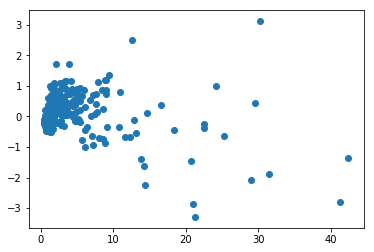

In [105]:
plt.scatter(temp_plot.iloc[:, 0], temp_plot.iloc[:, 1])

### Ridge

In [106]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [107]:
from sklearn.linear_model import Ridge

In [108]:
params = np.linspace(0.1,10,num=100)
test_scores = []
x1 = temp_plot.iloc[:, 0]
y1 = temp_plot.iloc[:, 1]
x2 = pd.concat([x1, pd.Series(np.ones(len(x1)), index=x1.index)], axis=1)
for param in tqdm(params):
    clf1 = Ridge(alpha=param)
    test_score = cross_val_score(clf1, x2, y1, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 44.31it/s]


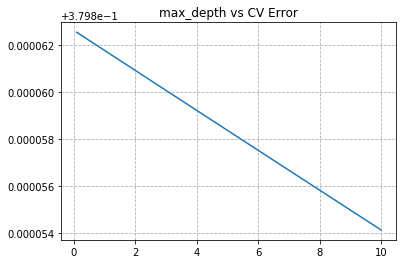

In [109]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [110]:
clf1_test = Ridge(alpha=20)
clf1_test.fit(x2, y1) 

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
final = rcd + pd.DataFrame(clf1_test.predict(pd.concat([rcd, pd.Series(np.ones(len(rcd)), index=rcd.index)], axis=1)), index=rcd.index, columns=['time'])

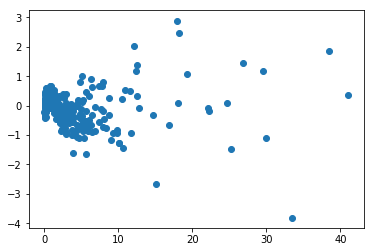

In [112]:
plt.scatter(y_train, final['time'] - y_train)

In [114]:
gp = final['time'] - y_train

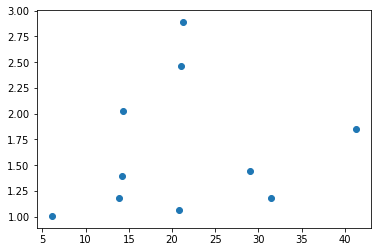

In [120]:
plt.scatter(rcd.loc[gp>1,:], gp[gp>1])

In [121]:
### x for all, then consider 15-22 X>5

In [124]:
gp2 = gp[(gp>1) & (gp<2)]
gp2

47     1.181889
72     1.395374
224    1.183069
257    1.000364
336    1.845864
381    1.067405
438    1.439047
Name: time, dtype: float64

In [125]:
x_gp2 = pd.concat([rcd.loc[gp2.index], pd.Series(np.ones(len(gp2)), index=gp2.index)], axis=1)
clf_gp2 = Ridge(alpha=0)
clf_gp2.fit(x_gp2, gp2)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
data =X_test
rcd = pd.DataFrame(np.zeros(len(data)), columns=['time'], index=data.index)
for i in range(N):
    rcd += pd.DataFrame(md[i].predict(data), columns=['time'])
rcd = rcd/N
idx5 = rcd[rcd>5].dropna().index
final = rcd + pd.DataFrame(clf1_test.predict(pd.concat([rcd, pd.Series(np.ones(len(rcd)), index=rcd.index)], axis=1)), 
                           index=rcd.index, columns=['time']) 

final.loc[idx5,:] += pd.DataFrame(clf_gp2.predict(pd.concat([rcd.loc[idx5,:], pd.Series(np.ones(len(idx5)), index=idx5)], axis=1)), 
                         index=idx5, columns=['time'])

In [97]:
data =X_test
rcd = pd.DataFrame(np.zeros(len(data)), columns=['time'], index=data.index)
for i in range(N):
    rcd += pd.DataFrame(md[i].predict(data), columns=['time'])
rcd = rcd/N
final = rcd + pd.DataFrame(clf1_test.predict(pd.concat([rcd, pd.Series(np.ones(len(rcd)), index=rcd.index)], axis=1)), 
                           index=rcd.index, columns=['time'])

In [158]:
final[final<0] = 0.2

In [159]:
final.to_csv('test_sep.csv')